In this notebook I perform the feature selection with **Lasso**. I do Lasso on the original data for a set of hyperparameters, extract the non zero values and pass them to the main training script.

In [2]:
import placetmachine as pl
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import os
import random
import pandas as pd

from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, OrthogonalMatchingPursuit, LassoLars, Lars

from functools import reduce

from sklearn.decomposition import PCA


In this approach I will be building a set of feature to use based on the result of the Lasso evaluation. But this approach foresees different sets for each knob.

In [3]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    for i, filename in enumerate(os.listdir(folder)):
        with open(os.path.join(folder, filename), 'rb') as file:
            row_data = pk.load(file)

            data.append(row_data)
    if not supress_output:
        print(f"Found {i + 1} files.")
    
    res = pd.DataFrame(data)
    return res

In [21]:
FOLDER = "data/learning_storage/forward_backward/Y1_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
34  regularizer_mod_5_4  5.000000e-07           1   
28  regularizer_mod_5_4  5.000000e-07           1   
1   regularizer_mod_5_4  5.000000e-07           3   
26  regularizer_mod_5_4  5.000000e-07           3   
27  regularizer_mod_5_4  5.000000e-07           3   
30  regularizer_mod_5_4  5.000000e-07           4   
14  regularizer_mod_5_4  5.000000e-07           6   
11  regularizer_mod_5_4  5.000000e-07           6   
6   regularizer_mod_5_4  5.000000e-07           8   
44  regularizer_mod_5_4  5.000000e-07           9   
3   regularizer_mod_5_4  5.000000e-07          10   
20  regularizer_mod_5_4  5.000000e-07          10   
8   regularizer_mod_5_4  5.000000e-07          11   
43  regularizer_mod_5_4  5.000000e-07          11   
17  regularizer_mod_5_4  5.000000e-07          11   
18  regularizer_mod_5_4  5.000000e-07          12   
9   regularizer_mod_5_4  5.000000e-07          13   
41  regularizer_mod_5_4  5.000

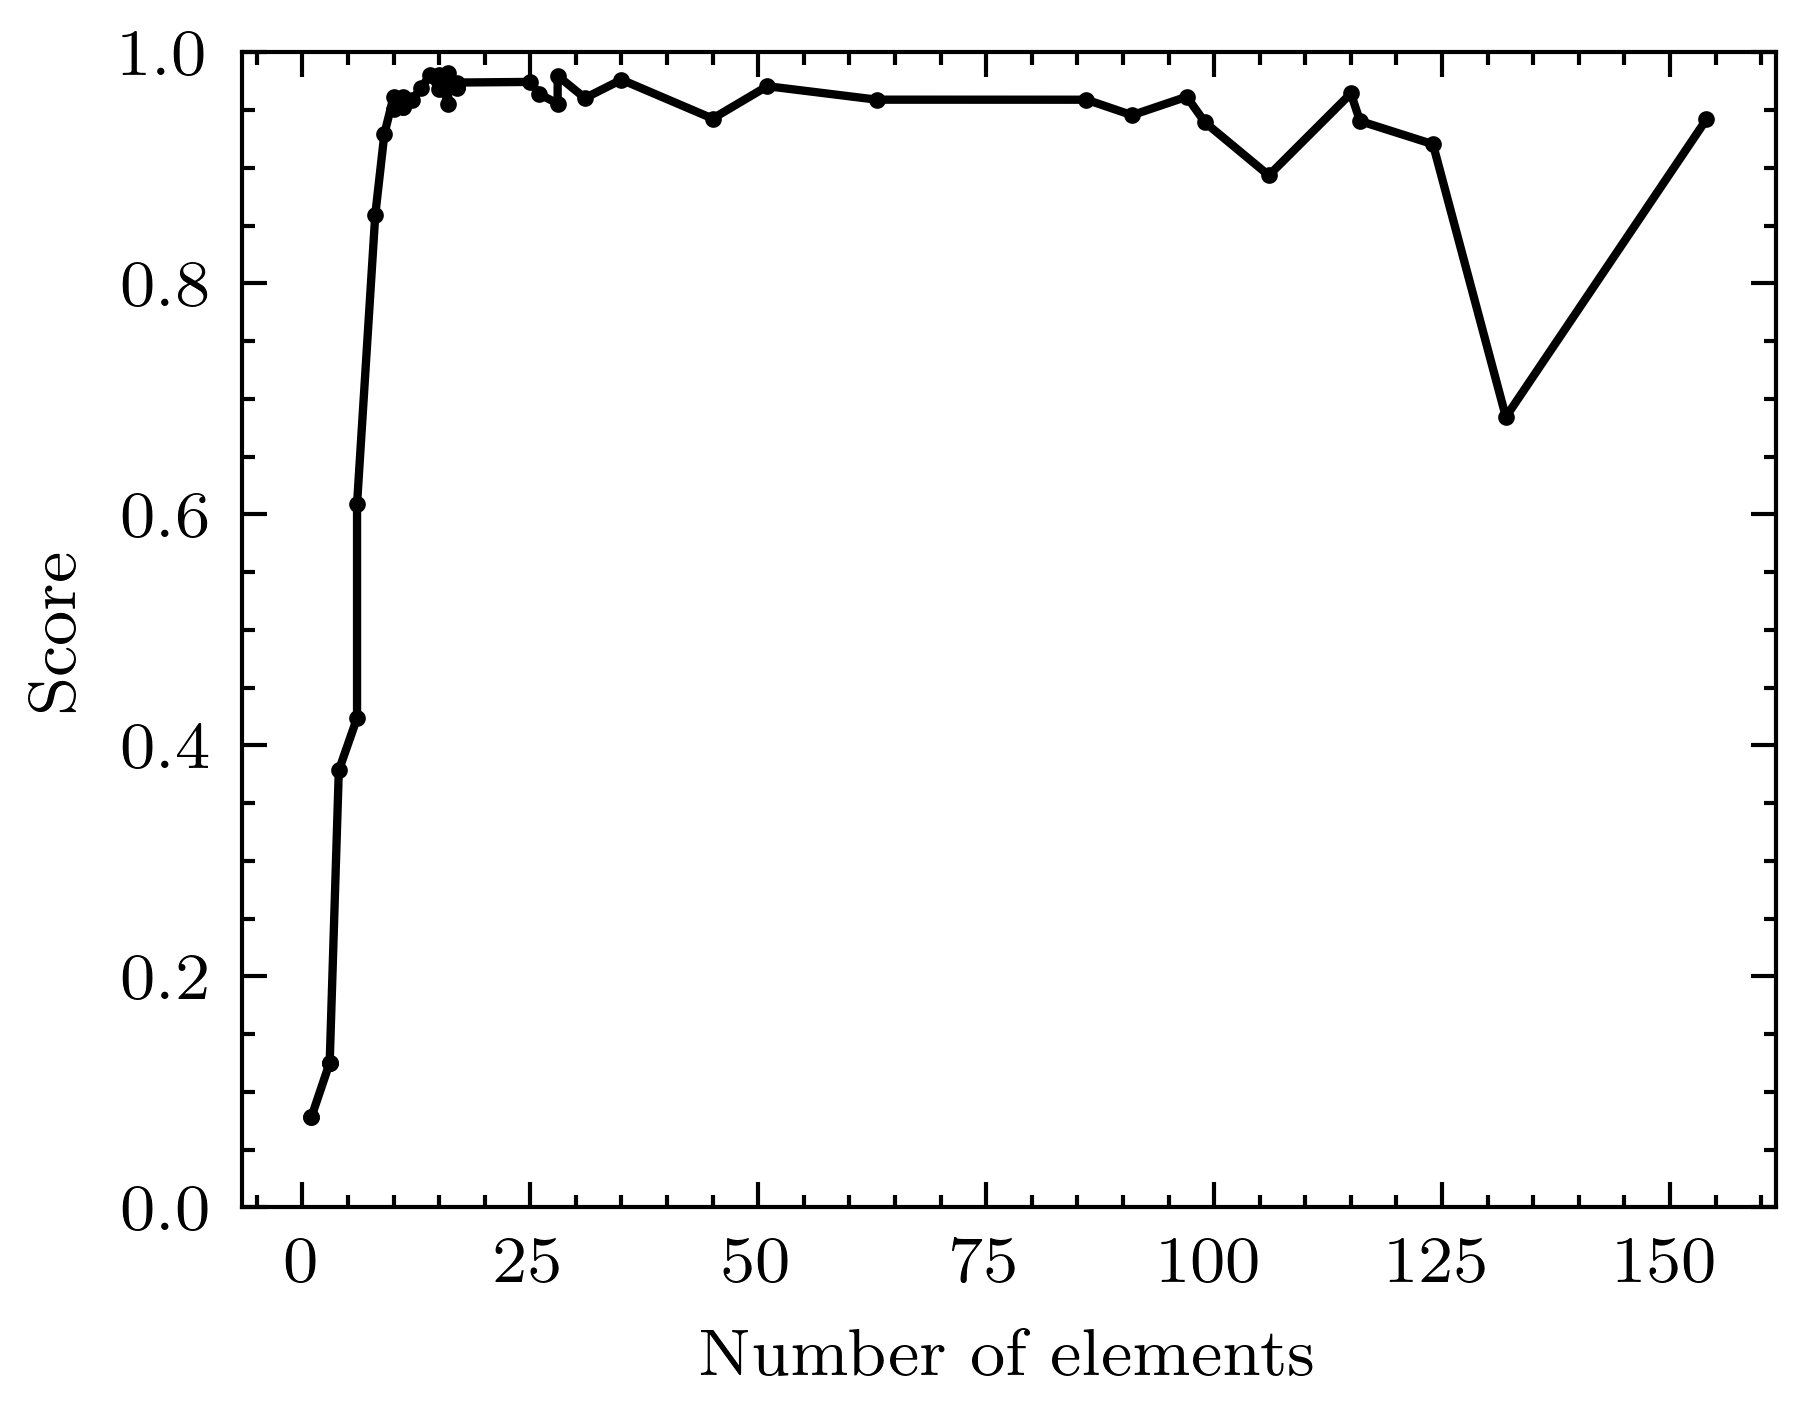

In [22]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

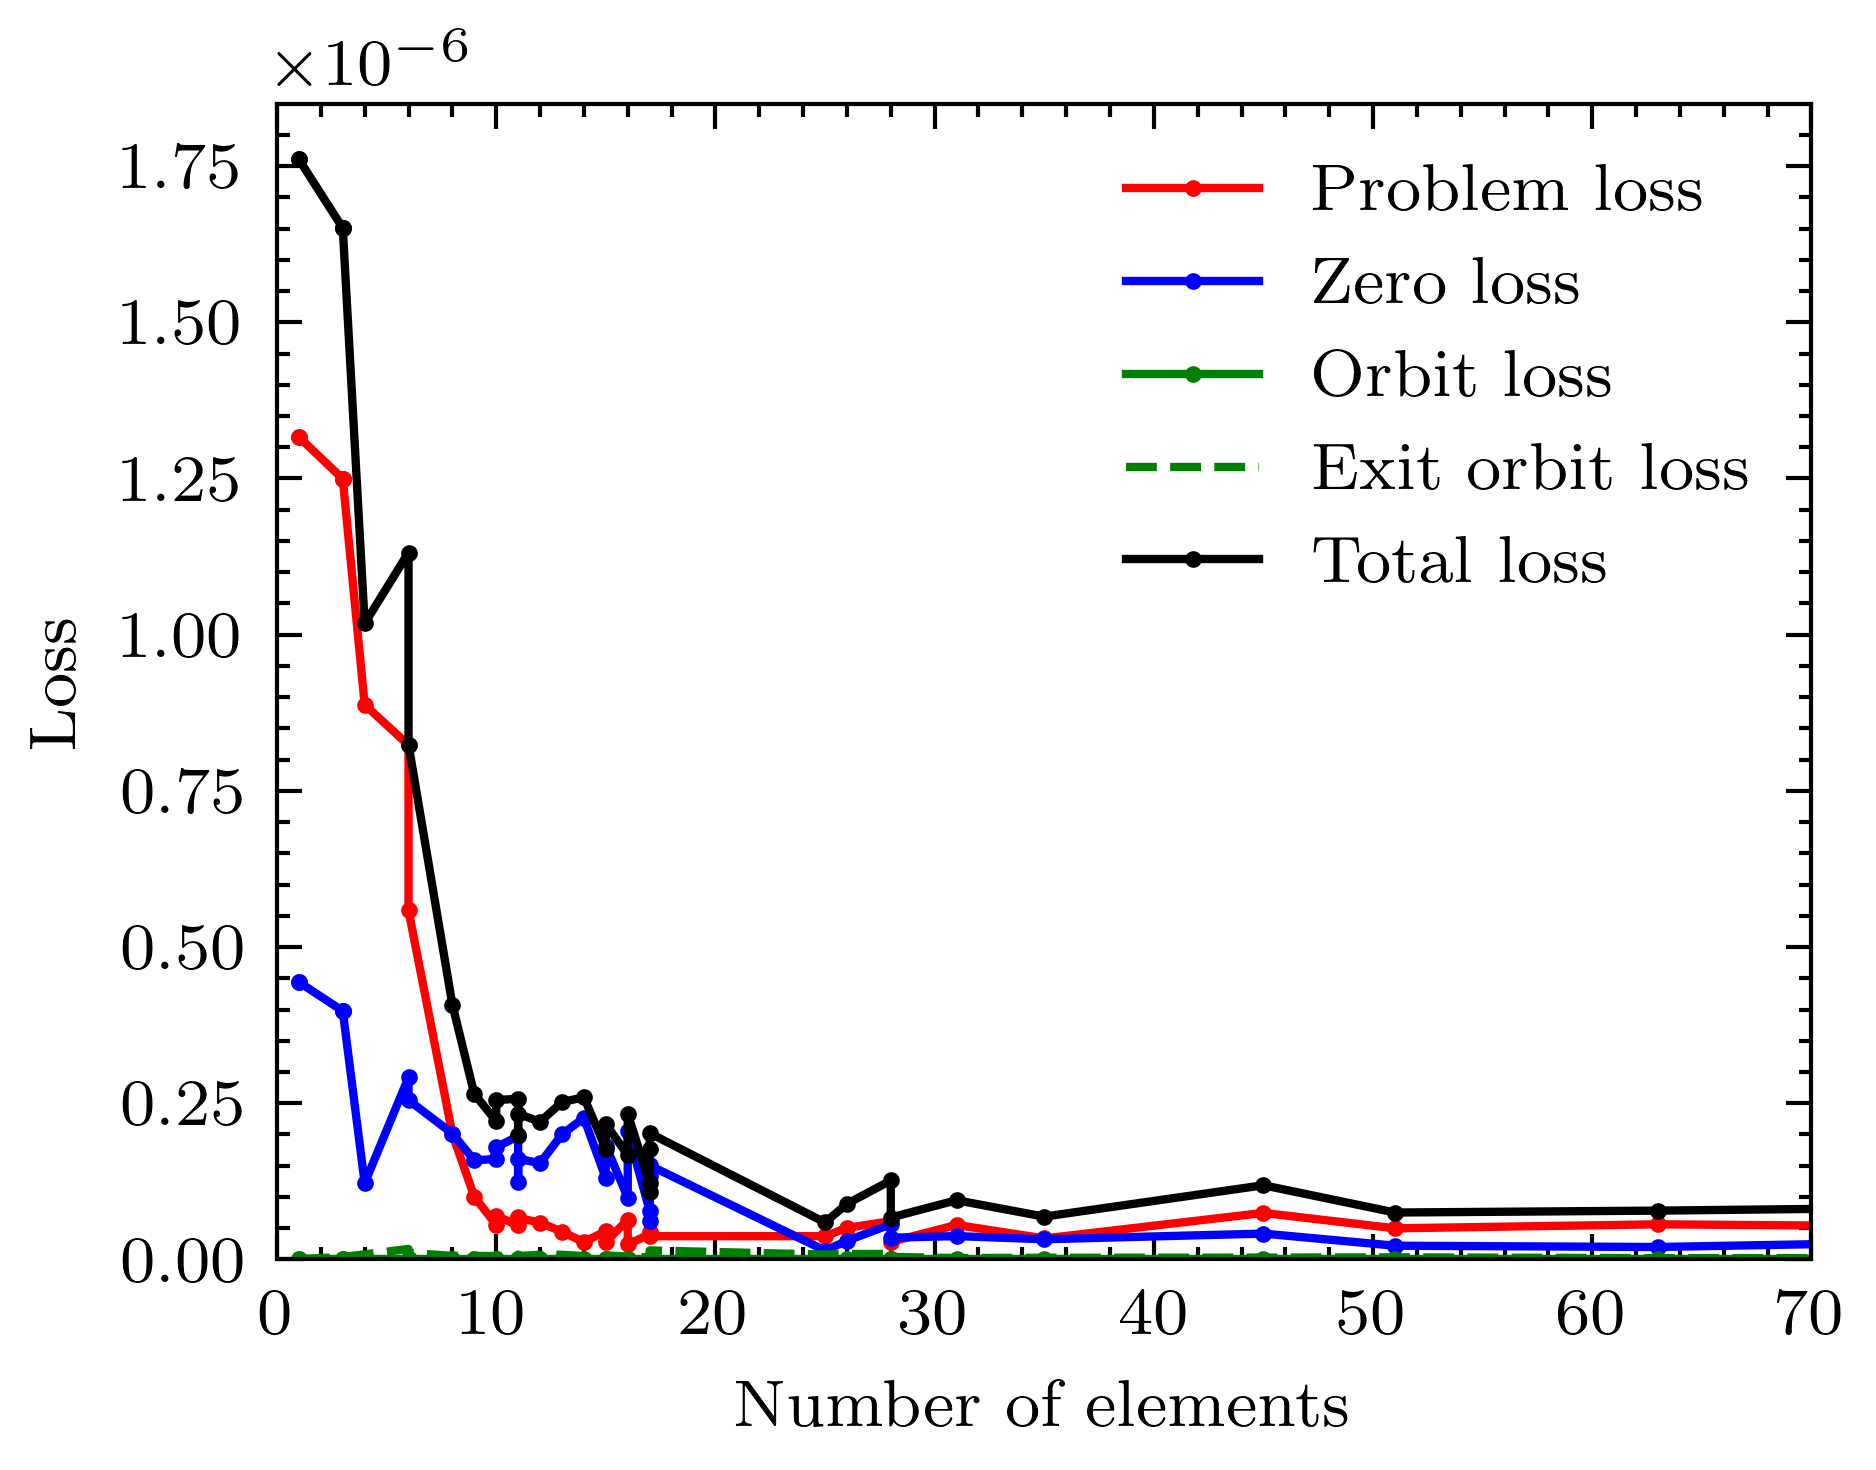

In [24]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y2**

In [35]:
FOLDER = "data/learning_storage/forward_backward/Y2_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
5   regularizer_mod_5_4  5.000000e-07           2   
21  regularizer_mod_5_4  5.000000e-07           3   
19  regularizer_mod_5_4  5.000000e-07           3   
38  regularizer_mod_5_4  5.000000e-07           3   
24  regularizer_mod_5_4  5.000000e-07           4   
37  regularizer_mod_5_4  5.000000e-07           4   
31  regularizer_mod_5_4  5.000000e-07           5   
1   regularizer_mod_5_4  5.000000e-07           6   
15  regularizer_mod_5_4  5.000000e-07           8   
28  regularizer_mod_5_4  5.000000e-07           9   
34  regularizer_mod_5_4  5.000000e-07           9   
26  regularizer_mod_5_4  5.000000e-07          10   
25  regularizer_mod_5_4  5.000000e-07          11   
14  regularizer_mod_5_4  5.000000e-07          11   
7   regularizer_mod_5_4  5.000000e-07          11   
41  regularizer_mod_5_4  5.000000e-07          11   
32  regularizer_mod_5_4  5.000000e-07          12   
20  regularizer_mod_5_4  5.000

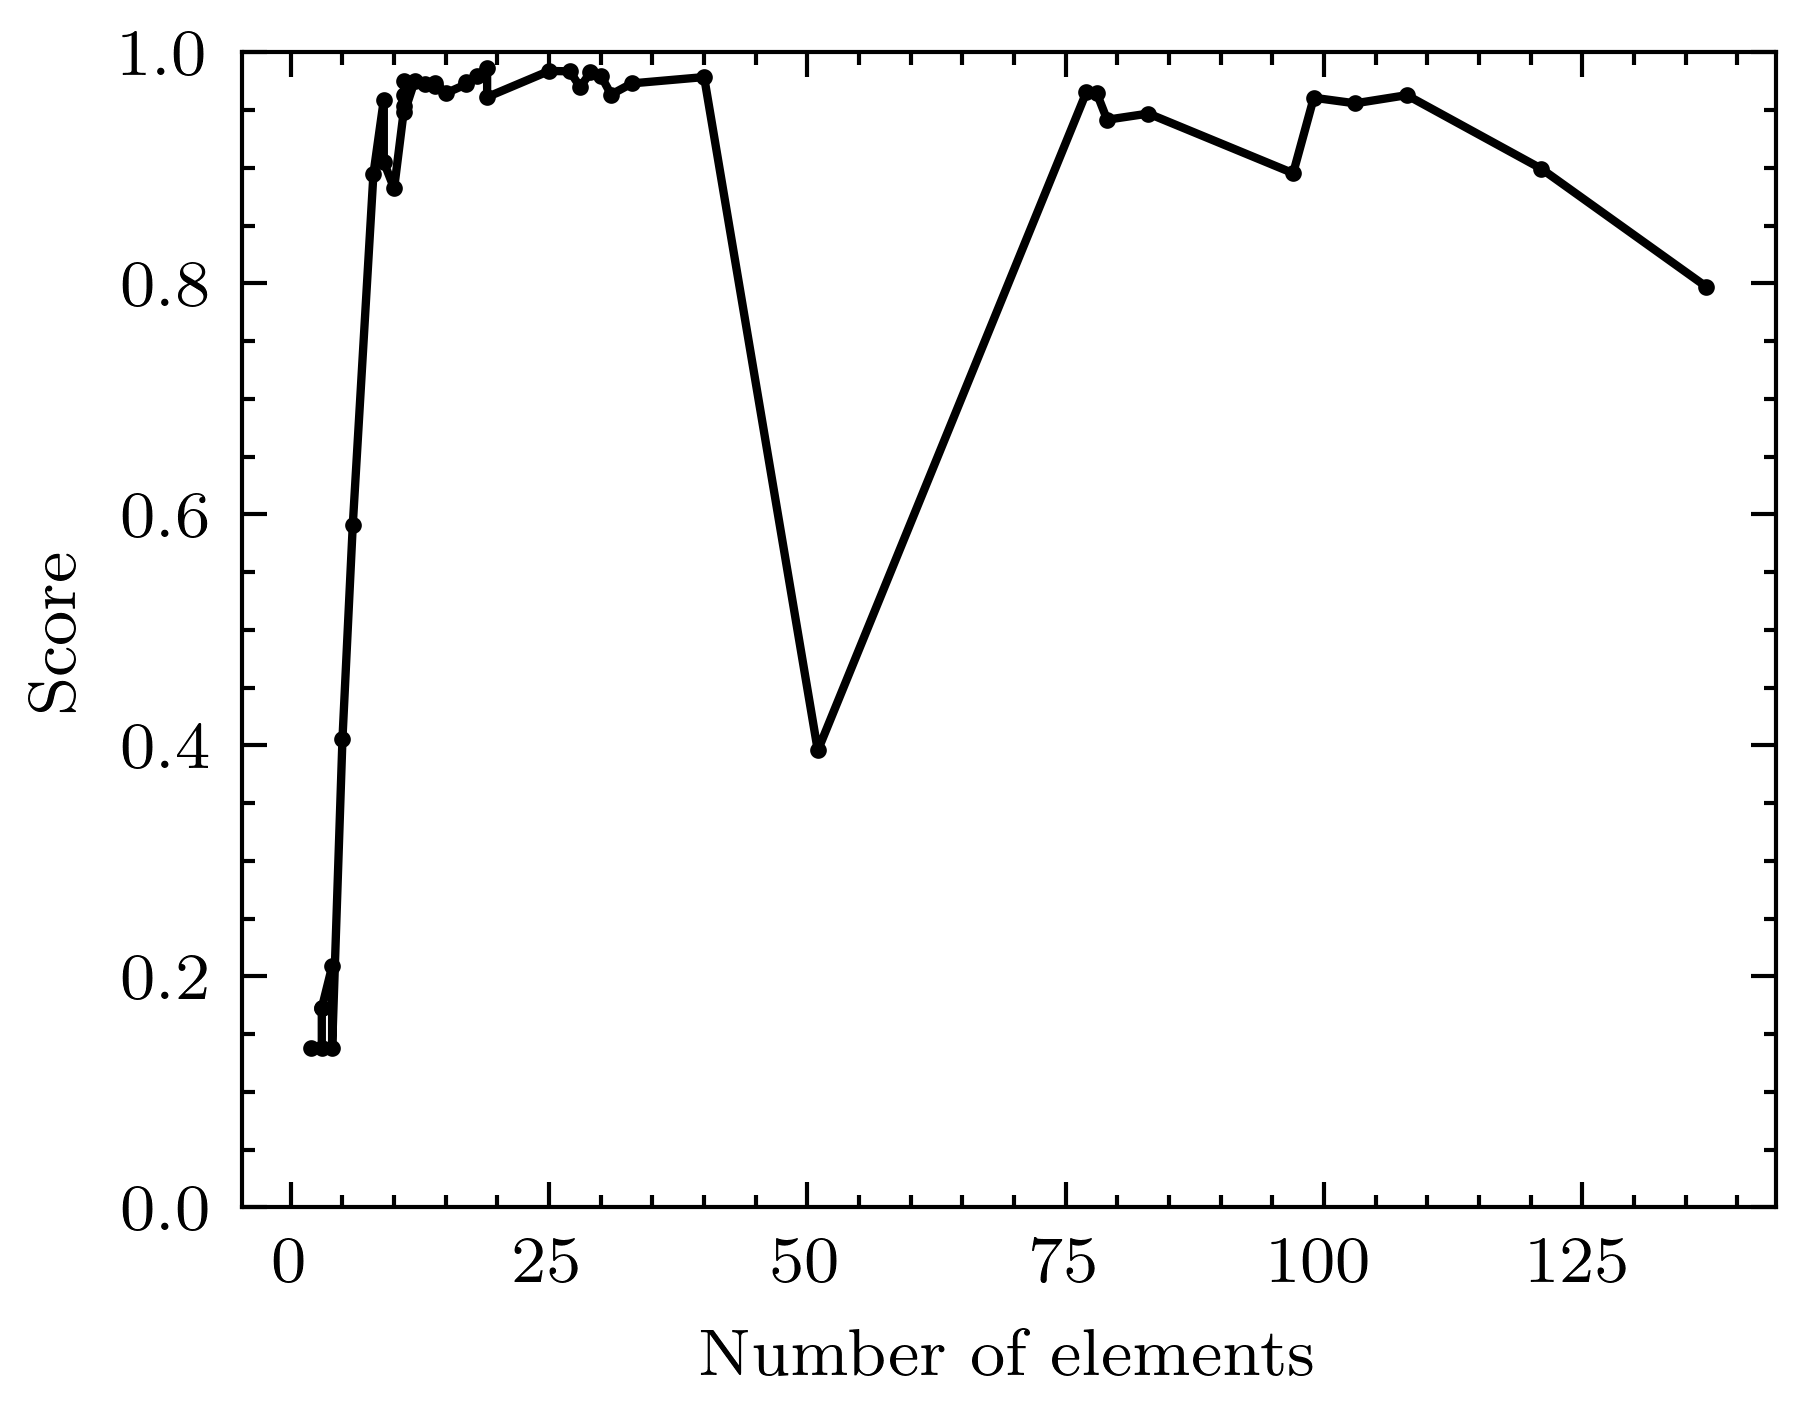

In [36]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

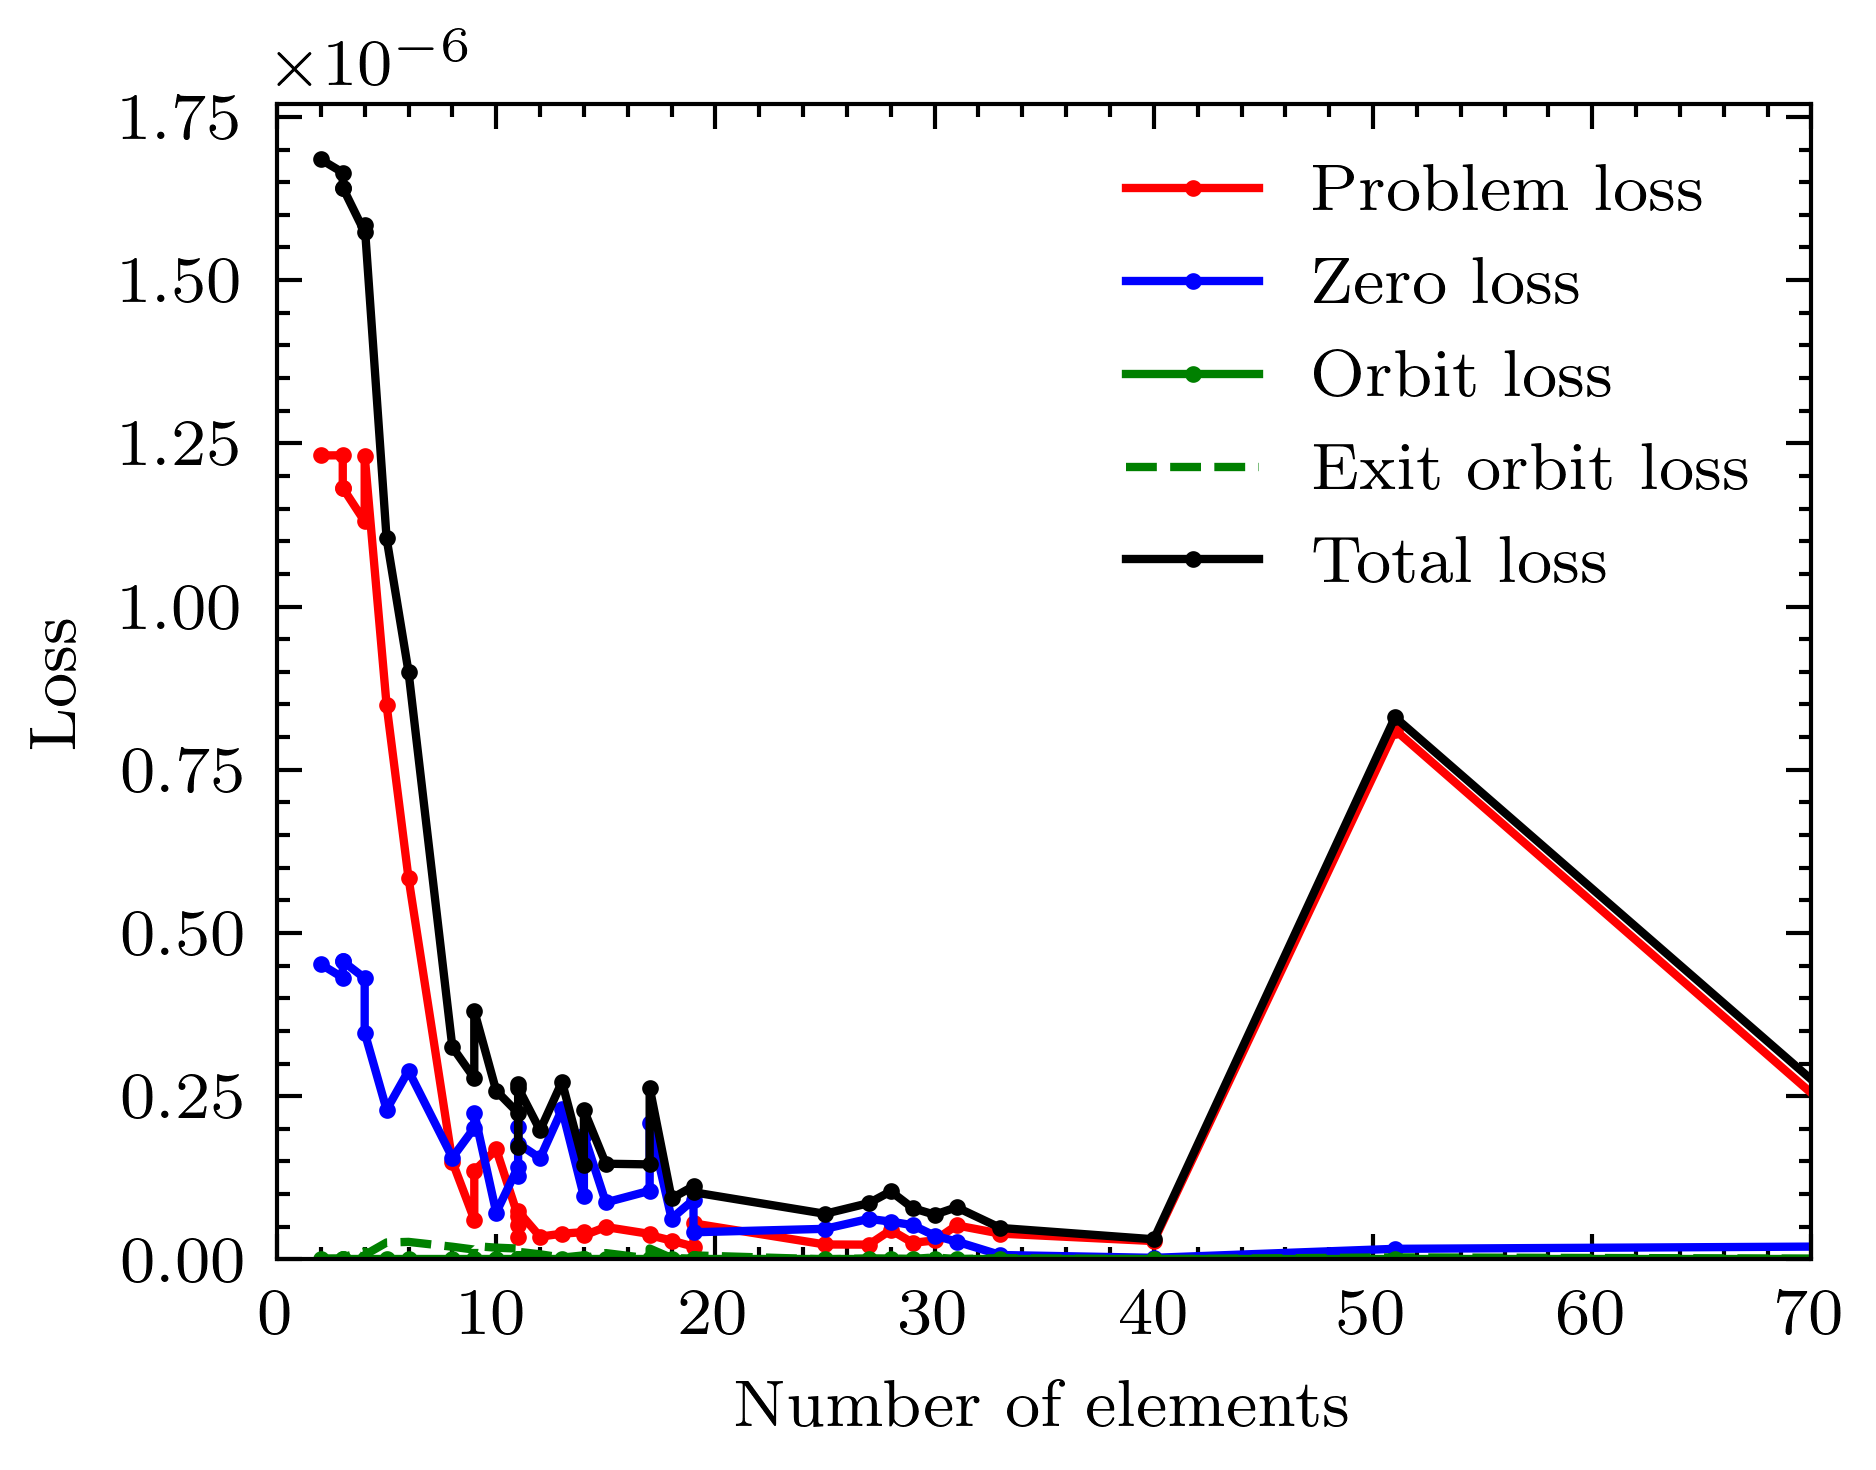

In [37]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y3**

In [47]:
FOLDER = "data/learning_storage/forward_backward/Y3_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
22  regularizer_mod_5_4  5.000000e-07           2   
28  regularizer_mod_5_4  5.000000e-07           3   
27  regularizer_mod_5_4  5.000000e-07           3   
18  regularizer_mod_5_4  5.000000e-07           3   
9   regularizer_mod_5_4  5.000000e-07           3   
34  regularizer_mod_5_4  5.000000e-07           4   
44  regularizer_mod_5_4  5.000000e-07           4   
31  regularizer_mod_5_4  5.000000e-07           5   
30  regularizer_mod_5_4  5.000000e-07           6   
25  regularizer_mod_5_4  5.000000e-07           7   
42  regularizer_mod_5_4  5.000000e-07           7   
39  regularizer_mod_5_4  5.000000e-07           7   
6   regularizer_mod_5_4  5.000000e-07           8   
23  regularizer_mod_5_4  5.000000e-07           8   
13  regularizer_mod_5_4  5.000000e-07          10   
29  regularizer_mod_5_4  5.000000e-07          10   
8   regularizer_mod_5_4  5.000000e-07          12   
41  regularizer_mod_5_4  5.000

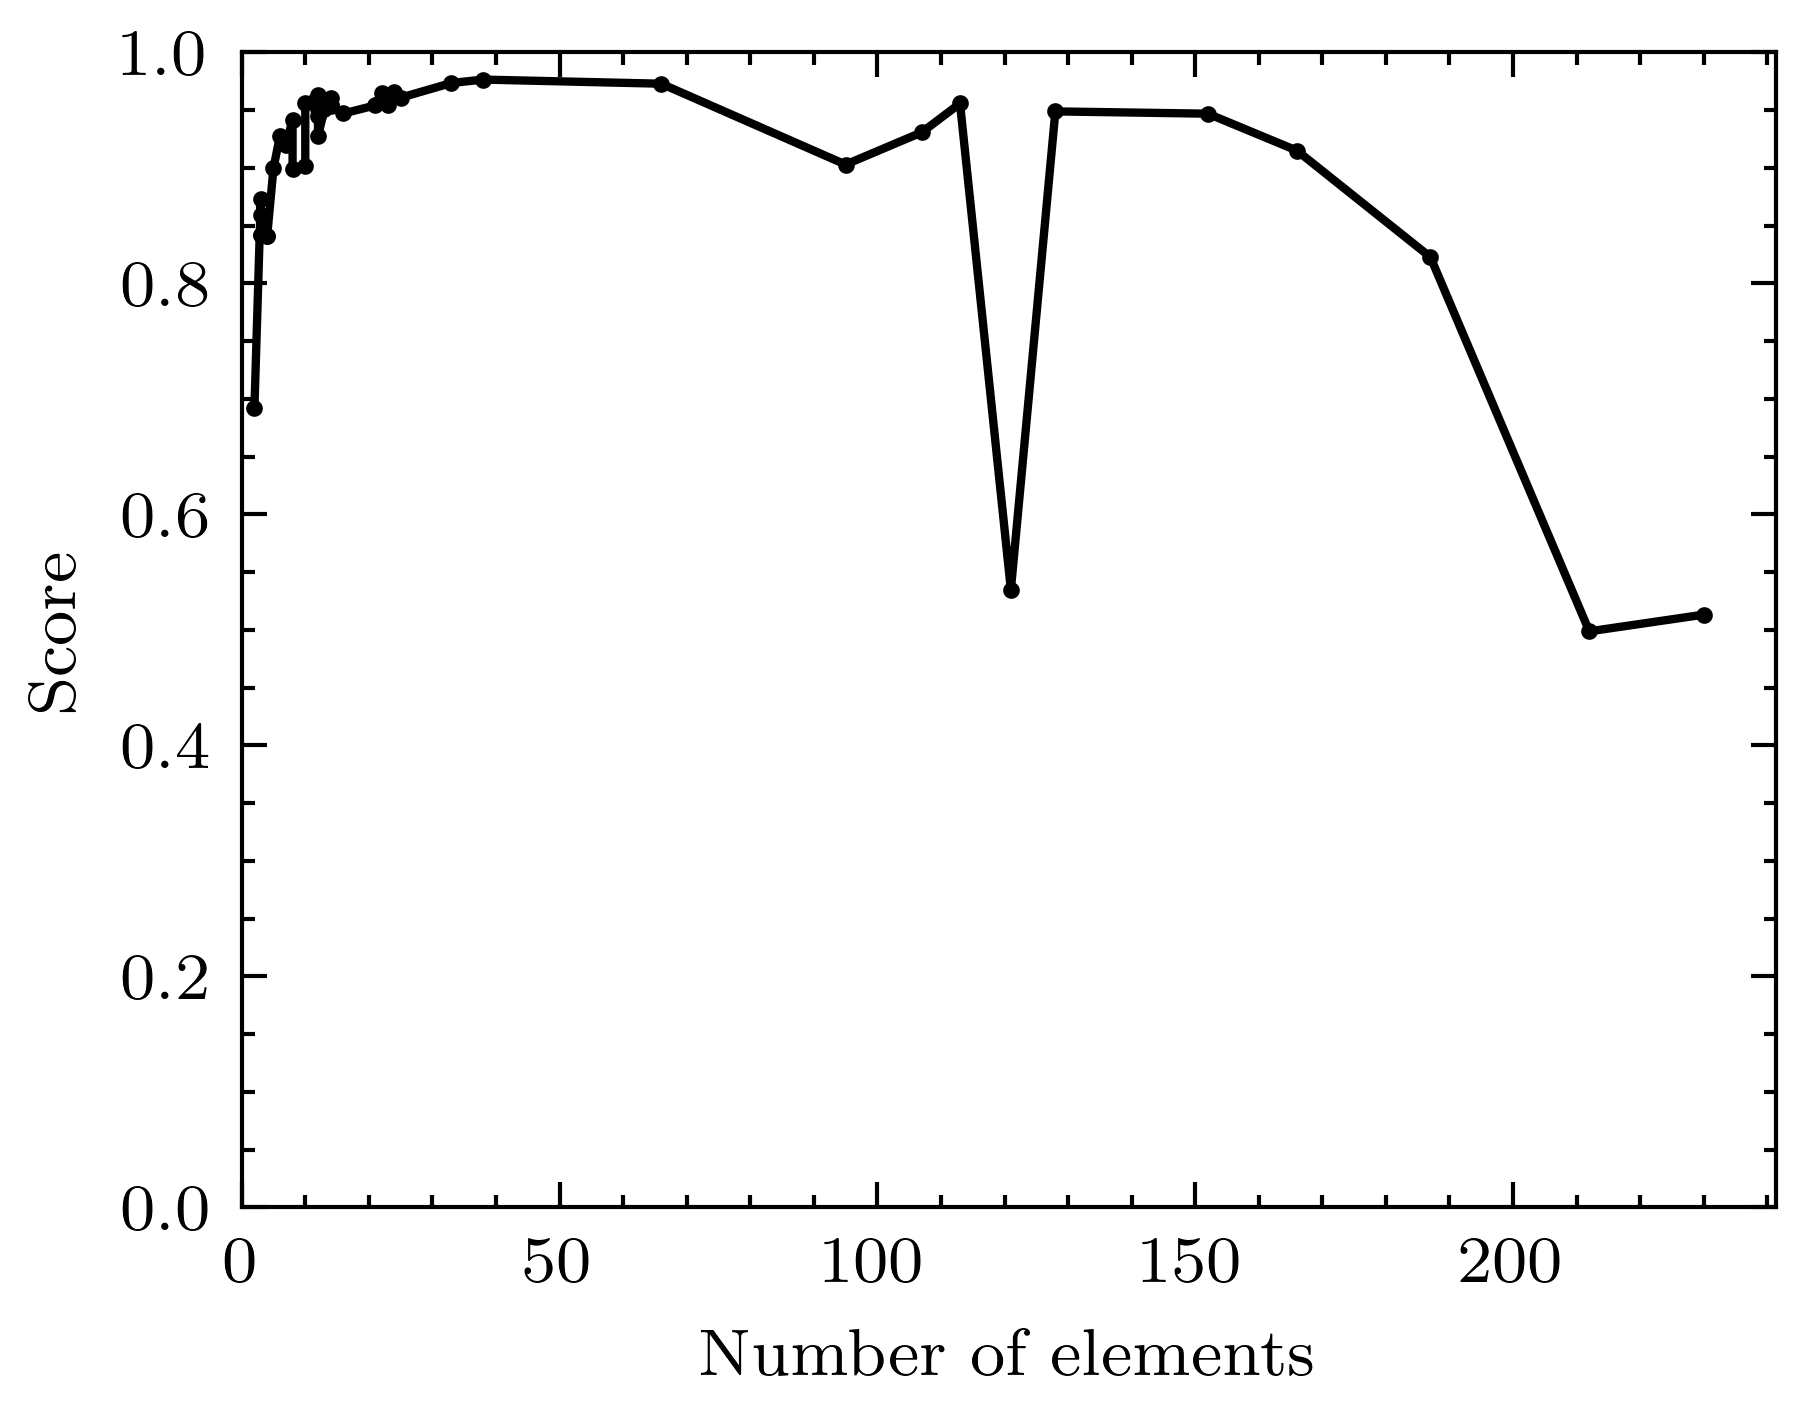

In [49]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, )
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

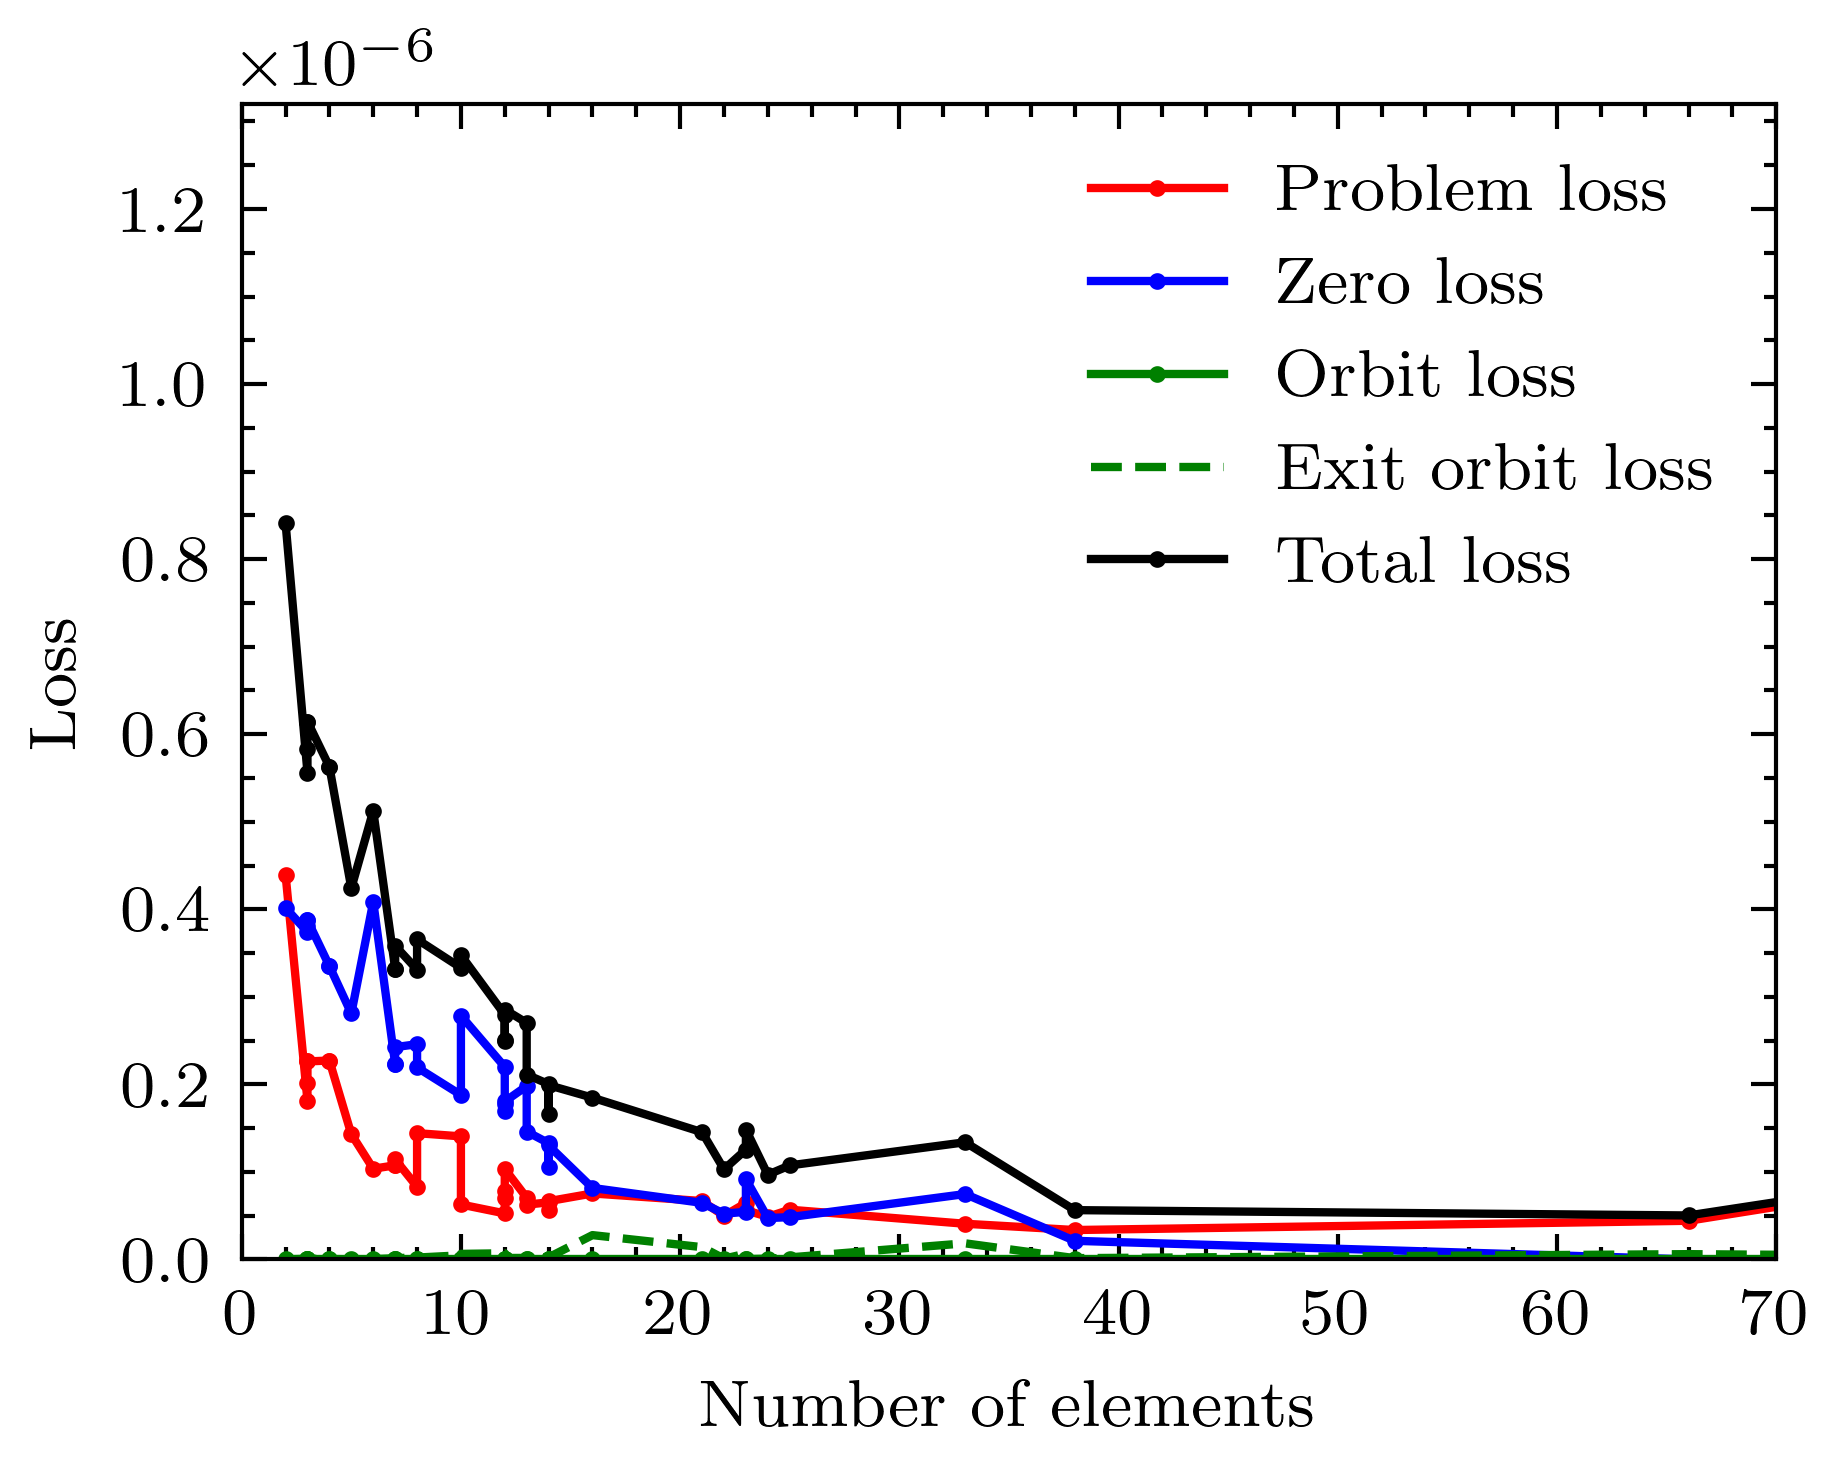

In [50]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y4**

In [74]:
FOLDER = "data/learning_storage/forward_backward/Y4_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
35  regularizer_mod_5_4  5.000000e-07           2   
32  regularizer_mod_5_4  5.000000e-07           2   
6   regularizer_mod_5_4  5.000000e-07           3   
28  regularizer_mod_5_4  5.000000e-07           3   
14  regularizer_mod_5_4  5.000000e-07           3   
13  regularizer_mod_5_4  5.000000e-07           4   
5   regularizer_mod_5_4  5.000000e-07           5   
27  regularizer_mod_5_4  5.000000e-07           6   
37  regularizer_mod_5_4  5.000000e-07           6   
42  regularizer_mod_5_4  5.000000e-07           7   
19  regularizer_mod_5_4  5.000000e-07           7   
8   regularizer_mod_5_4  5.000000e-07           7   
30  regularizer_mod_5_4  5.000000e-07           7   
17  regularizer_mod_5_4  5.000000e-07           7   
43  regularizer_mod_5_4  5.000000e-07           8   
24  regularizer_mod_5_4  5.000000e-07           9   
11  regularizer_mod_5_4  5.000000e-07          10   
16  regularizer_mod_5_4  5.000

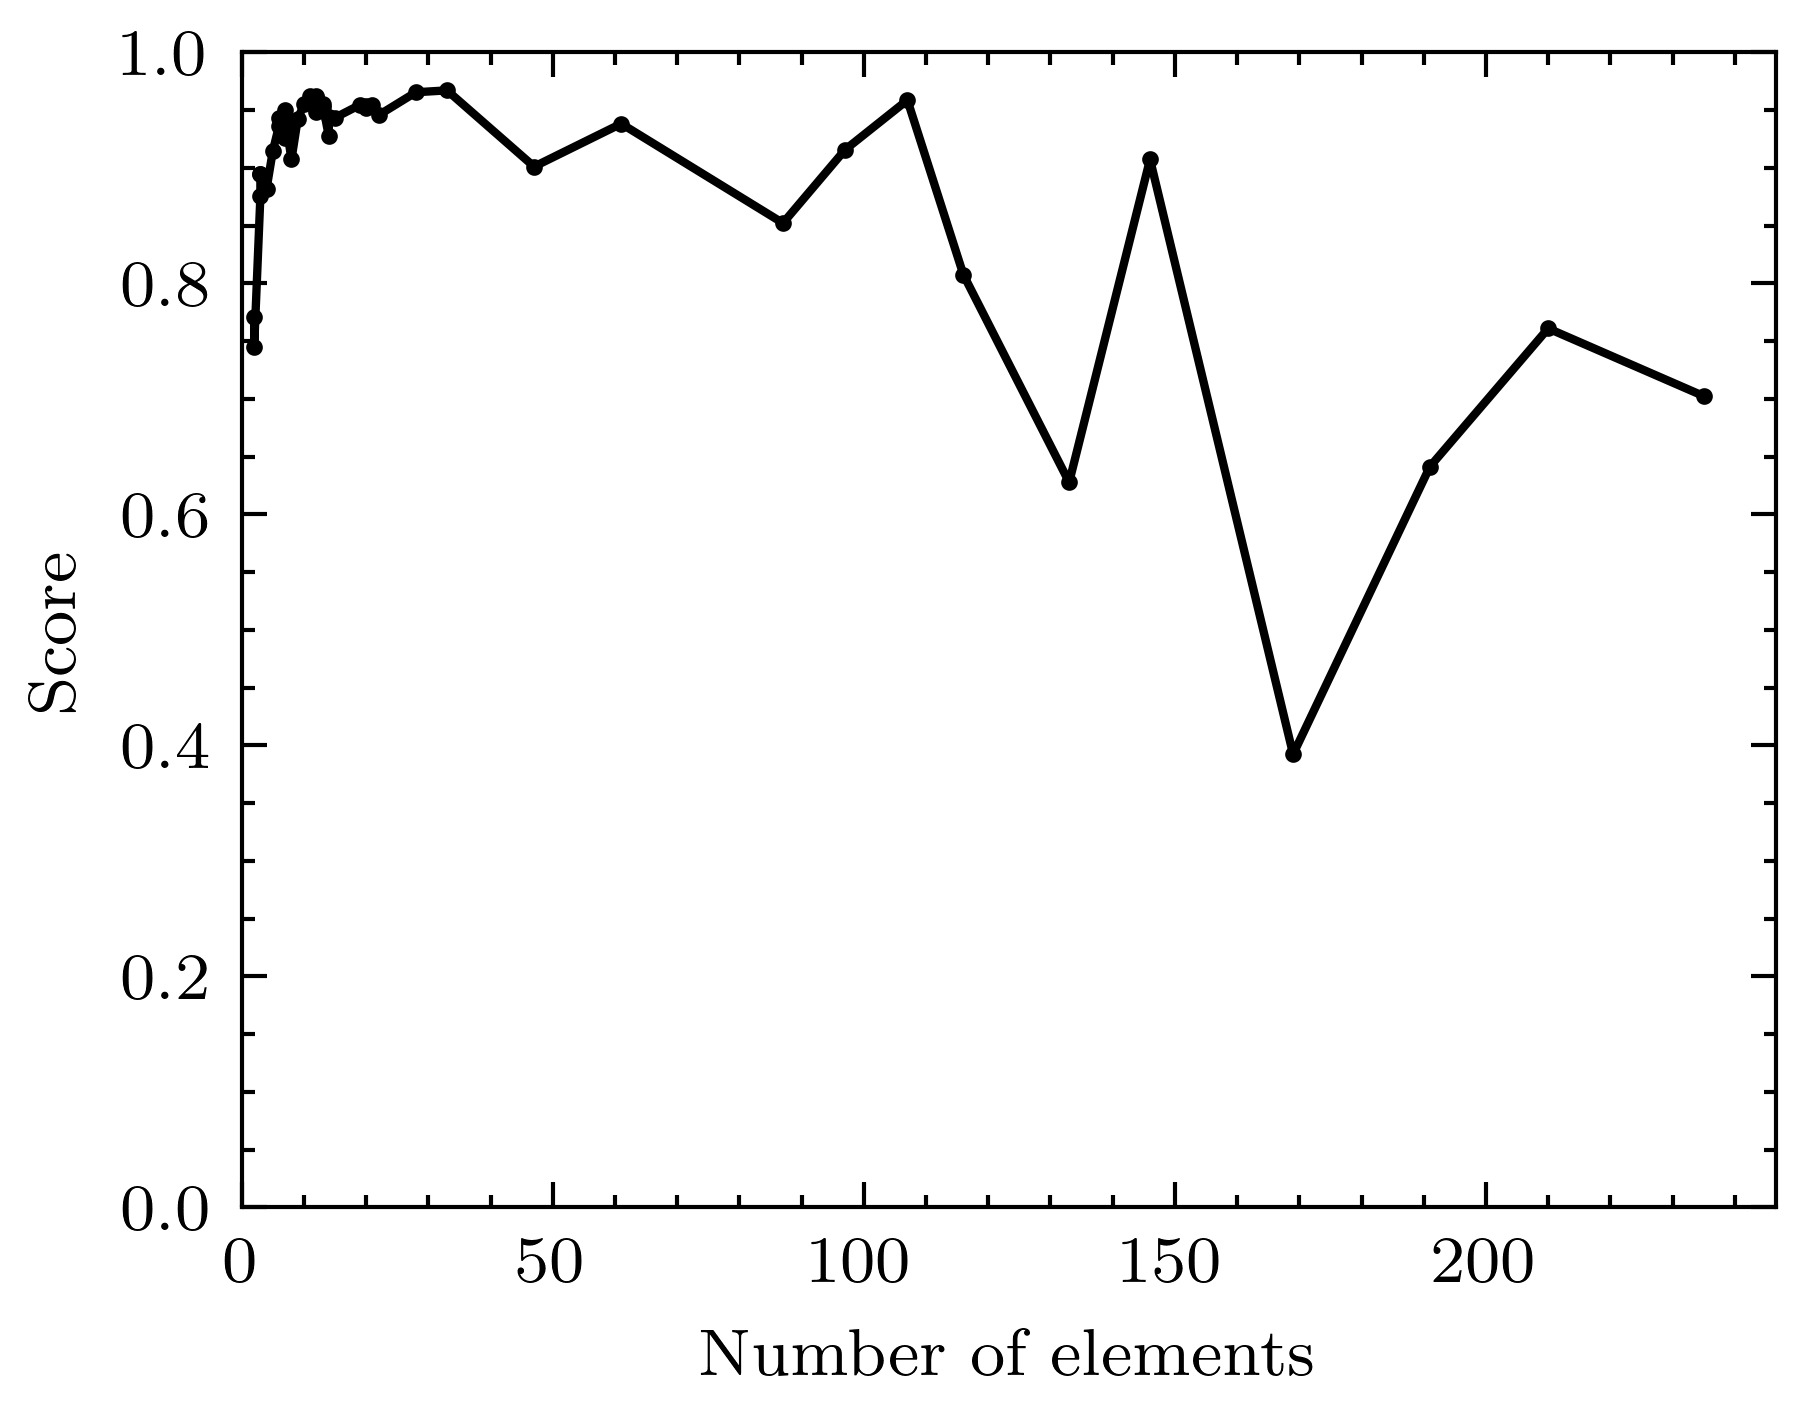

In [65]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, )
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

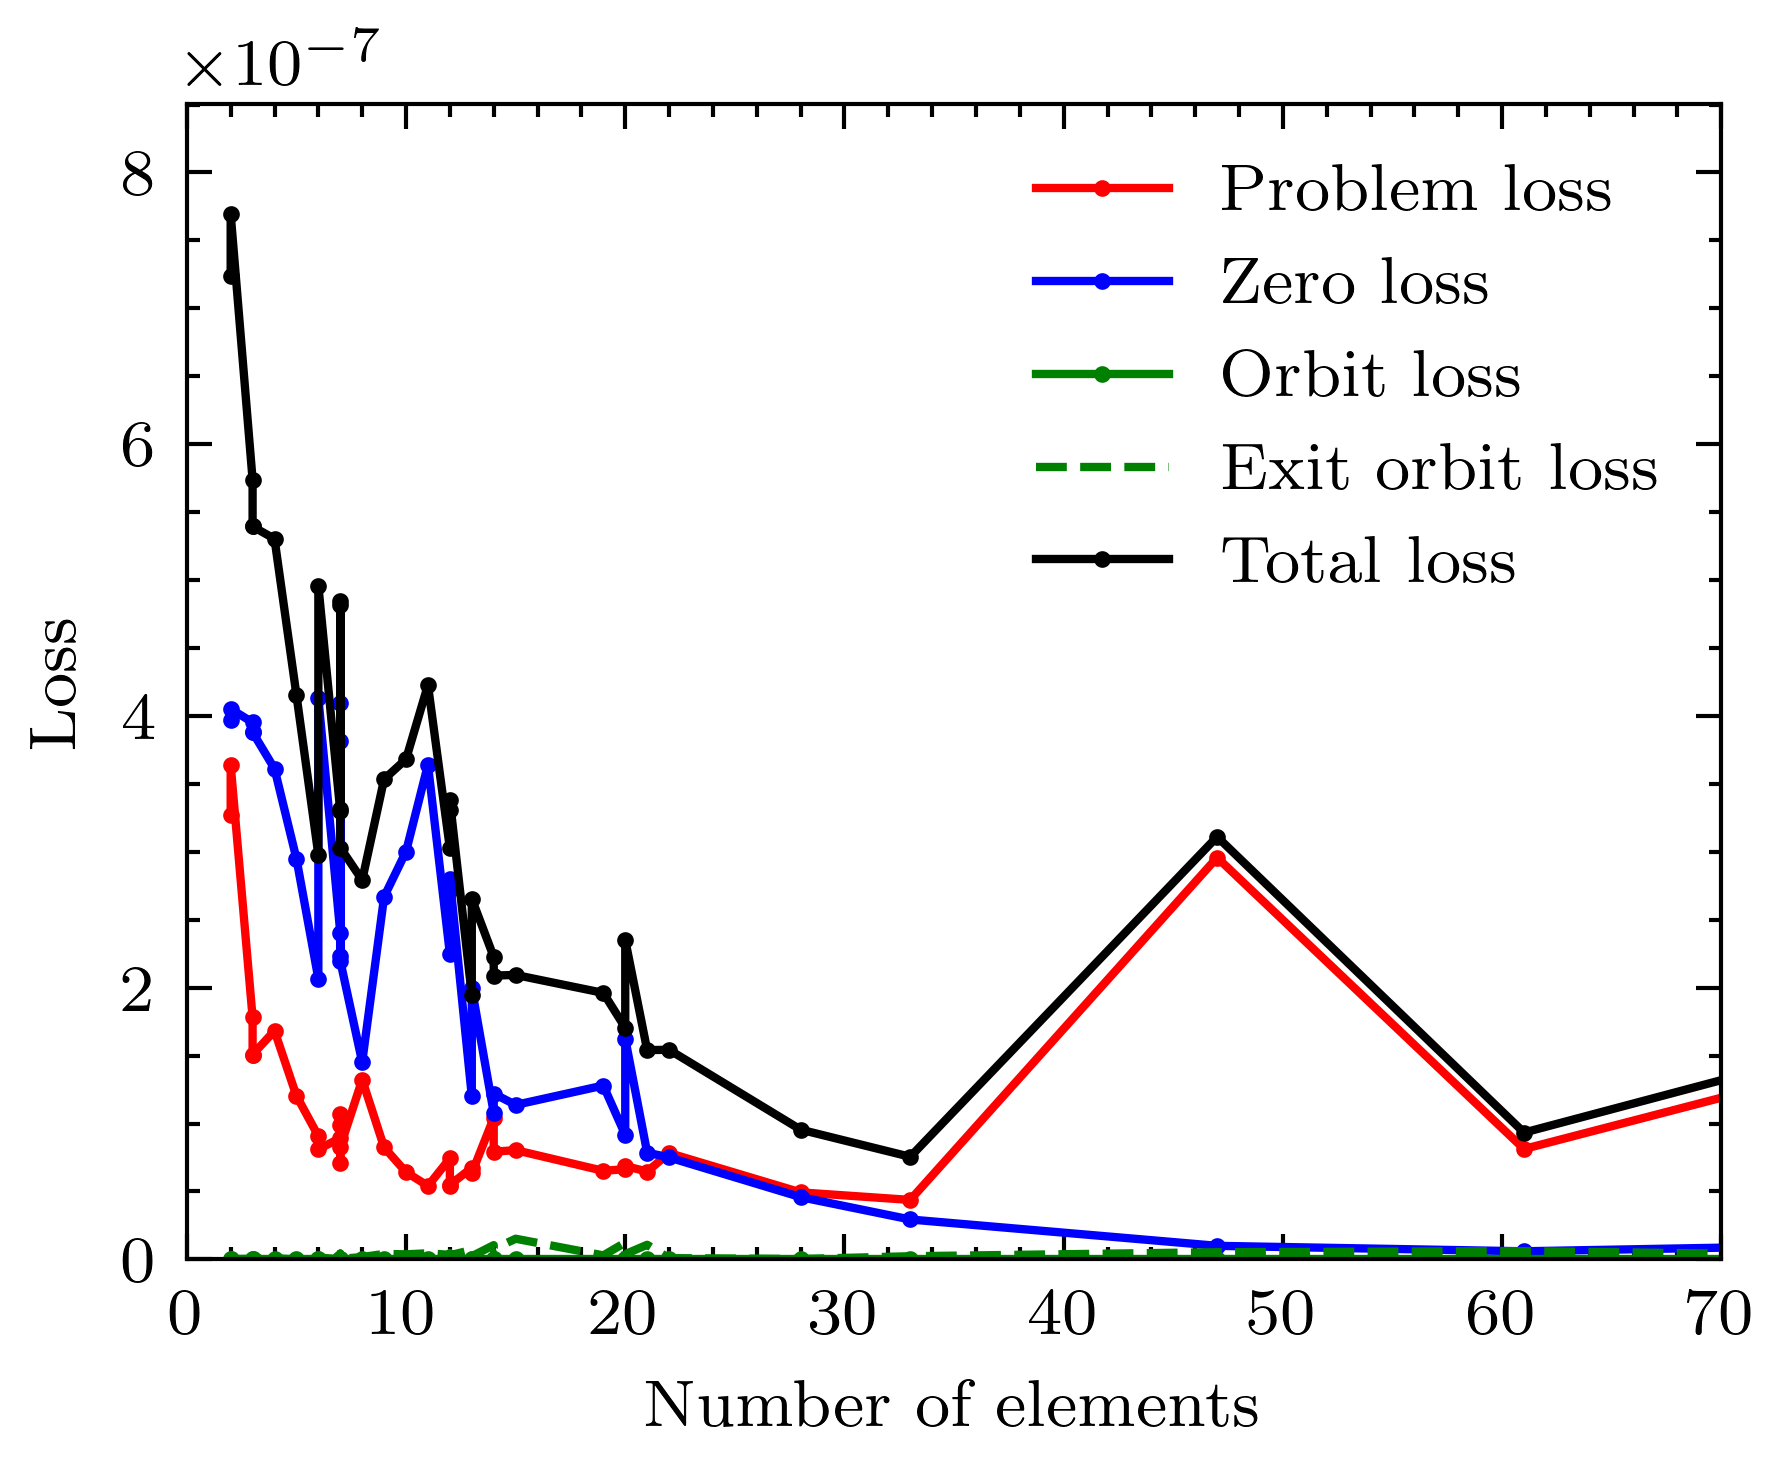

In [75]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

There is a general trend that the most dominant penalty in the solution is `zero loss`. In the solutions we see that they are consistent and provide a very good score, although the for the smaller number of elements (larger `alpha` in **Lasso**) solution no longer meets the satisfactory level of the `zero loss`. And there is obvious trend that it increases the smaller the number of elements included is.

I believe **Lasso** captures the relations between elements much better than pure **SFS**. So with **Lasso** the total loss is smaller than with SFS.

Maybe, we also check **OMP** and see how it performs with current training model.

In [83]:
FOLDER = "data/learning_storage/forward_backward/Y5_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
44  regularizer_mod_5_4  5.000000e-07           4   
38  regularizer_mod_5_4  5.000000e-07           4   
35  regularizer_mod_5_4  5.000000e-07           4   
30  regularizer_mod_5_4  5.000000e-07           4   
37  regularizer_mod_5_4  5.000000e-07           5   
6   regularizer_mod_5_4  5.000000e-07           5   
21  regularizer_mod_5_4  5.000000e-07           6   
3   regularizer_mod_5_4  5.000000e-07           8   
36  regularizer_mod_5_4  5.000000e-07           8   
8   regularizer_mod_5_4  5.000000e-07           8   
4   regularizer_mod_5_4  5.000000e-07           9   
7   regularizer_mod_5_4  5.000000e-07           9   
24  regularizer_mod_5_4  5.000000e-07           9   
43  regularizer_mod_5_4  5.000000e-07           9   
31  regularizer_mod_5_4  5.000000e-07          11   
0   regularizer_mod_5_4  5.000000e-07          11   
19  regularizer_mod_5_4  5.000000e-07          12   
15  regularizer_mod_5_4  5.000

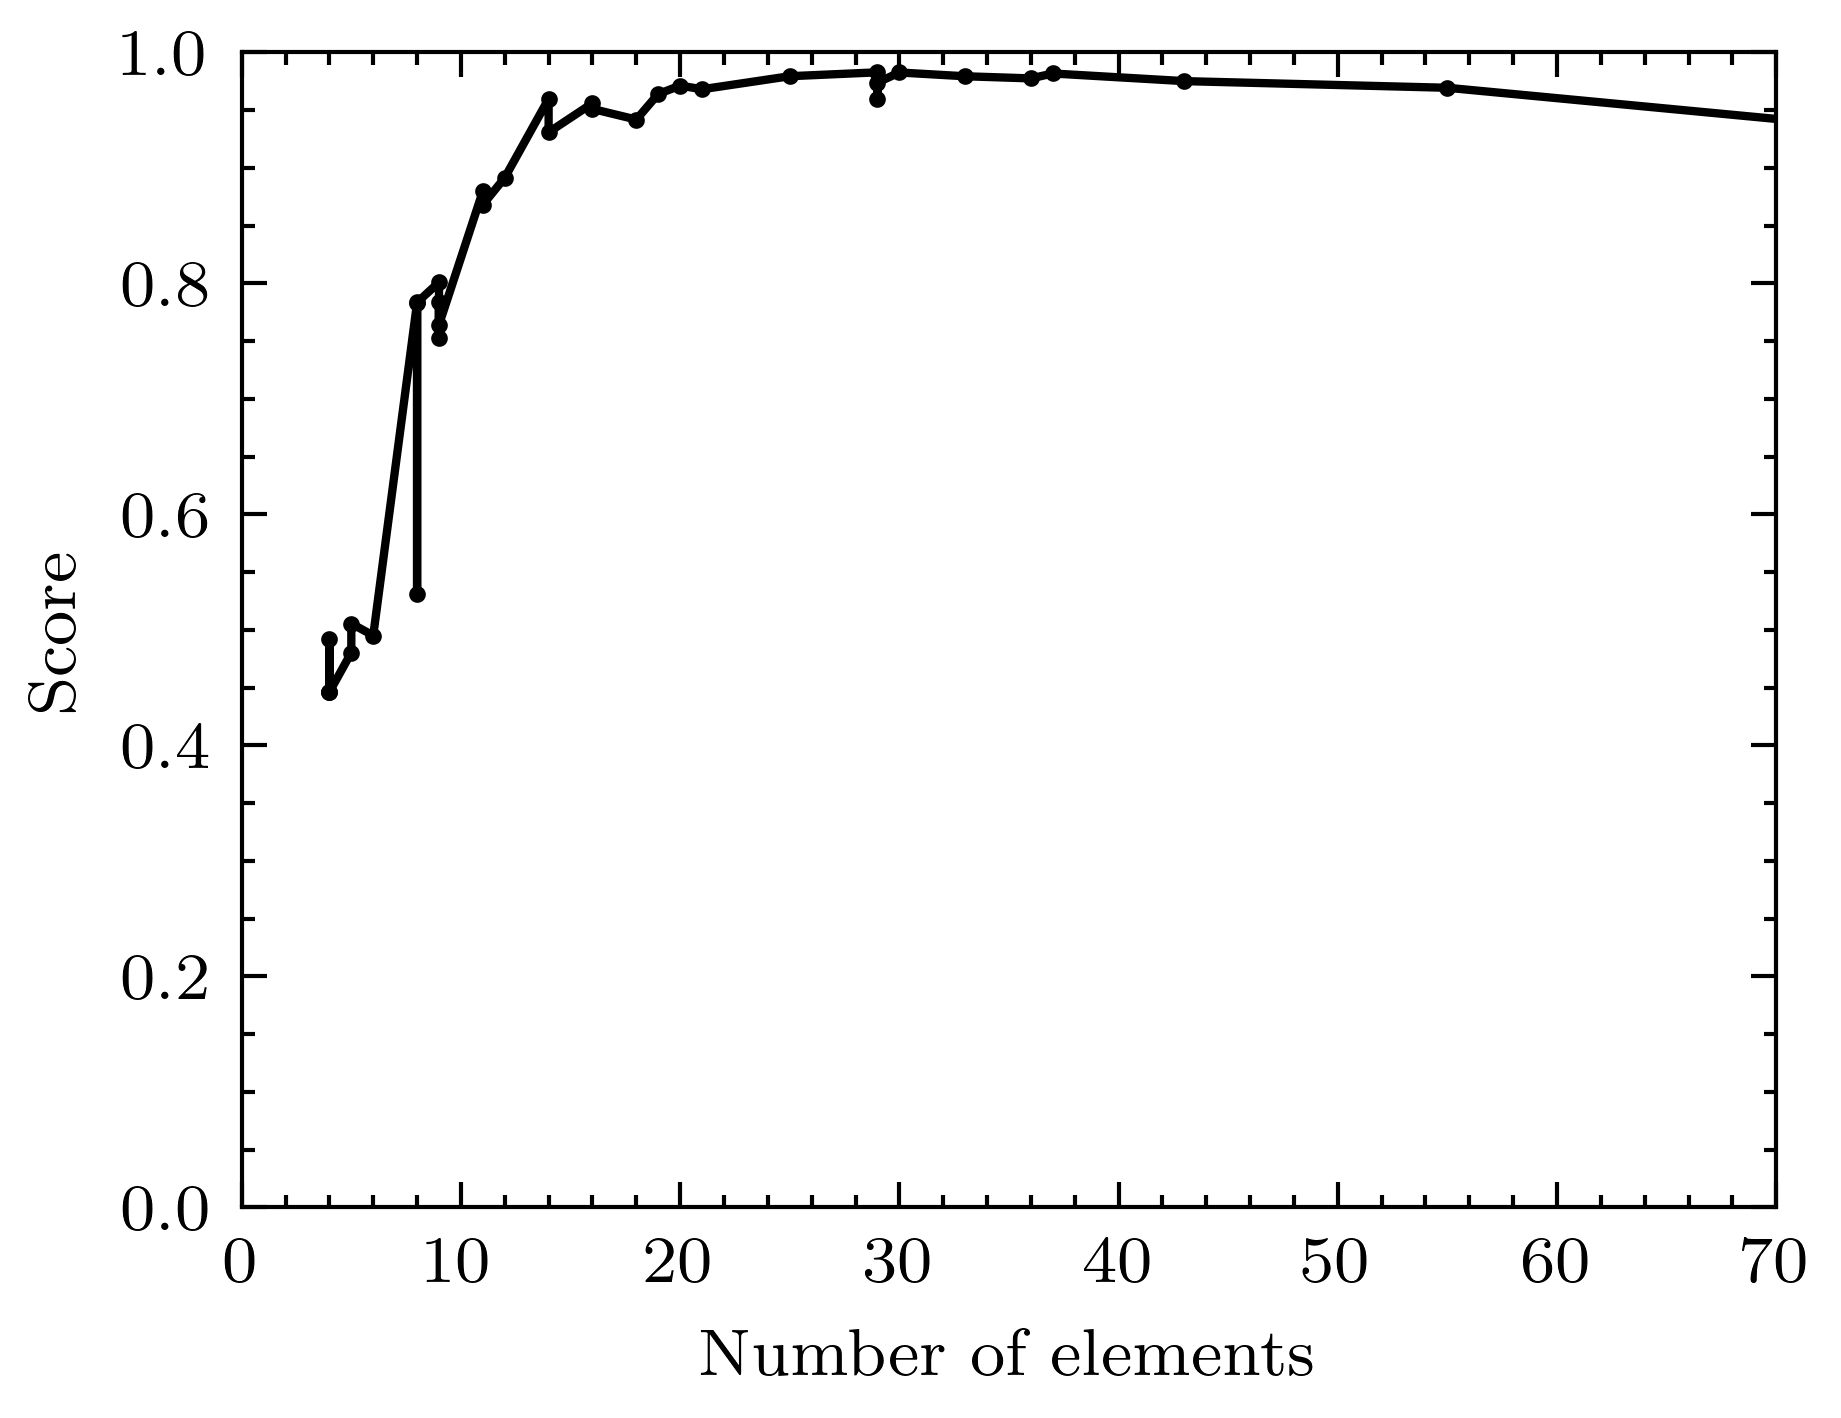

In [86]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

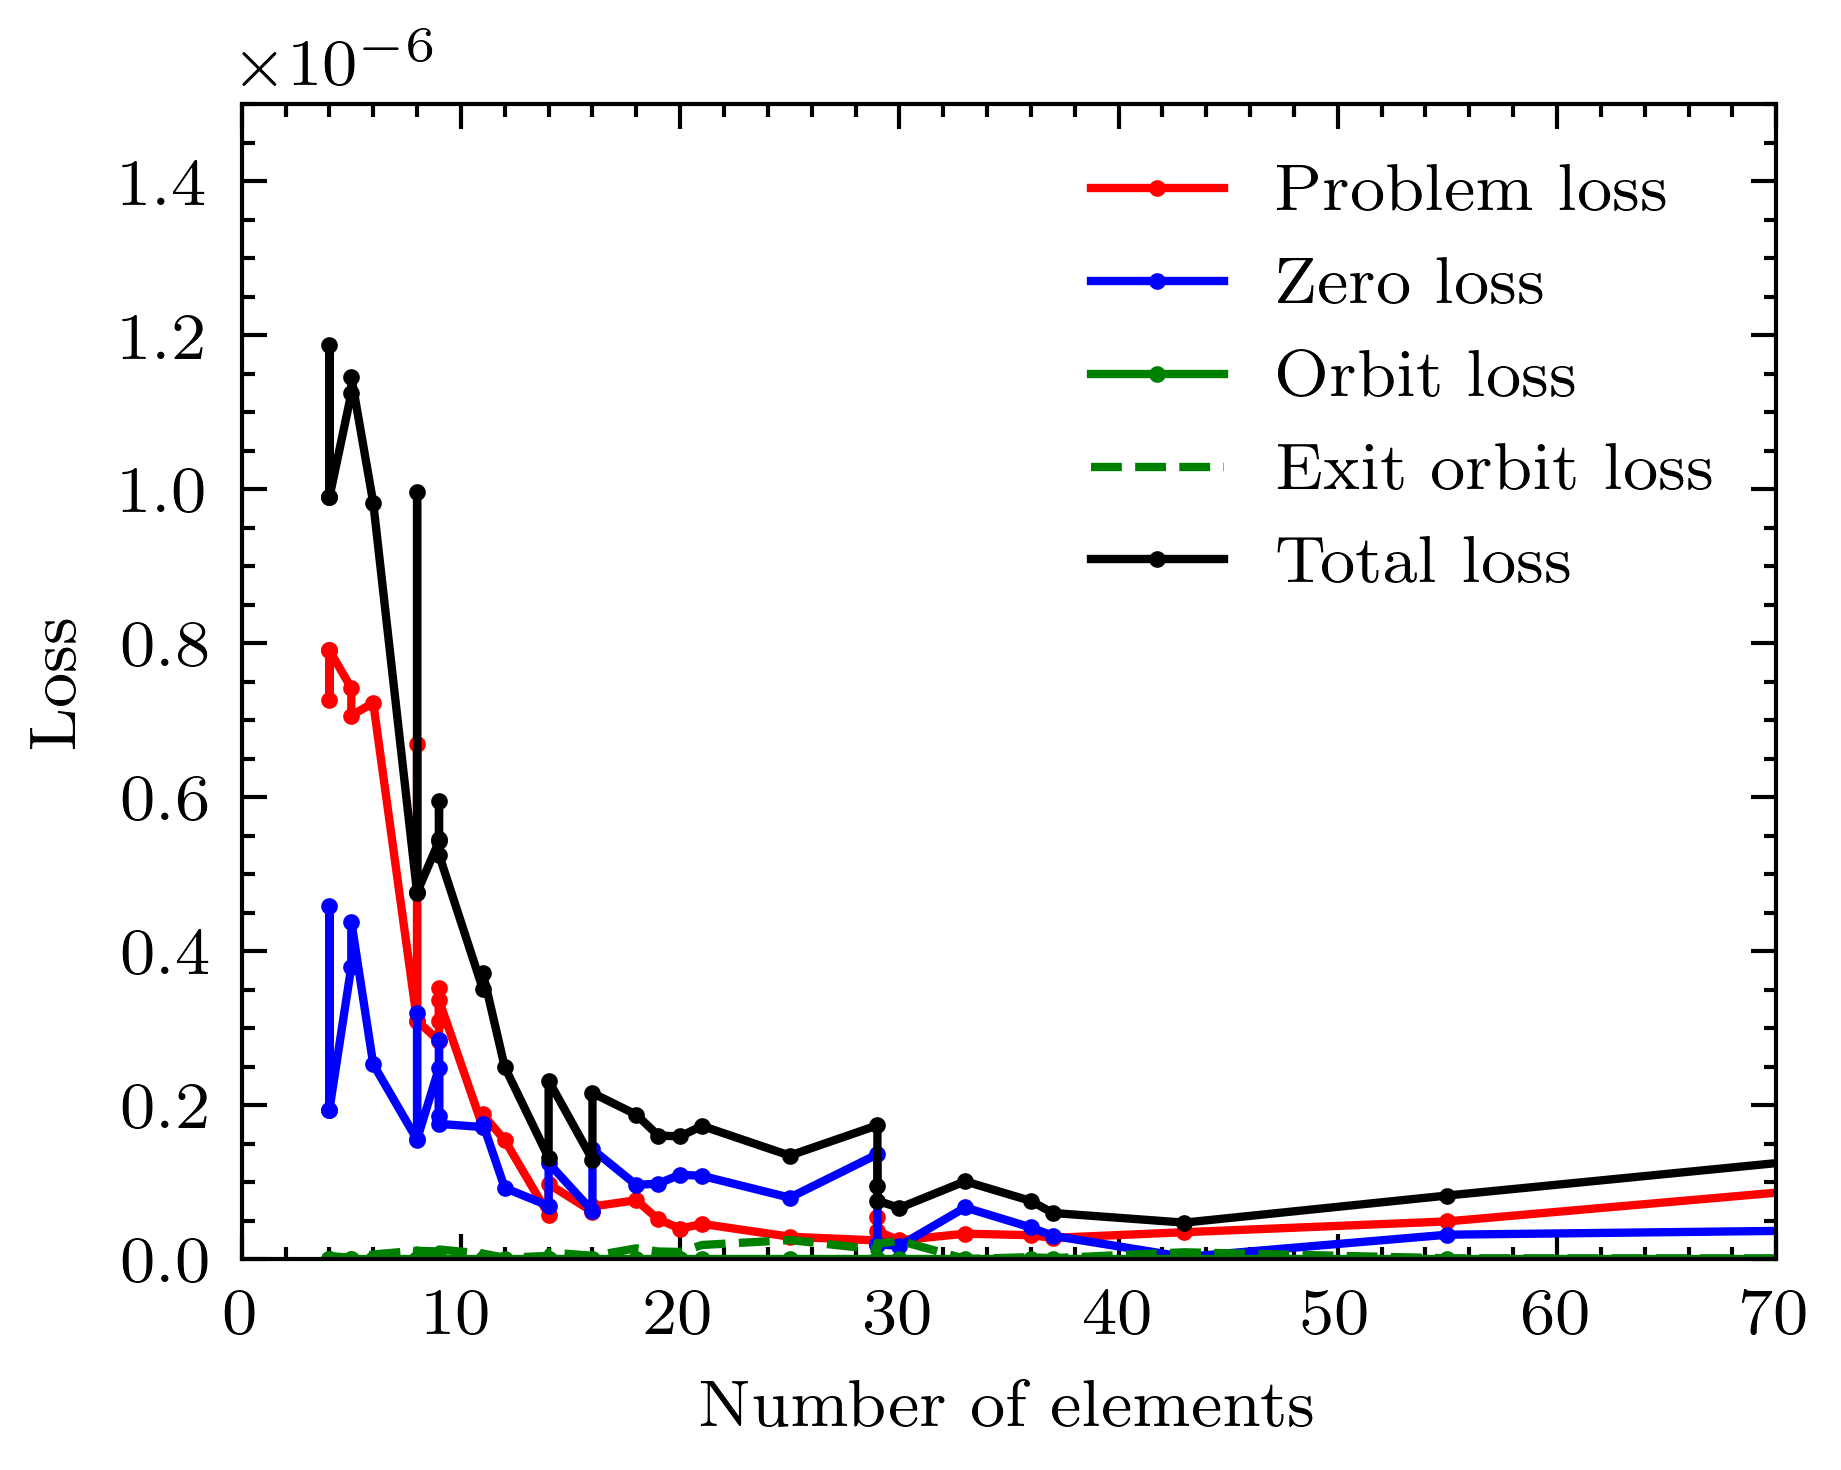

In [87]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

In [93]:
FOLDER = "data/learning_storage/forward_backward/Y6_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
38  regularizer_mod_5_4  5.000000e-07           3   
27  regularizer_mod_5_4  5.000000e-07           3   
0   regularizer_mod_5_4  5.000000e-07           4   
13  regularizer_mod_5_4  5.000000e-07           4   
32  regularizer_mod_5_4  5.000000e-07           4   
42  regularizer_mod_5_4  5.000000e-07           5   
17  regularizer_mod_5_4  5.000000e-07           6   
14  regularizer_mod_5_4  5.000000e-07           8   
26  regularizer_mod_5_4  5.000000e-07           8   
18  regularizer_mod_5_4  5.000000e-07           8   
34  regularizer_mod_5_4  5.000000e-07           9   
40  regularizer_mod_5_4  5.000000e-07           9   
16  regularizer_mod_5_4  5.000000e-07           9   
8   regularizer_mod_5_4  5.000000e-07          10   
9   regularizer_mod_5_4  5.000000e-07          10   
2   regularizer_mod_5_4  5.000000e-07          11   
36  regularizer_mod_5_4  5.000000e-07          12   
21  regularizer_mod_5_4  5.000

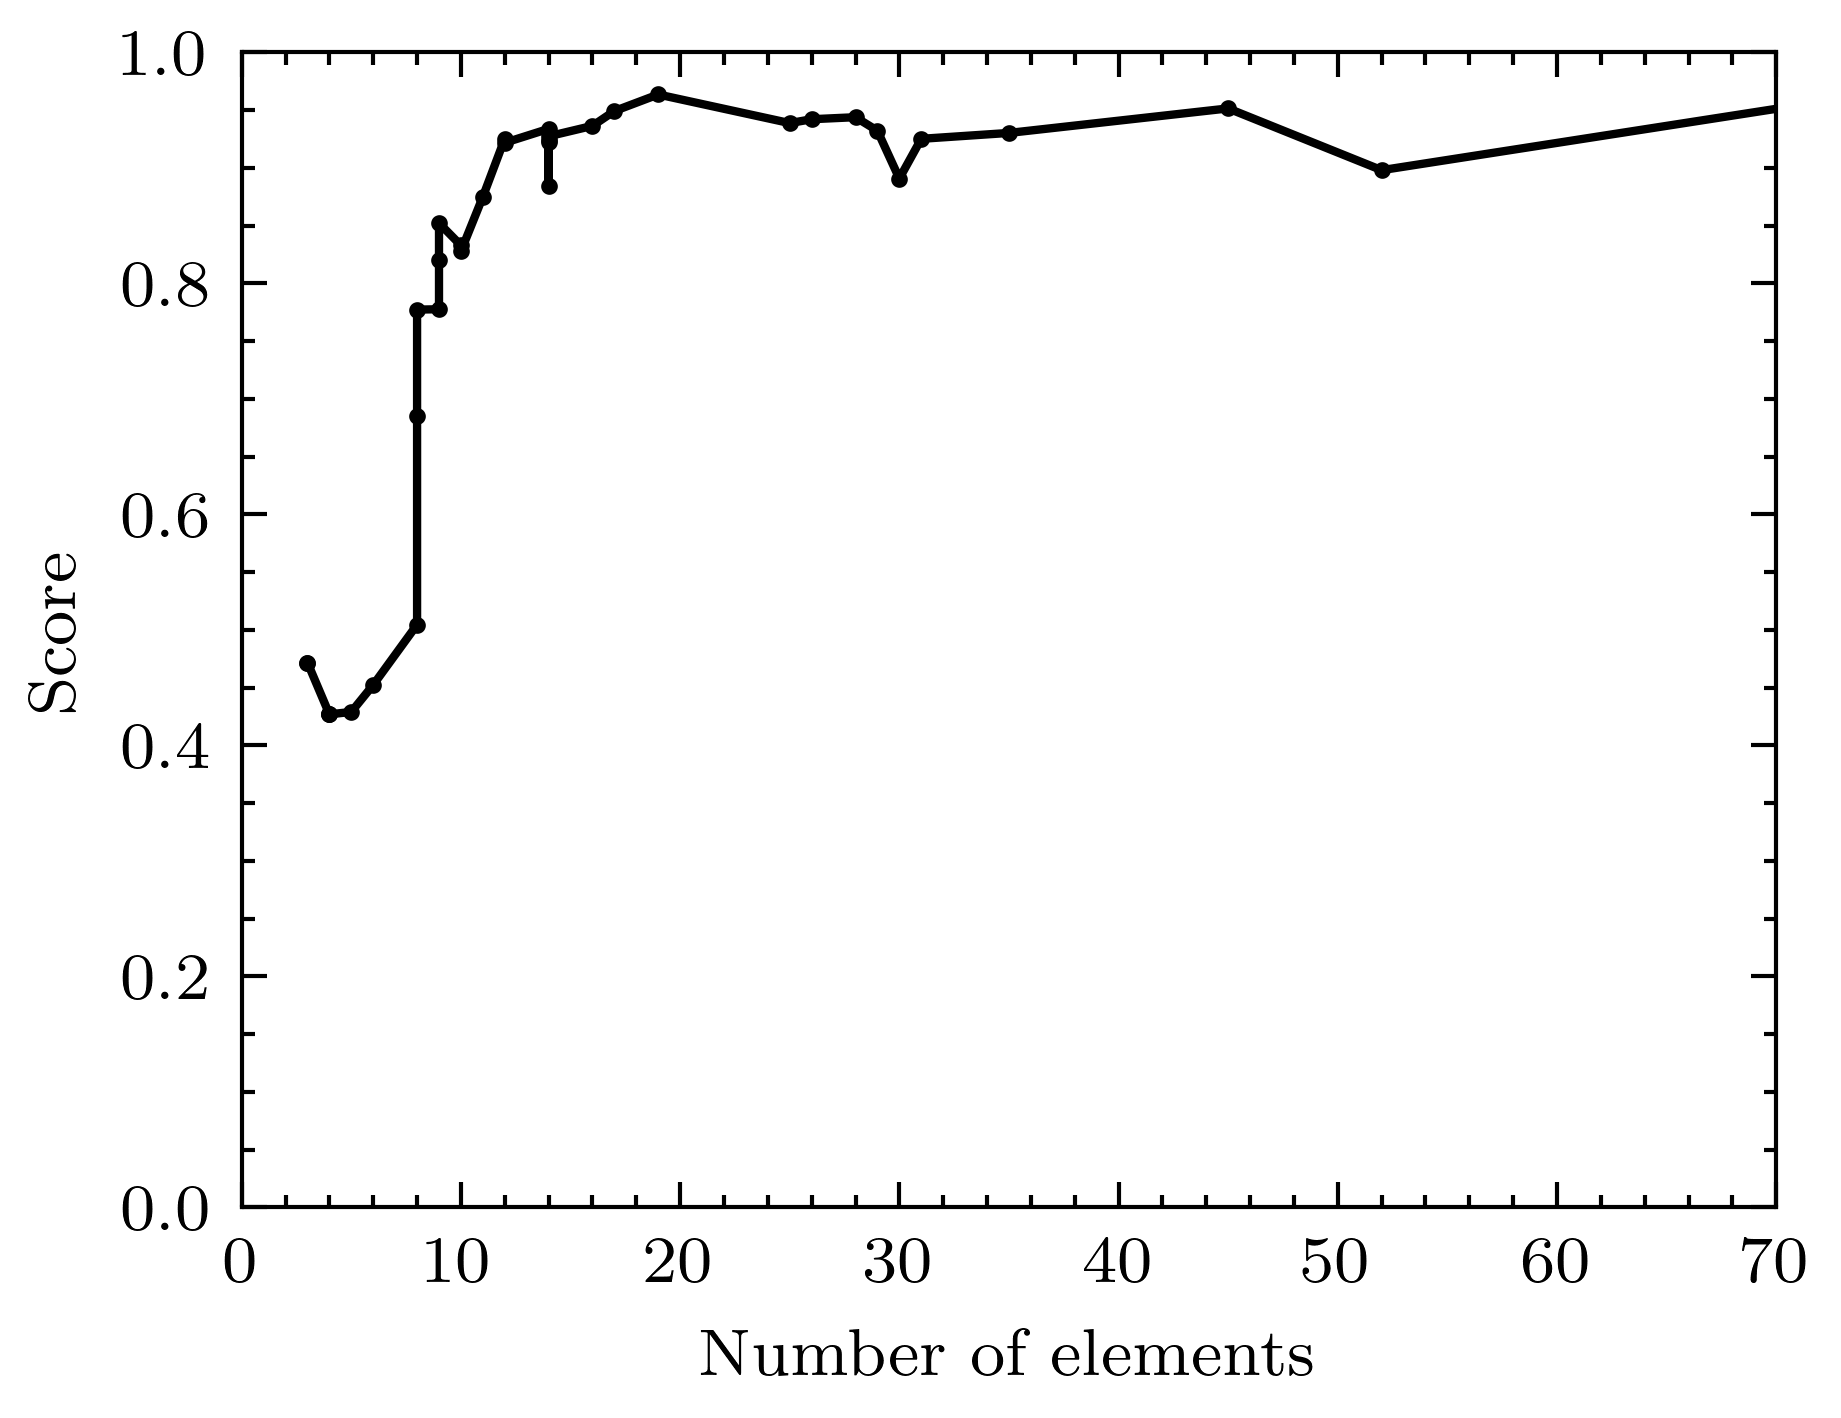

In [95]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

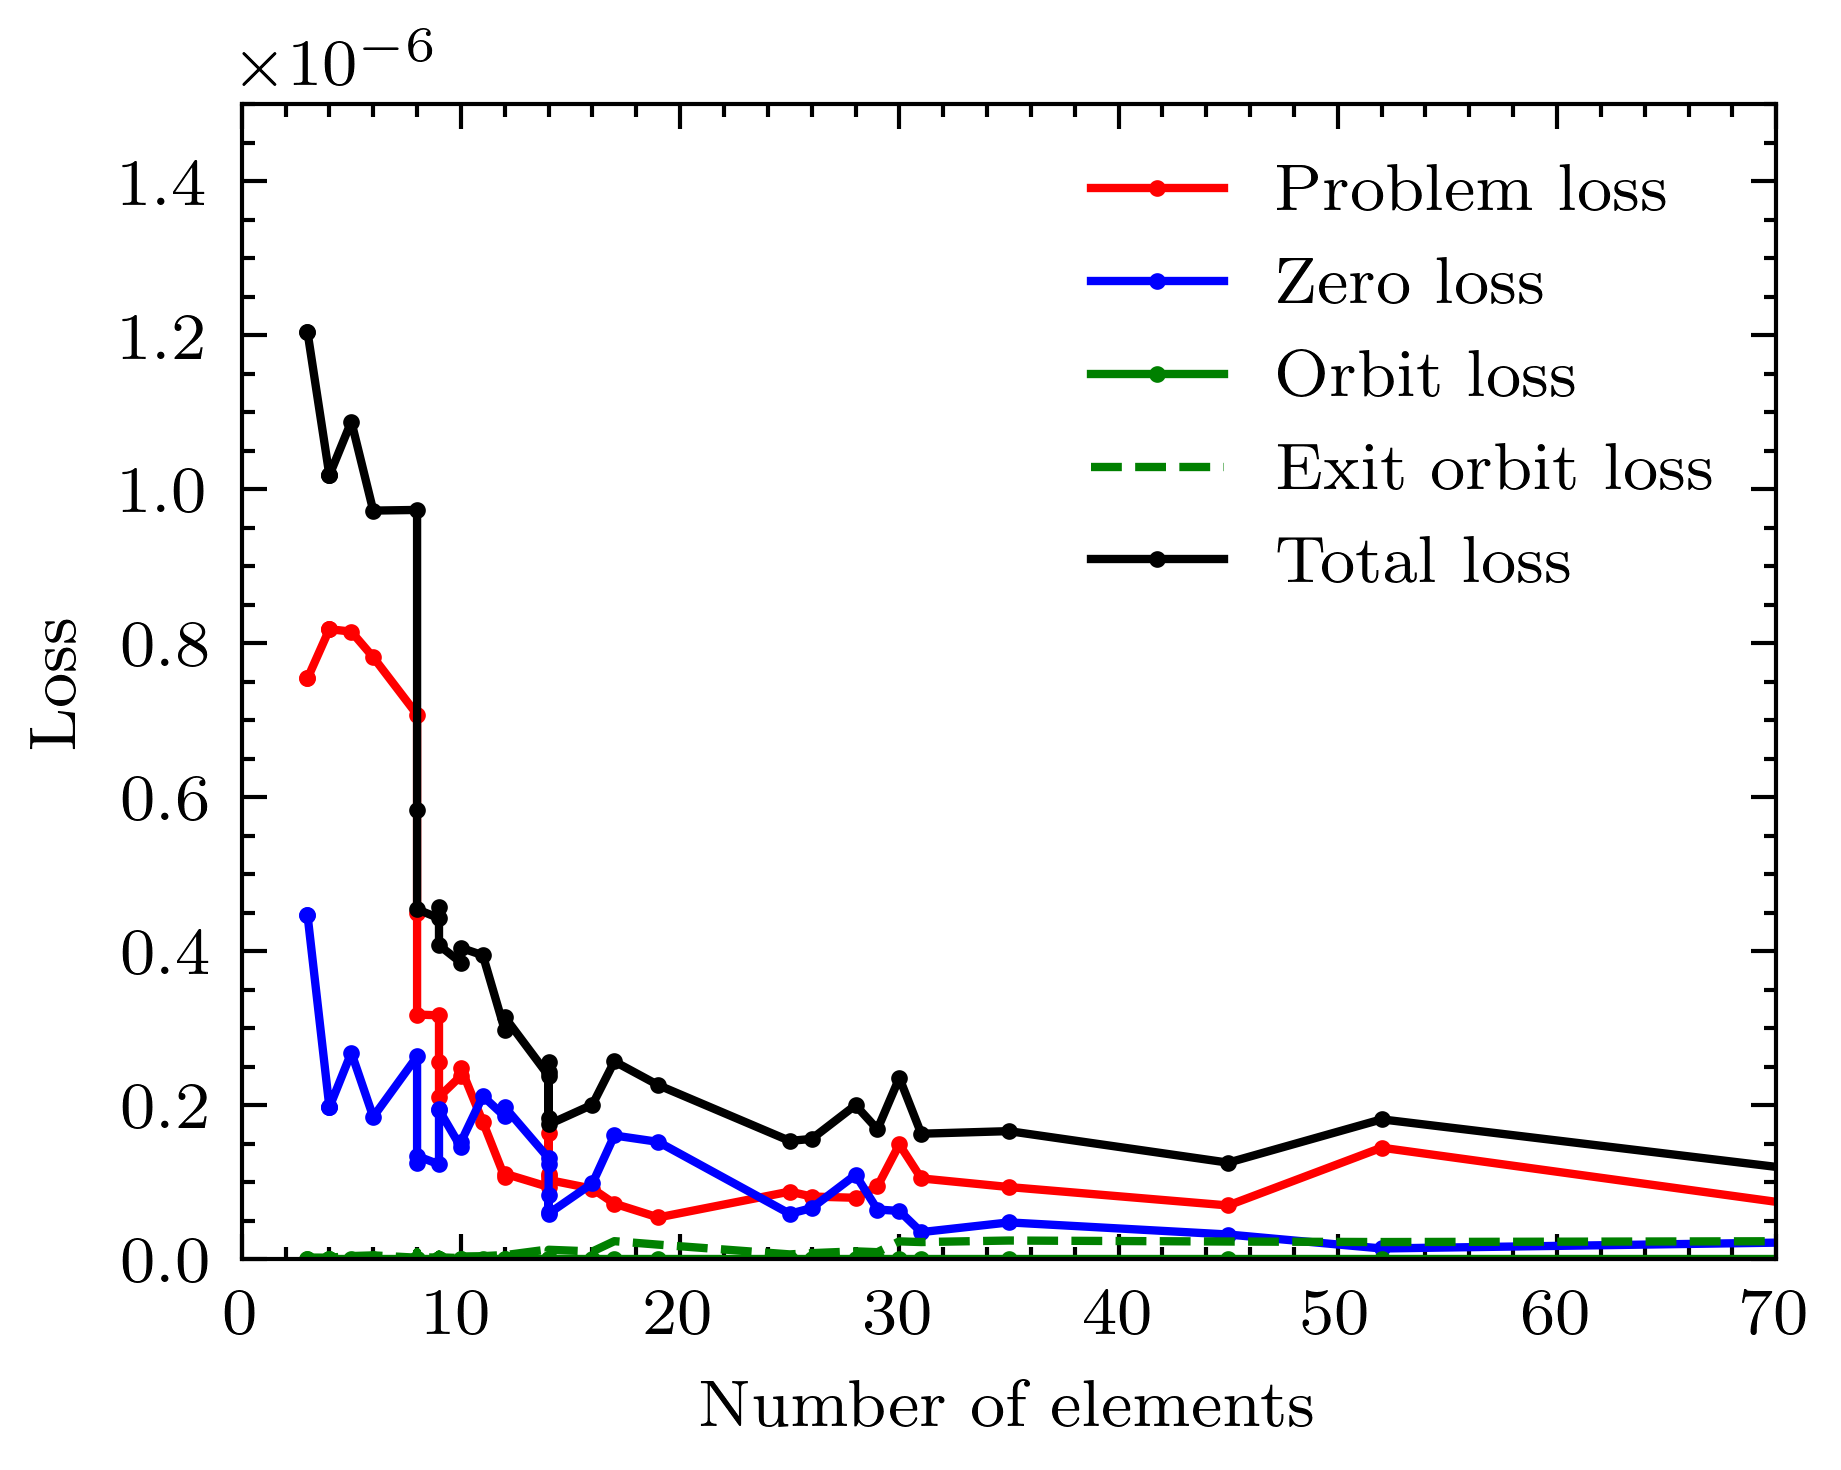

In [96]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y7**

In [103]:
FOLDER = "data/learning_storage/forward_backward/Y7_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
29  regularizer_mod_5_4  5.000000e-07           2   
31  regularizer_mod_5_4  5.000000e-07           3   
8   regularizer_mod_5_4  5.000000e-07           3   
36  regularizer_mod_5_4  5.000000e-07           4   
28  regularizer_mod_5_4  5.000000e-07           4   
20  regularizer_mod_5_4  5.000000e-07           4   
5   regularizer_mod_5_4  5.000000e-07           4   
9   regularizer_mod_5_4  5.000000e-07           4   
15  regularizer_mod_5_4  5.000000e-07           7   
25  regularizer_mod_5_4  5.000000e-07           8   
32  regularizer_mod_5_4  5.000000e-07           8   
4   regularizer_mod_5_4  5.000000e-07           8   
33  regularizer_mod_5_4  5.000000e-07           9   
27  regularizer_mod_5_4  5.000000e-07           9   
44  regularizer_mod_5_4  5.000000e-07           9   
39  regularizer_mod_5_4  5.000000e-07           9   
24  regularizer_mod_5_4  5.000000e-07          11   
17  regularizer_mod_5_4  5.000

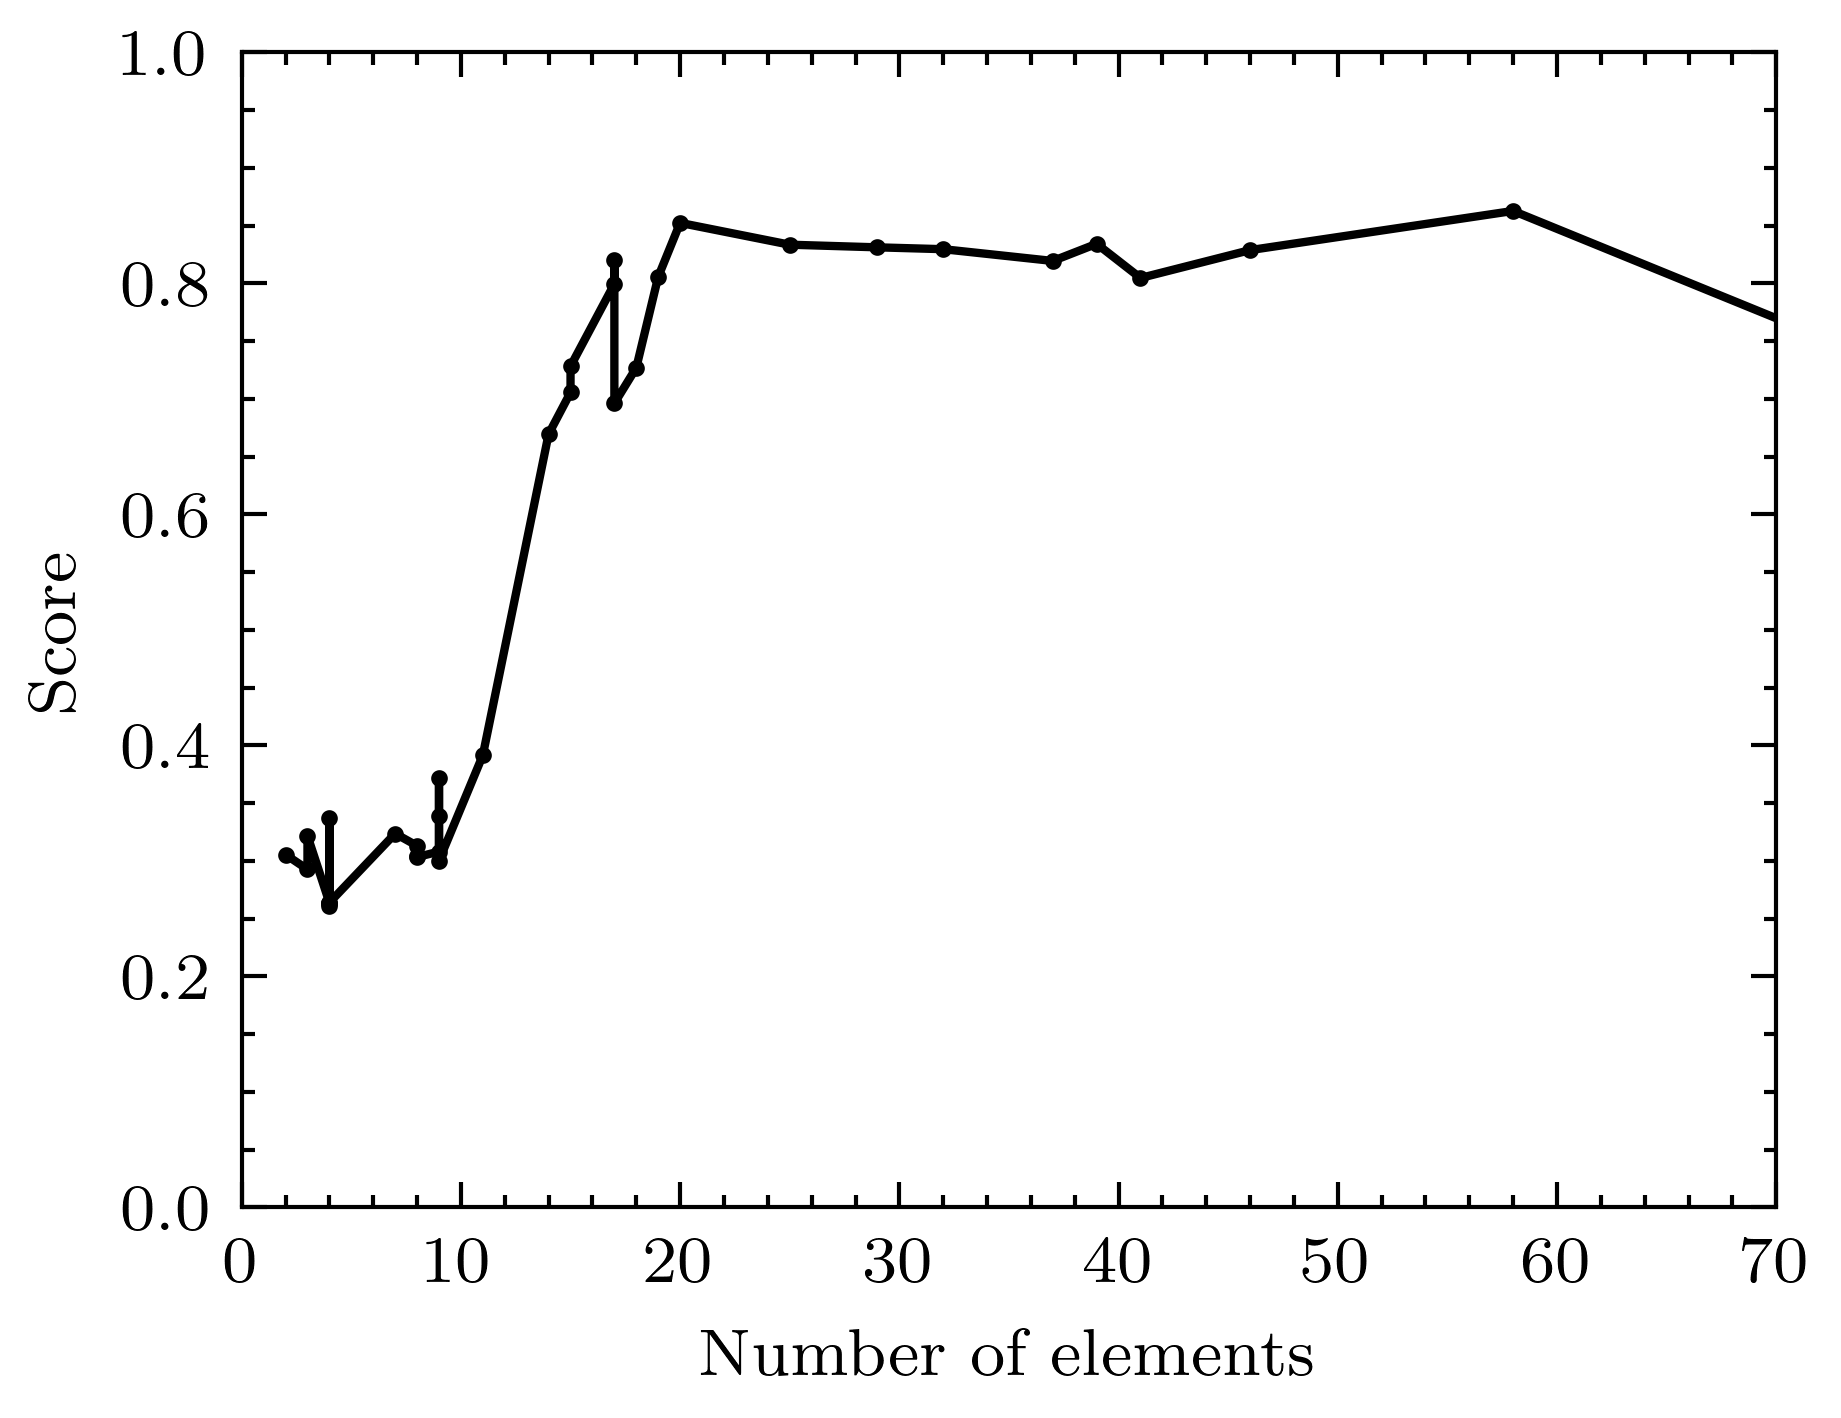

In [104]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

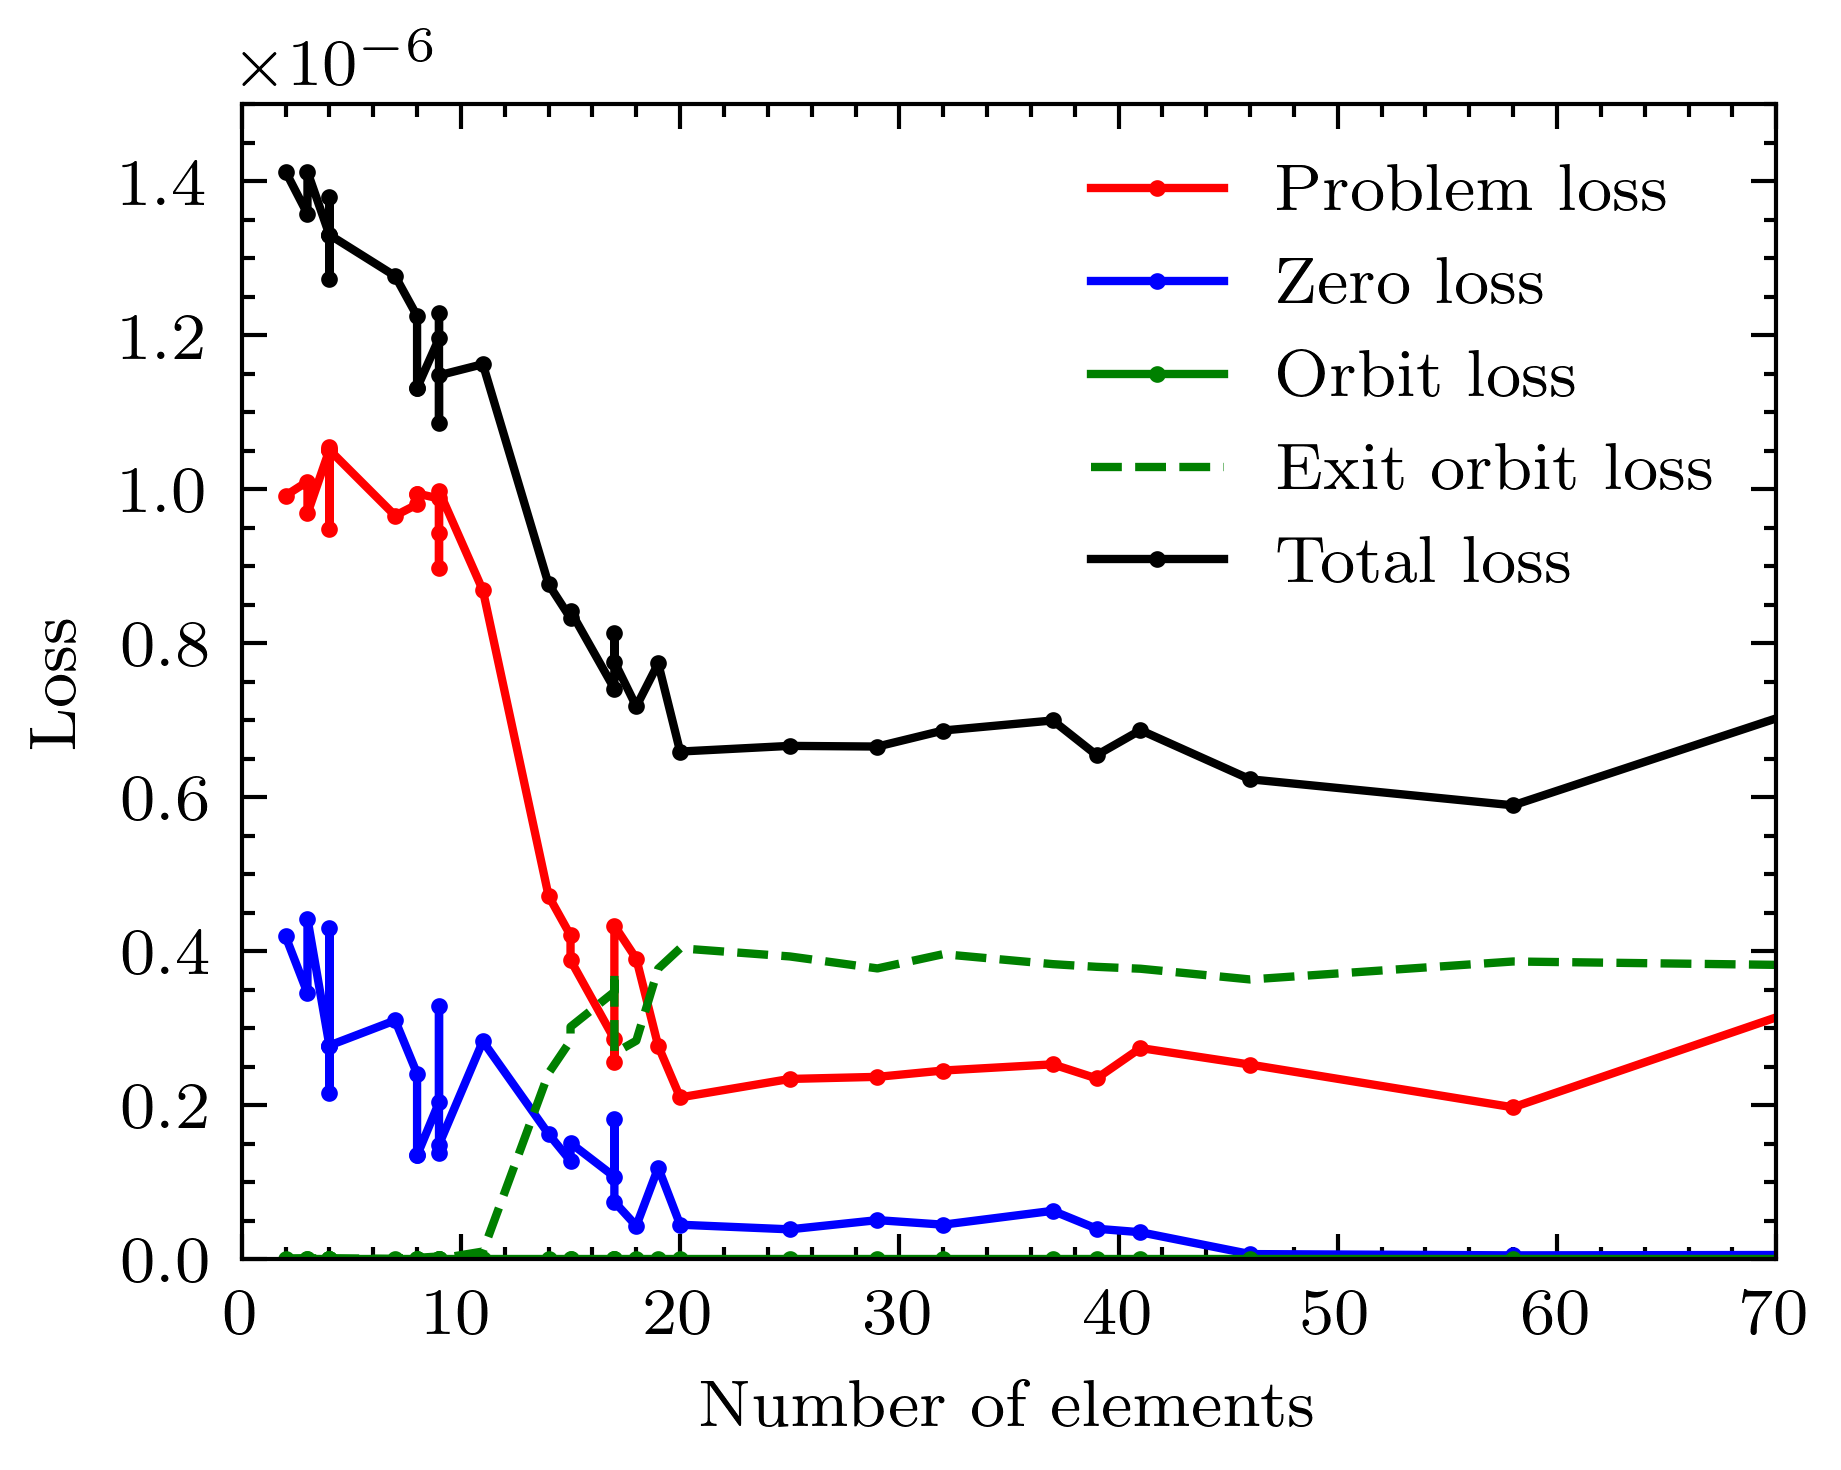

In [105]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

In [106]:
FOLDER = "data/learning_storage/forward_backward/Y8_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 44 files.
         Regularization         alpha  n_features  \
21  regularizer_mod_5_4  5.000000e-07           2   
35  regularizer_mod_5_4  5.000000e-07           3   
30  regularizer_mod_5_4  5.000000e-07           3   
41  regularizer_mod_5_4  5.000000e-07           4   
27  regularizer_mod_5_4  5.000000e-07           4   
0   regularizer_mod_5_4  5.000000e-07           4   
2   regularizer_mod_5_4  5.000000e-07           6   
36  regularizer_mod_5_4  5.000000e-07           6   
34  regularizer_mod_5_4  5.000000e-07           6   
8   regularizer_mod_5_4  5.000000e-07           7   
11  regularizer_mod_5_4  5.000000e-07           7   
39  regularizer_mod_5_4  5.000000e-07           7   
9   regularizer_mod_5_4  5.000000e-07           8   
12  regularizer_mod_5_4  5.000000e-07           8   
31  regularizer_mod_5_4  5.000000e-07           9   
25  regularizer_mod_5_4  5.000000e-07           9   
26  regularizer_mod_5_4  5.000000e-07          12   
1   regularizer_mod_5_4  5.000

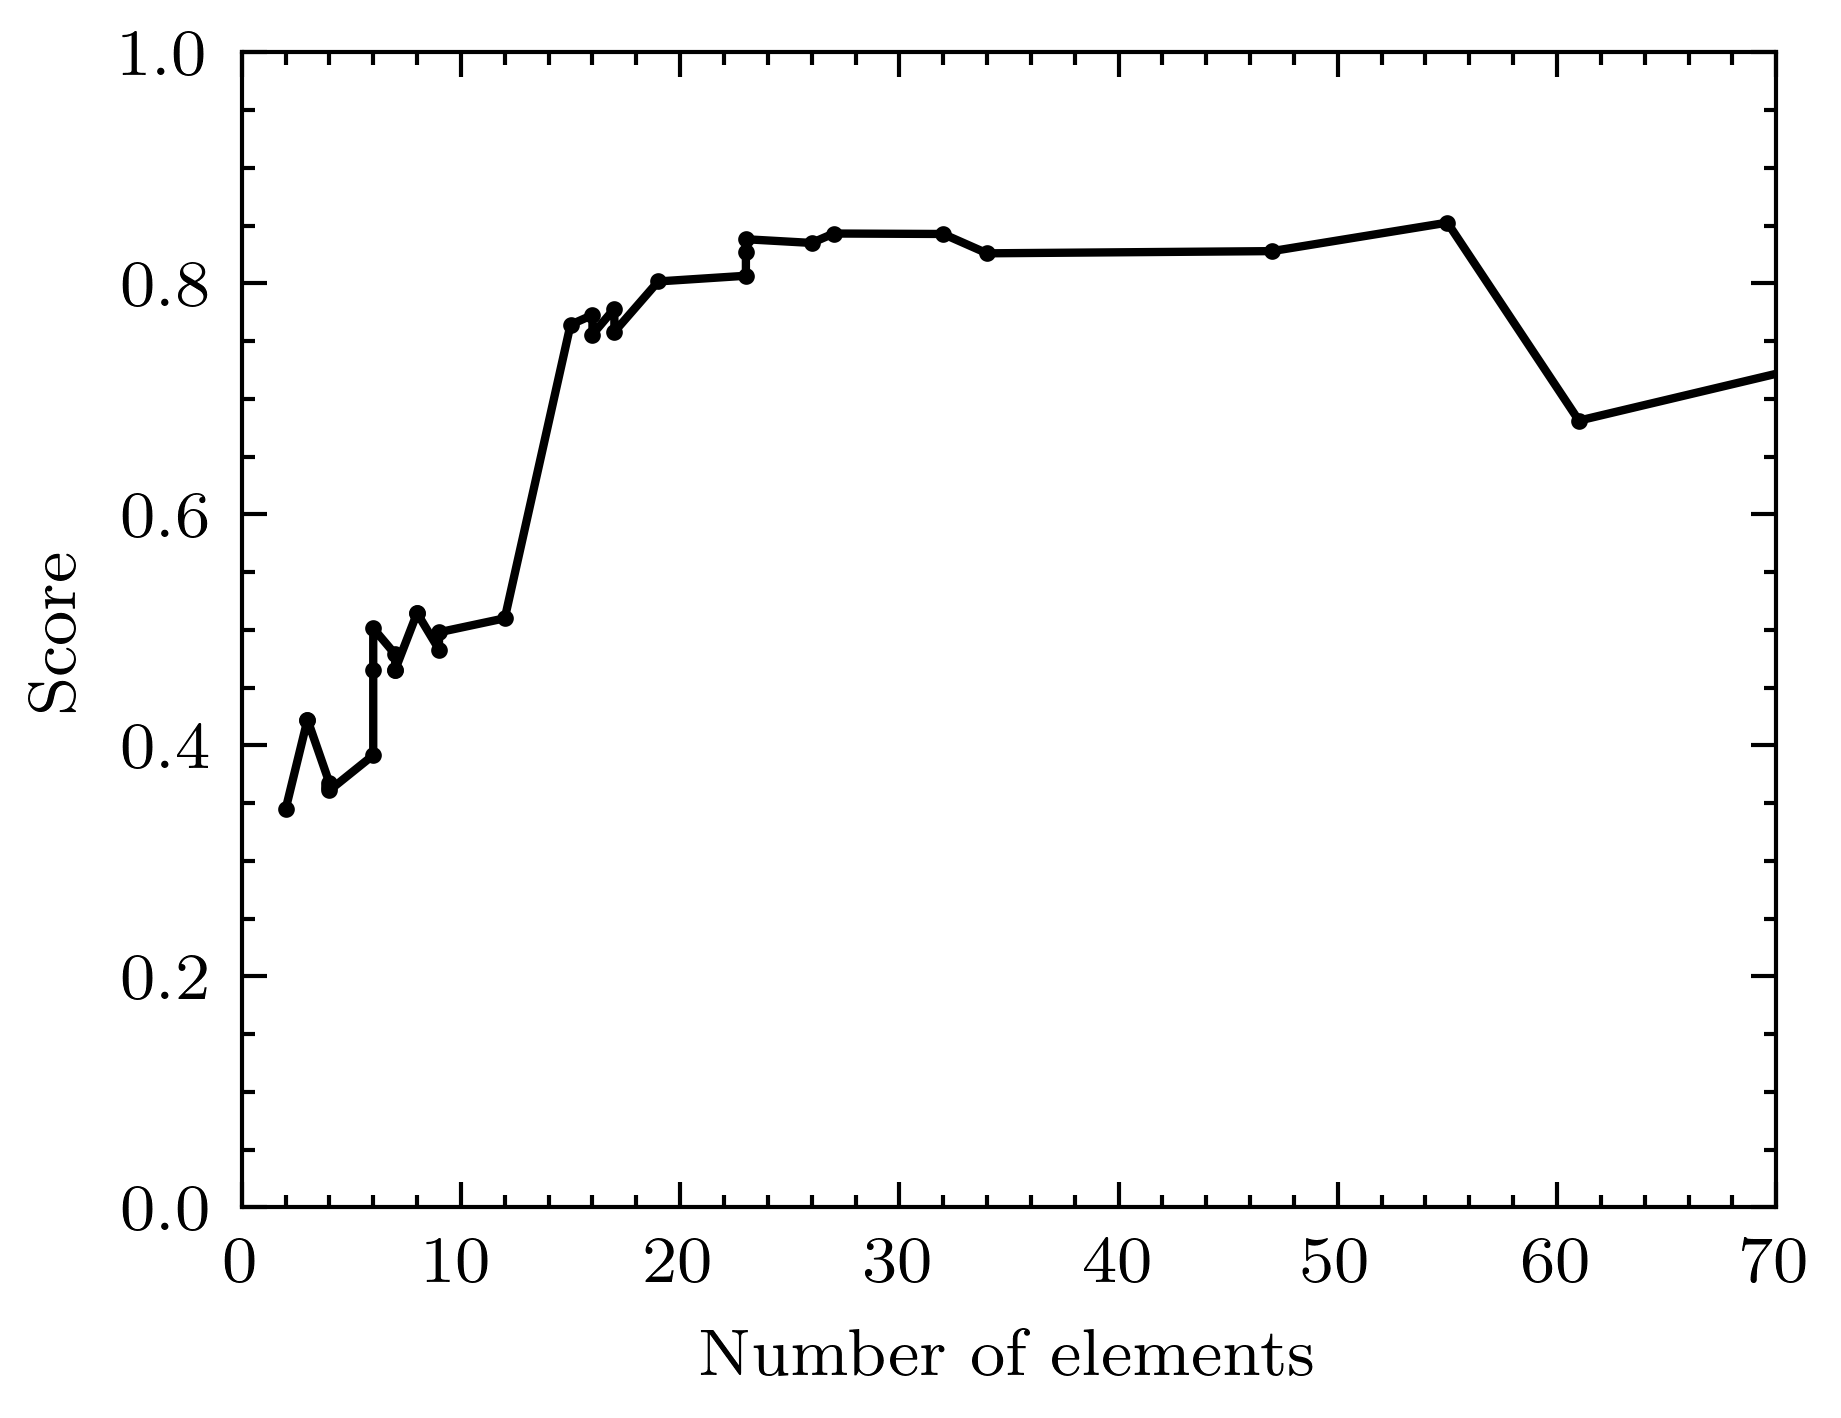

In [107]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

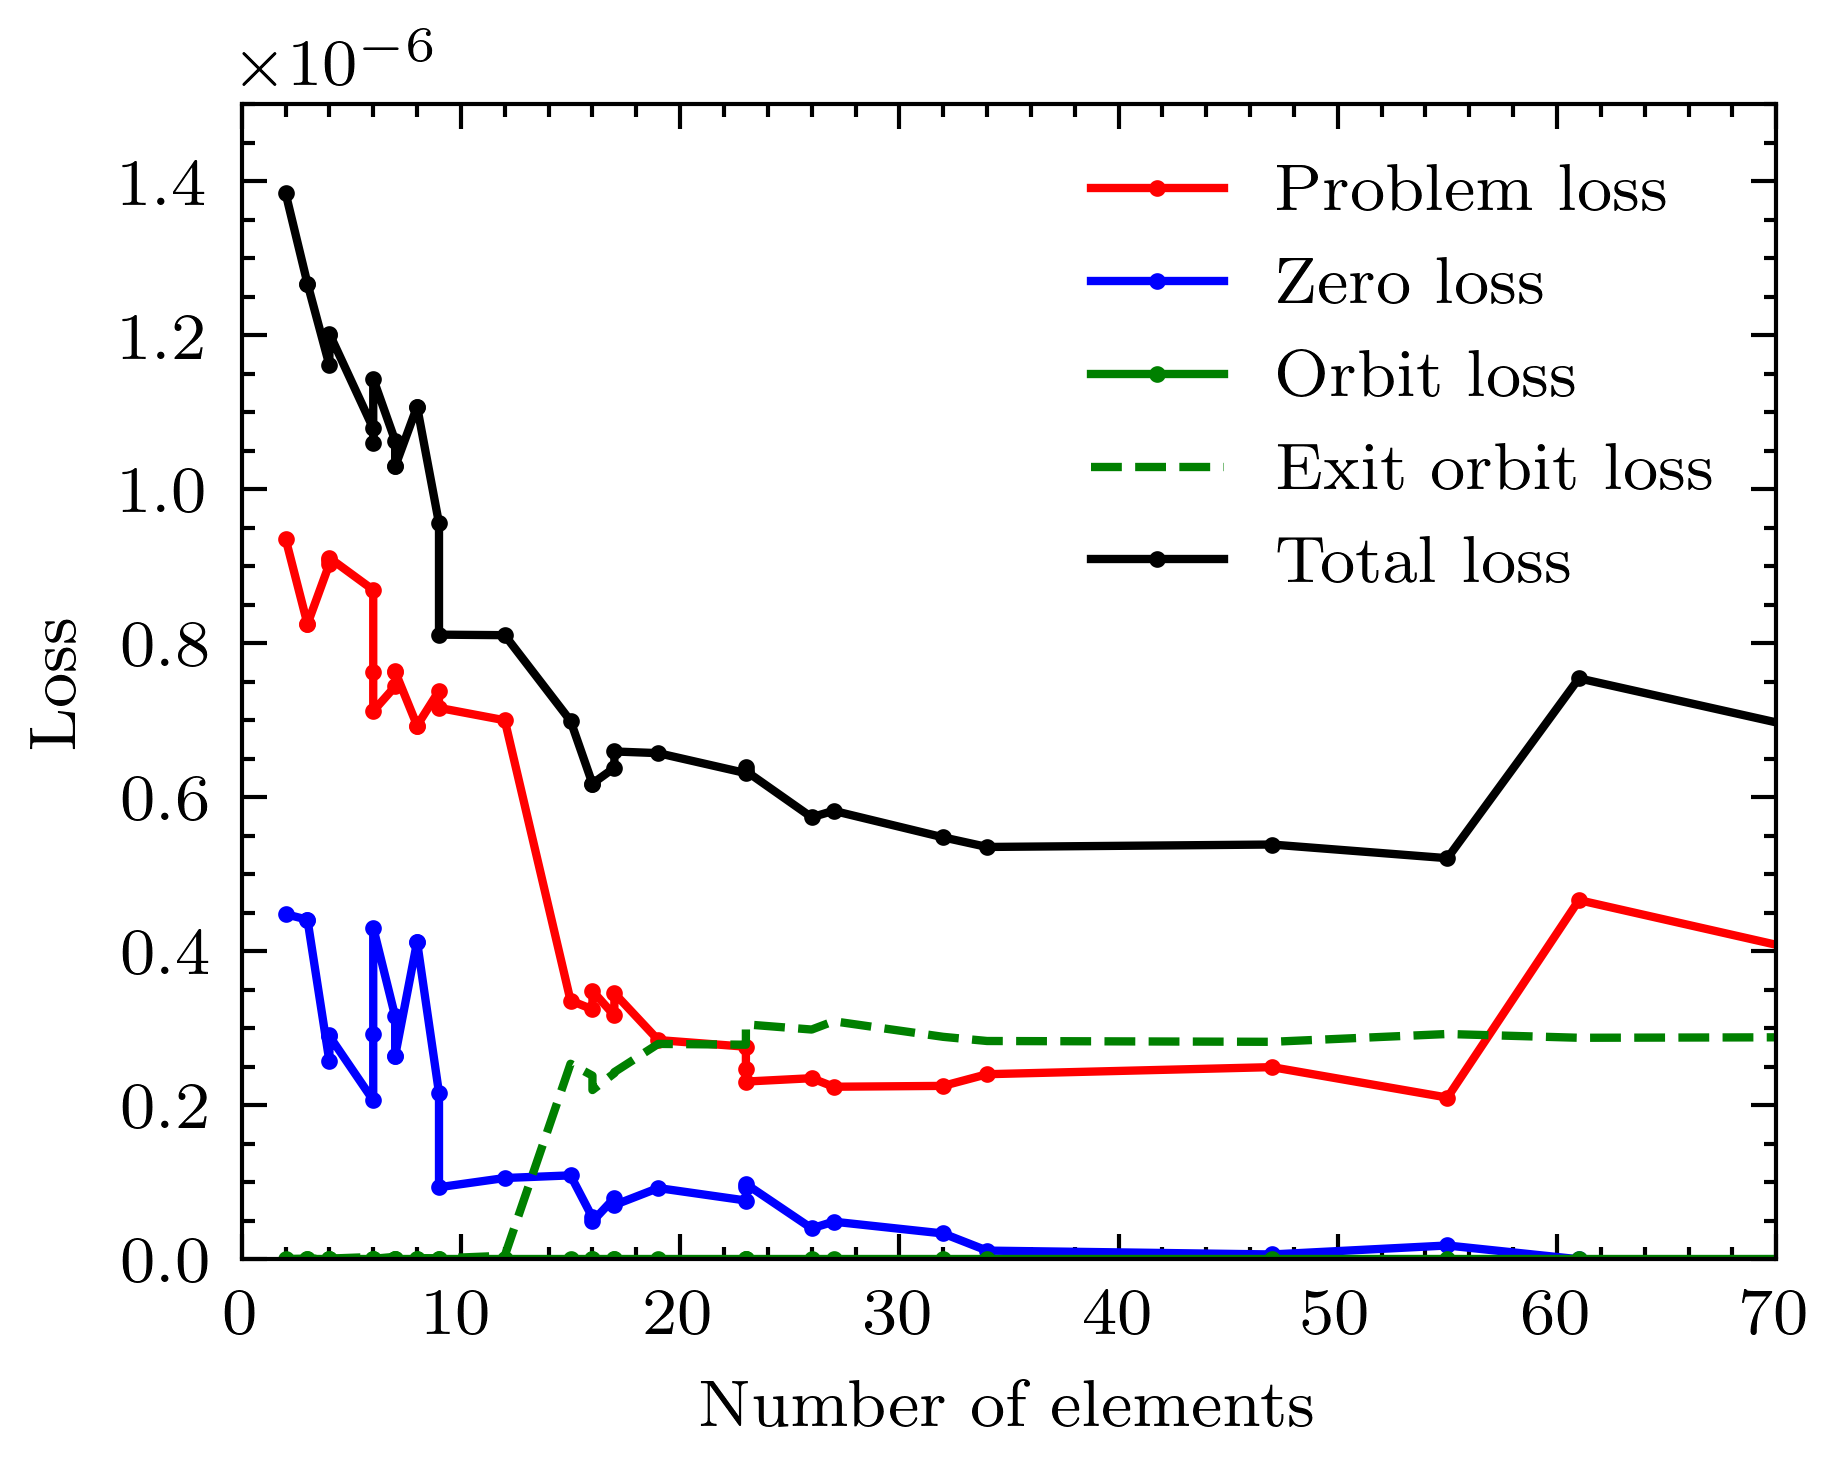

In [108]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

In [109]:
FOLDER = "data/learning_storage/forward_backward/Y9_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
23  regularizer_mod_5_4  5.000000e-07           3   
28  regularizer_mod_5_4  5.000000e-07           3   
20  regularizer_mod_5_4  5.000000e-07           4   
26  regularizer_mod_5_4  5.000000e-07           4   
17  regularizer_mod_5_4  5.000000e-07           6   
5   regularizer_mod_5_4  5.000000e-07           6   
13  regularizer_mod_5_4  5.000000e-07           6   
40  regularizer_mod_5_4  5.000000e-07           7   
10  regularizer_mod_5_4  5.000000e-07           7   
21  regularizer_mod_5_4  5.000000e-07           8   
27  regularizer_mod_5_4  5.000000e-07           8   
31  regularizer_mod_5_4  5.000000e-07           9   
30  regularizer_mod_5_4  5.000000e-07          10   
33  regularizer_mod_5_4  5.000000e-07          10   
19  regularizer_mod_5_4  5.000000e-07          10   
3   regularizer_mod_5_4  5.000000e-07          12   
37  regularizer_mod_5_4  5.000000e-07          12   
2   regularizer_mod_5_4  5.000

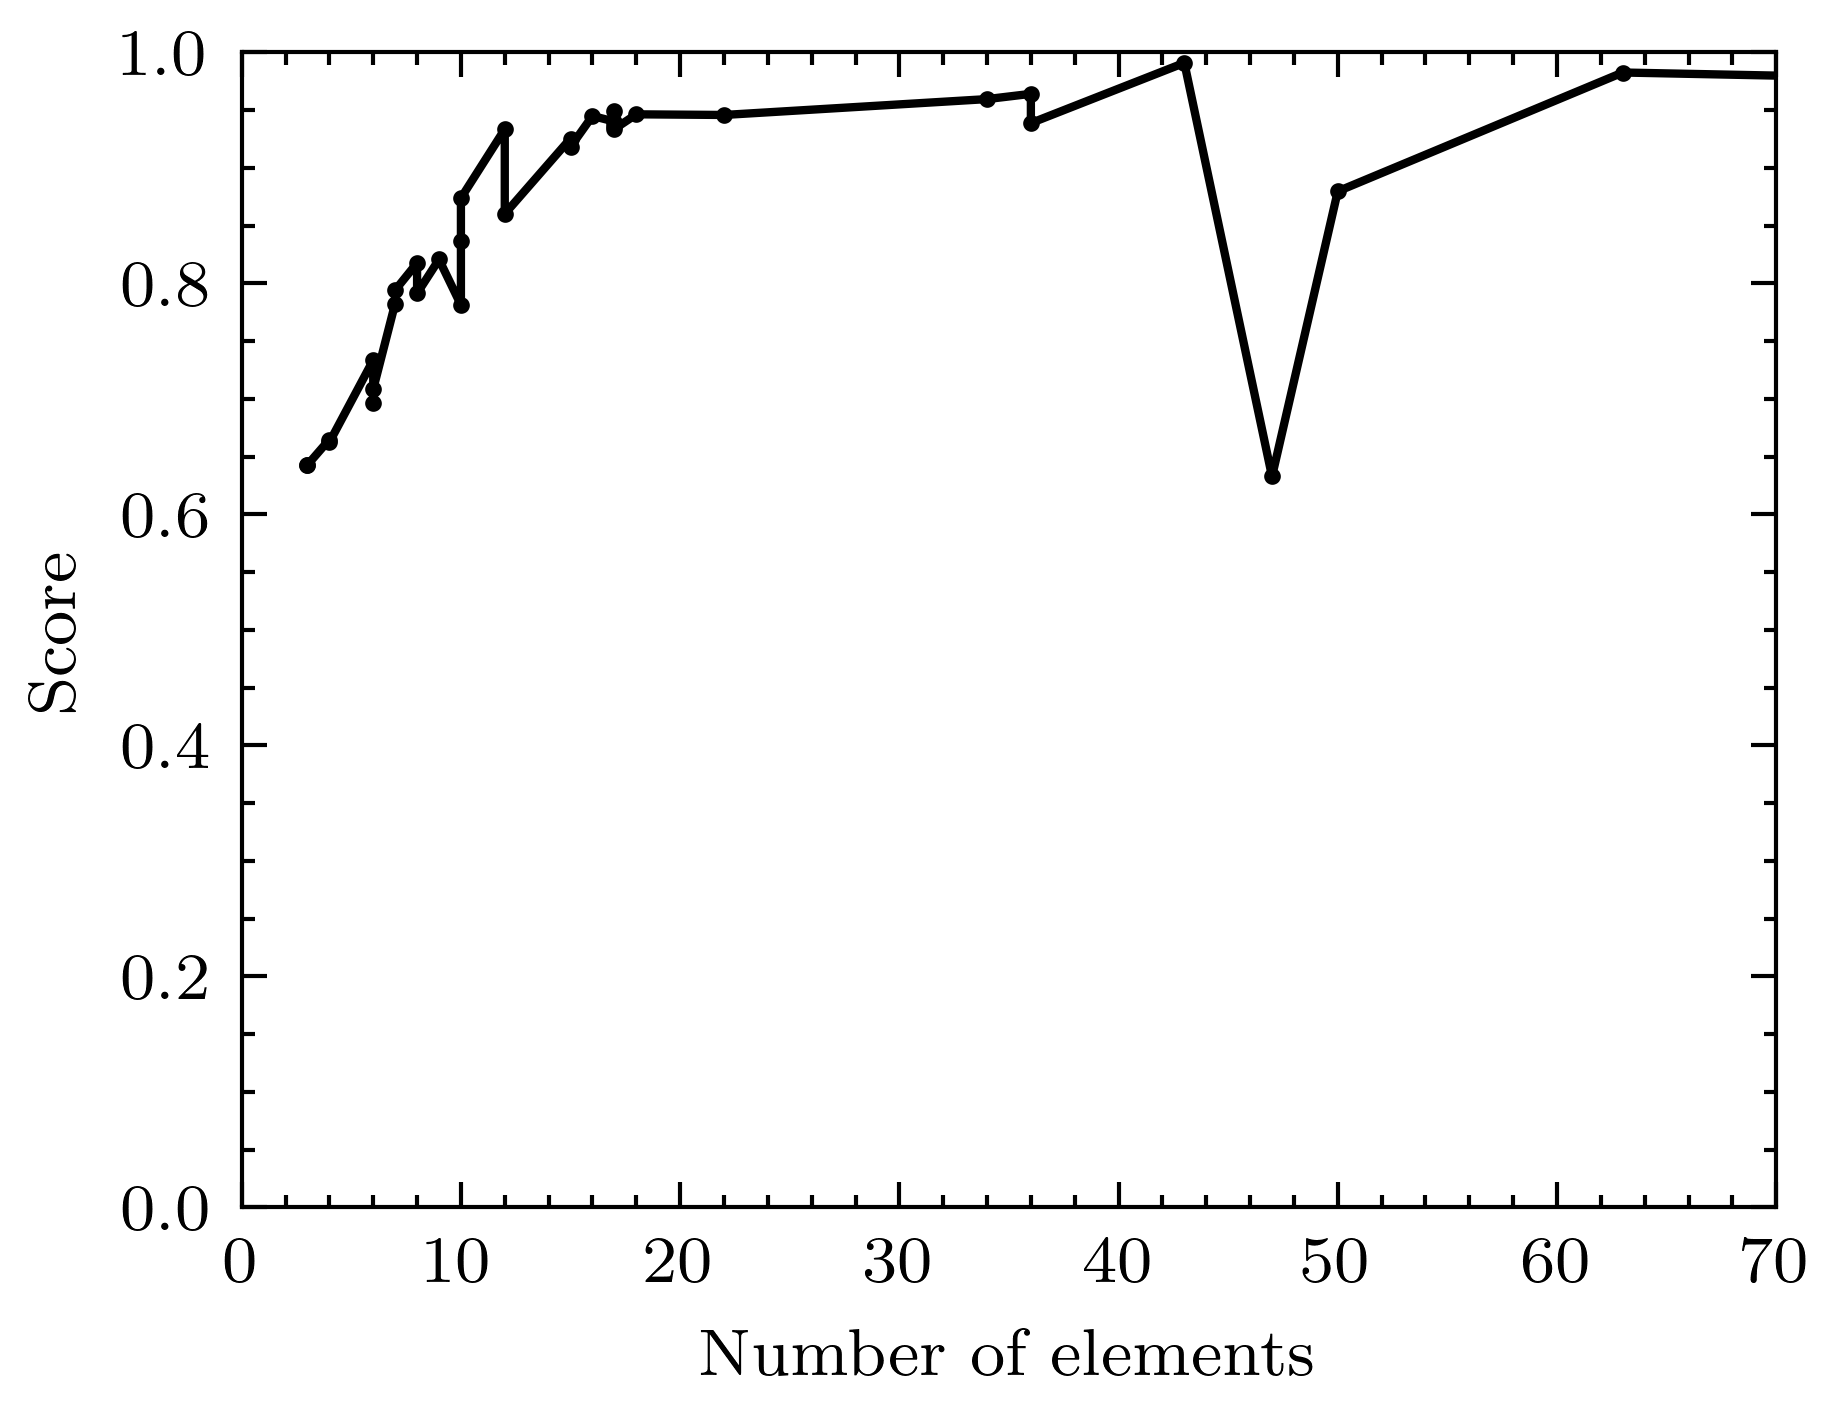

In [110]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

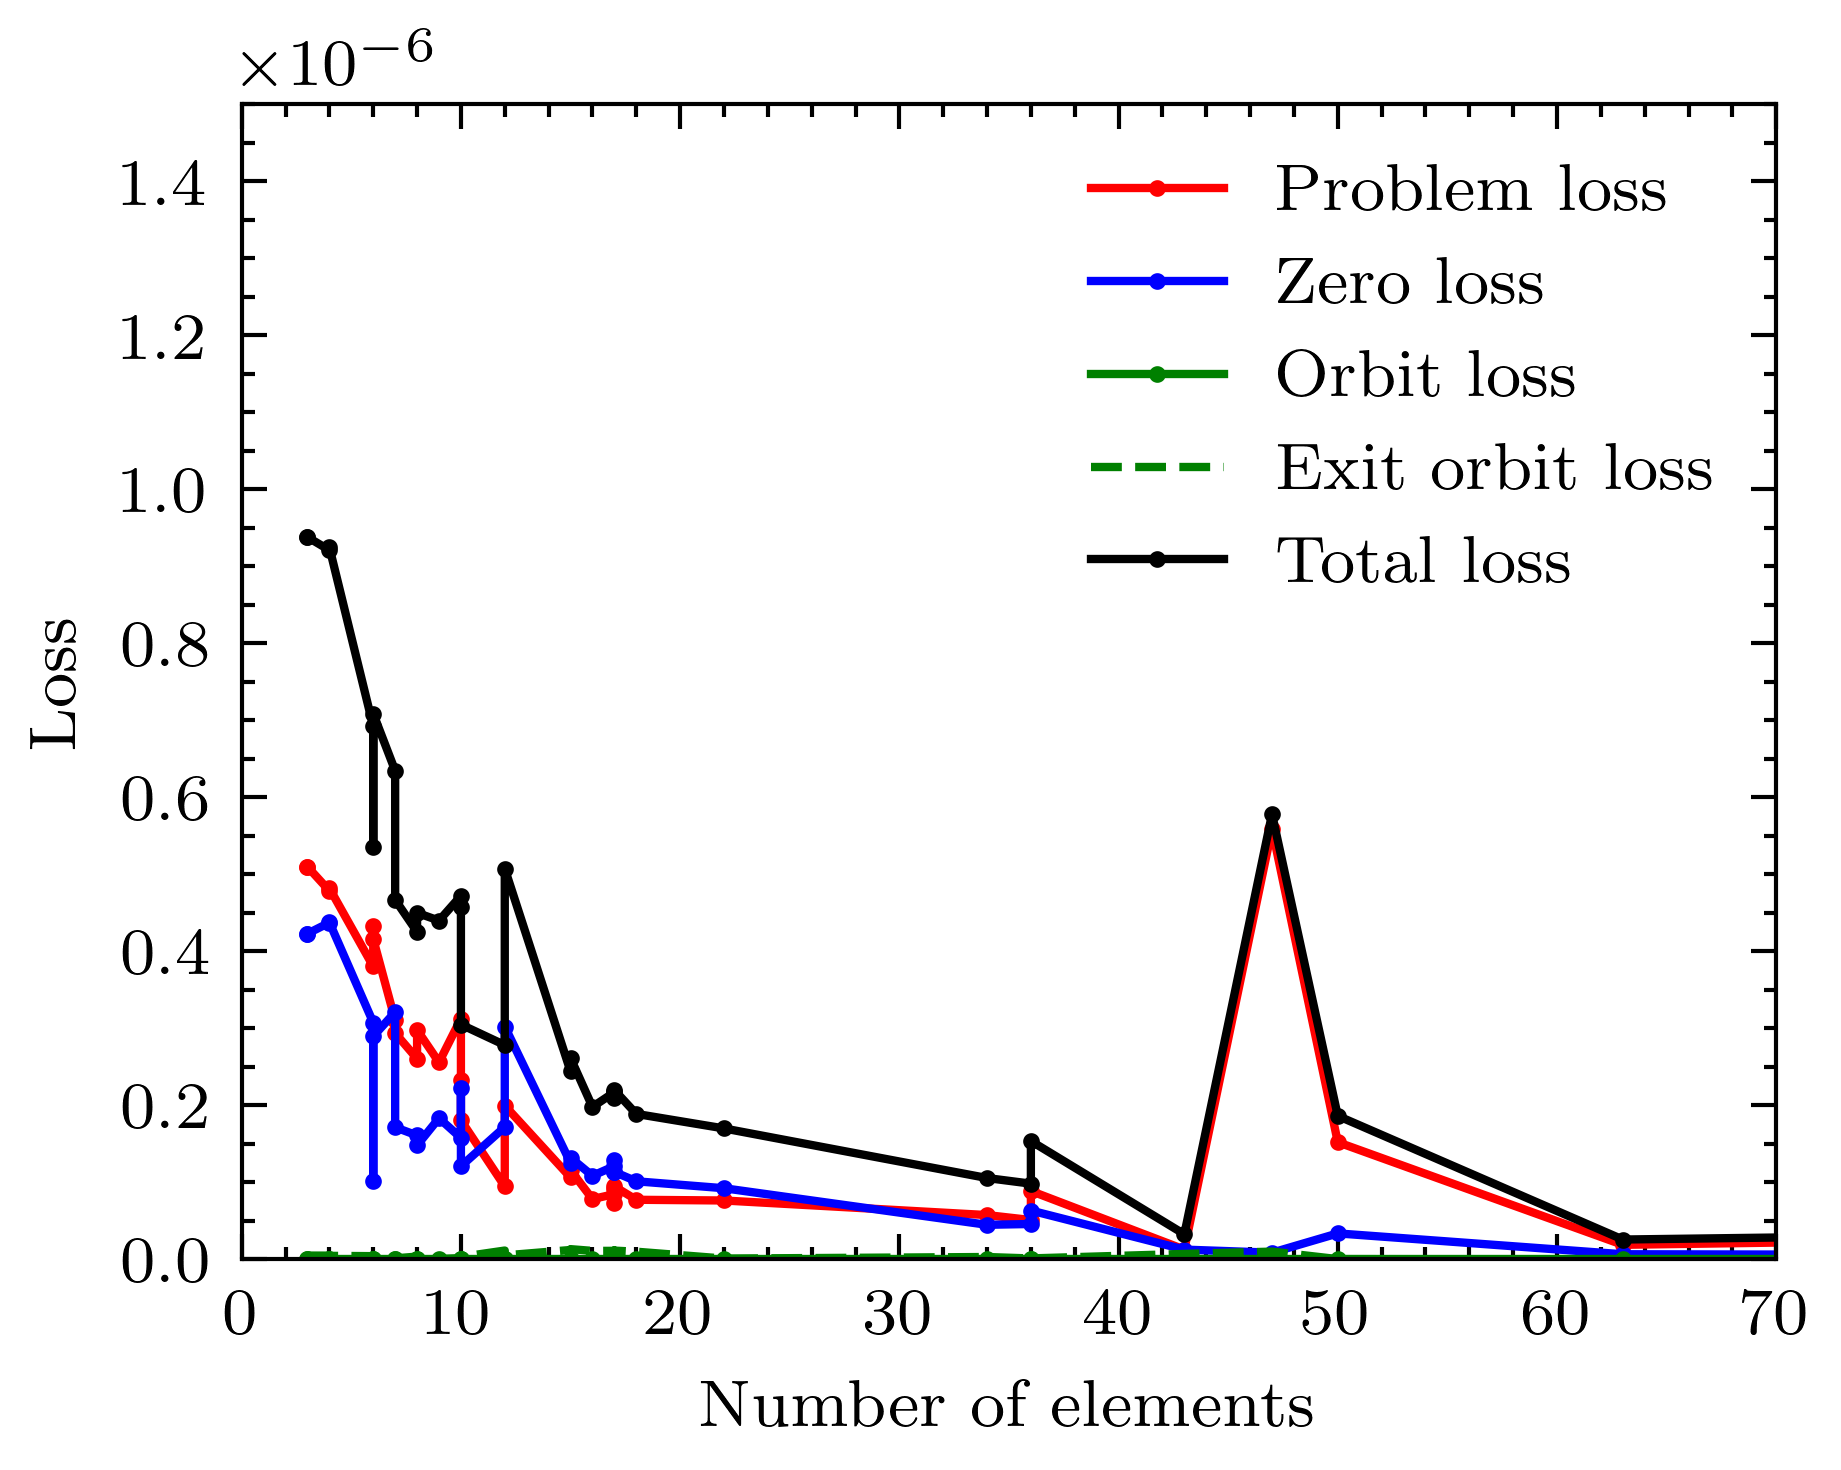

In [111]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

In [117]:
FOLDER = "data/learning_storage/forward_backward/Y10_lasso"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
10  regularizer_mod_5_4  5.000000e-07           2   
1   regularizer_mod_5_4  5.000000e-07           2   
41  regularizer_mod_5_4  5.000000e-07           2   
11  regularizer_mod_5_4  5.000000e-07           2   
2   regularizer_mod_5_4  5.000000e-07           5   
19  regularizer_mod_5_4  5.000000e-07           5   
15  regularizer_mod_5_4  5.000000e-07           5   
22  regularizer_mod_5_4  5.000000e-07           7   
18  regularizer_mod_5_4  5.000000e-07           8   
26  regularizer_mod_5_4  5.000000e-07           9   
14  regularizer_mod_5_4  5.000000e-07           9   
30  regularizer_mod_5_4  5.000000e-07           9   
8   regularizer_mod_5_4  5.000000e-07          10   
29  regularizer_mod_5_4  5.000000e-07          10   
25  regularizer_mod_5_4  5.000000e-07          10   
3   regularizer_mod_5_4  5.000000e-07          12   
20  regularizer_mod_5_4  5.000000e-07          13   
32  regularizer_mod_5_4  5.000

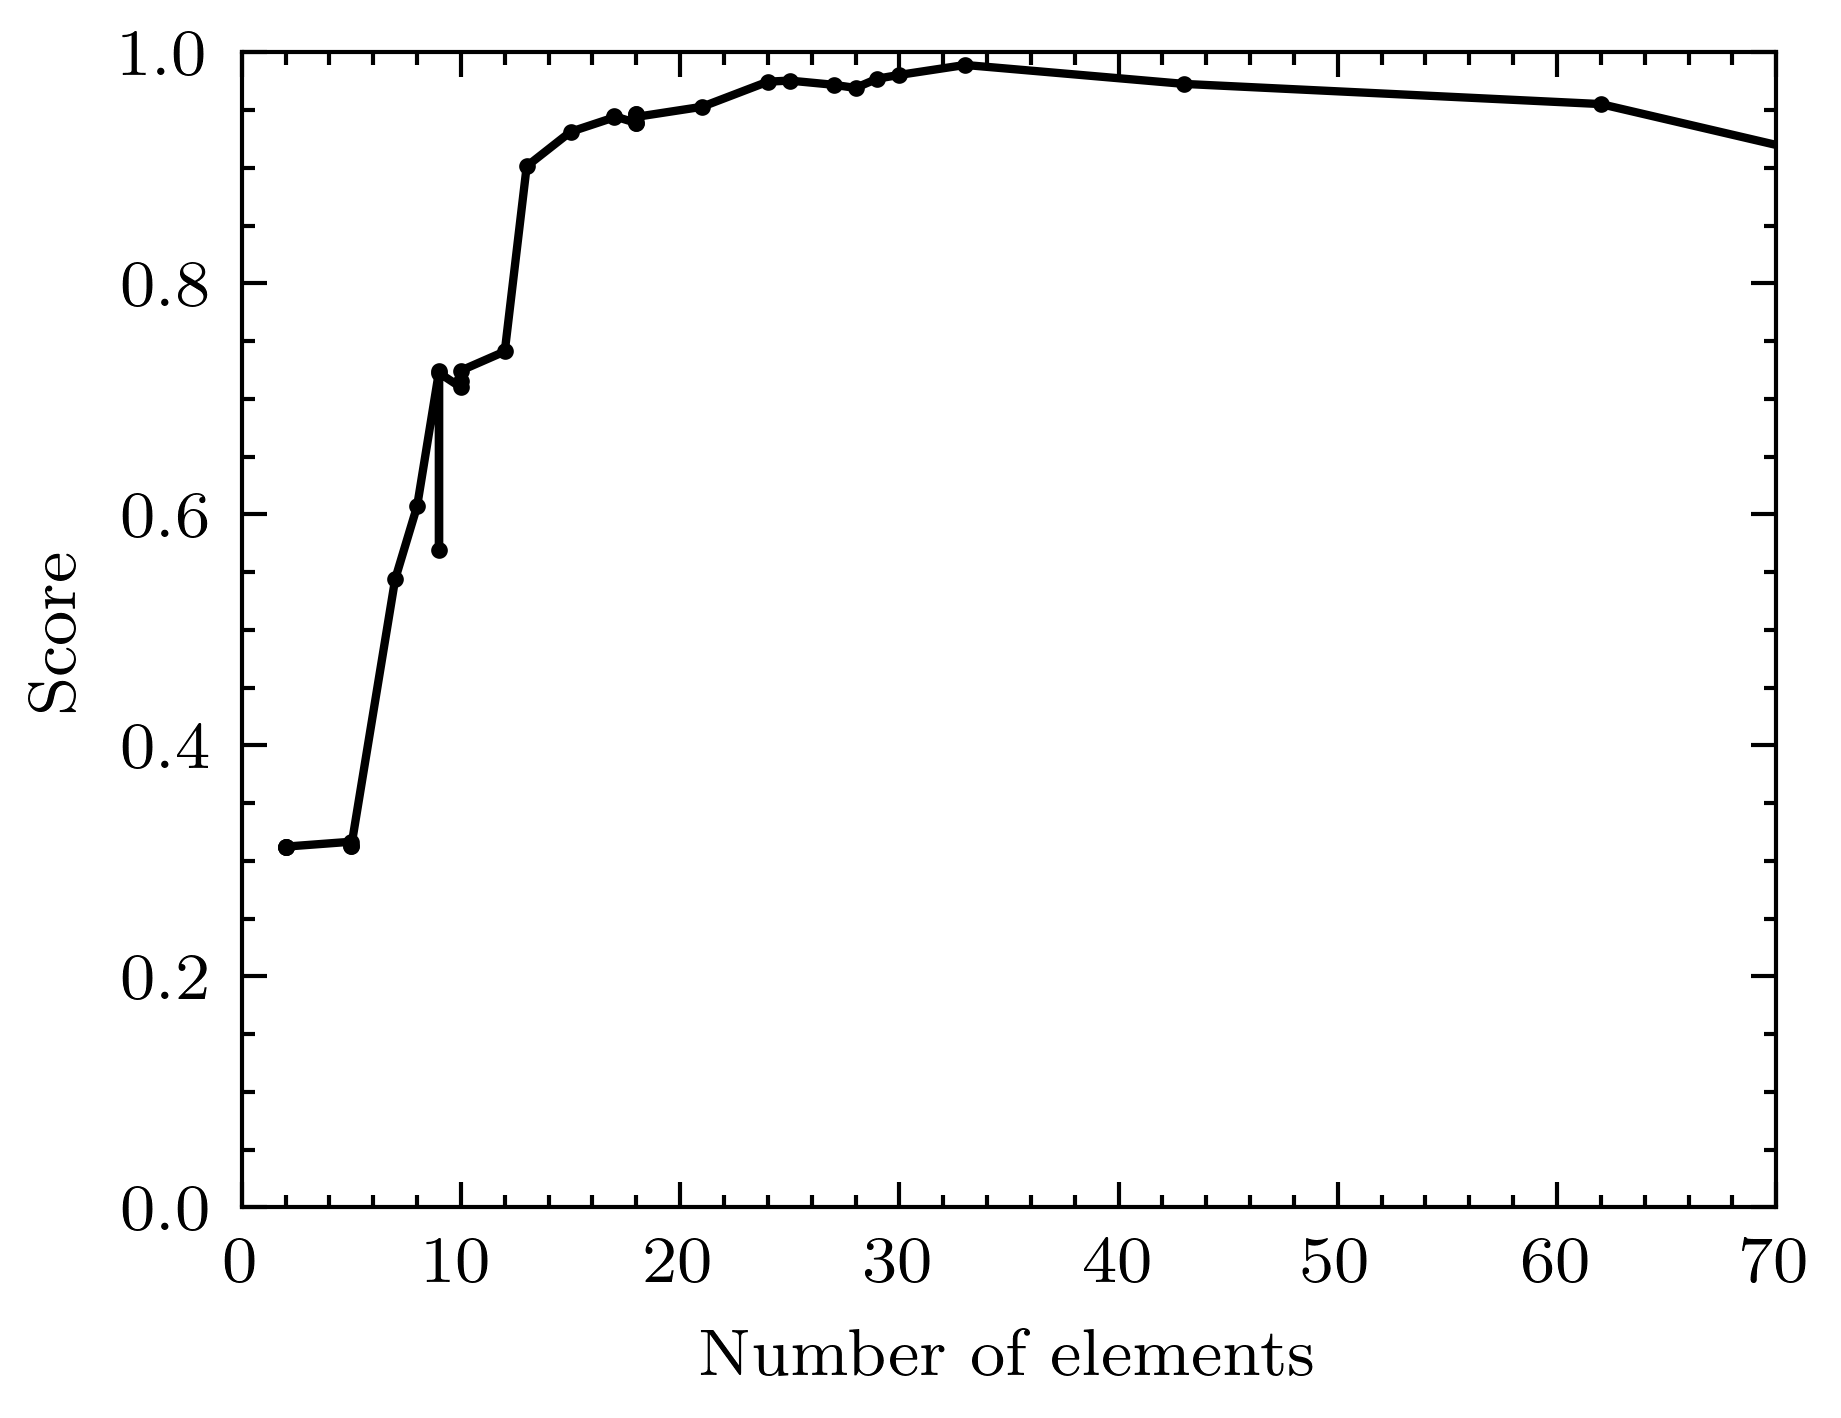

In [118]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

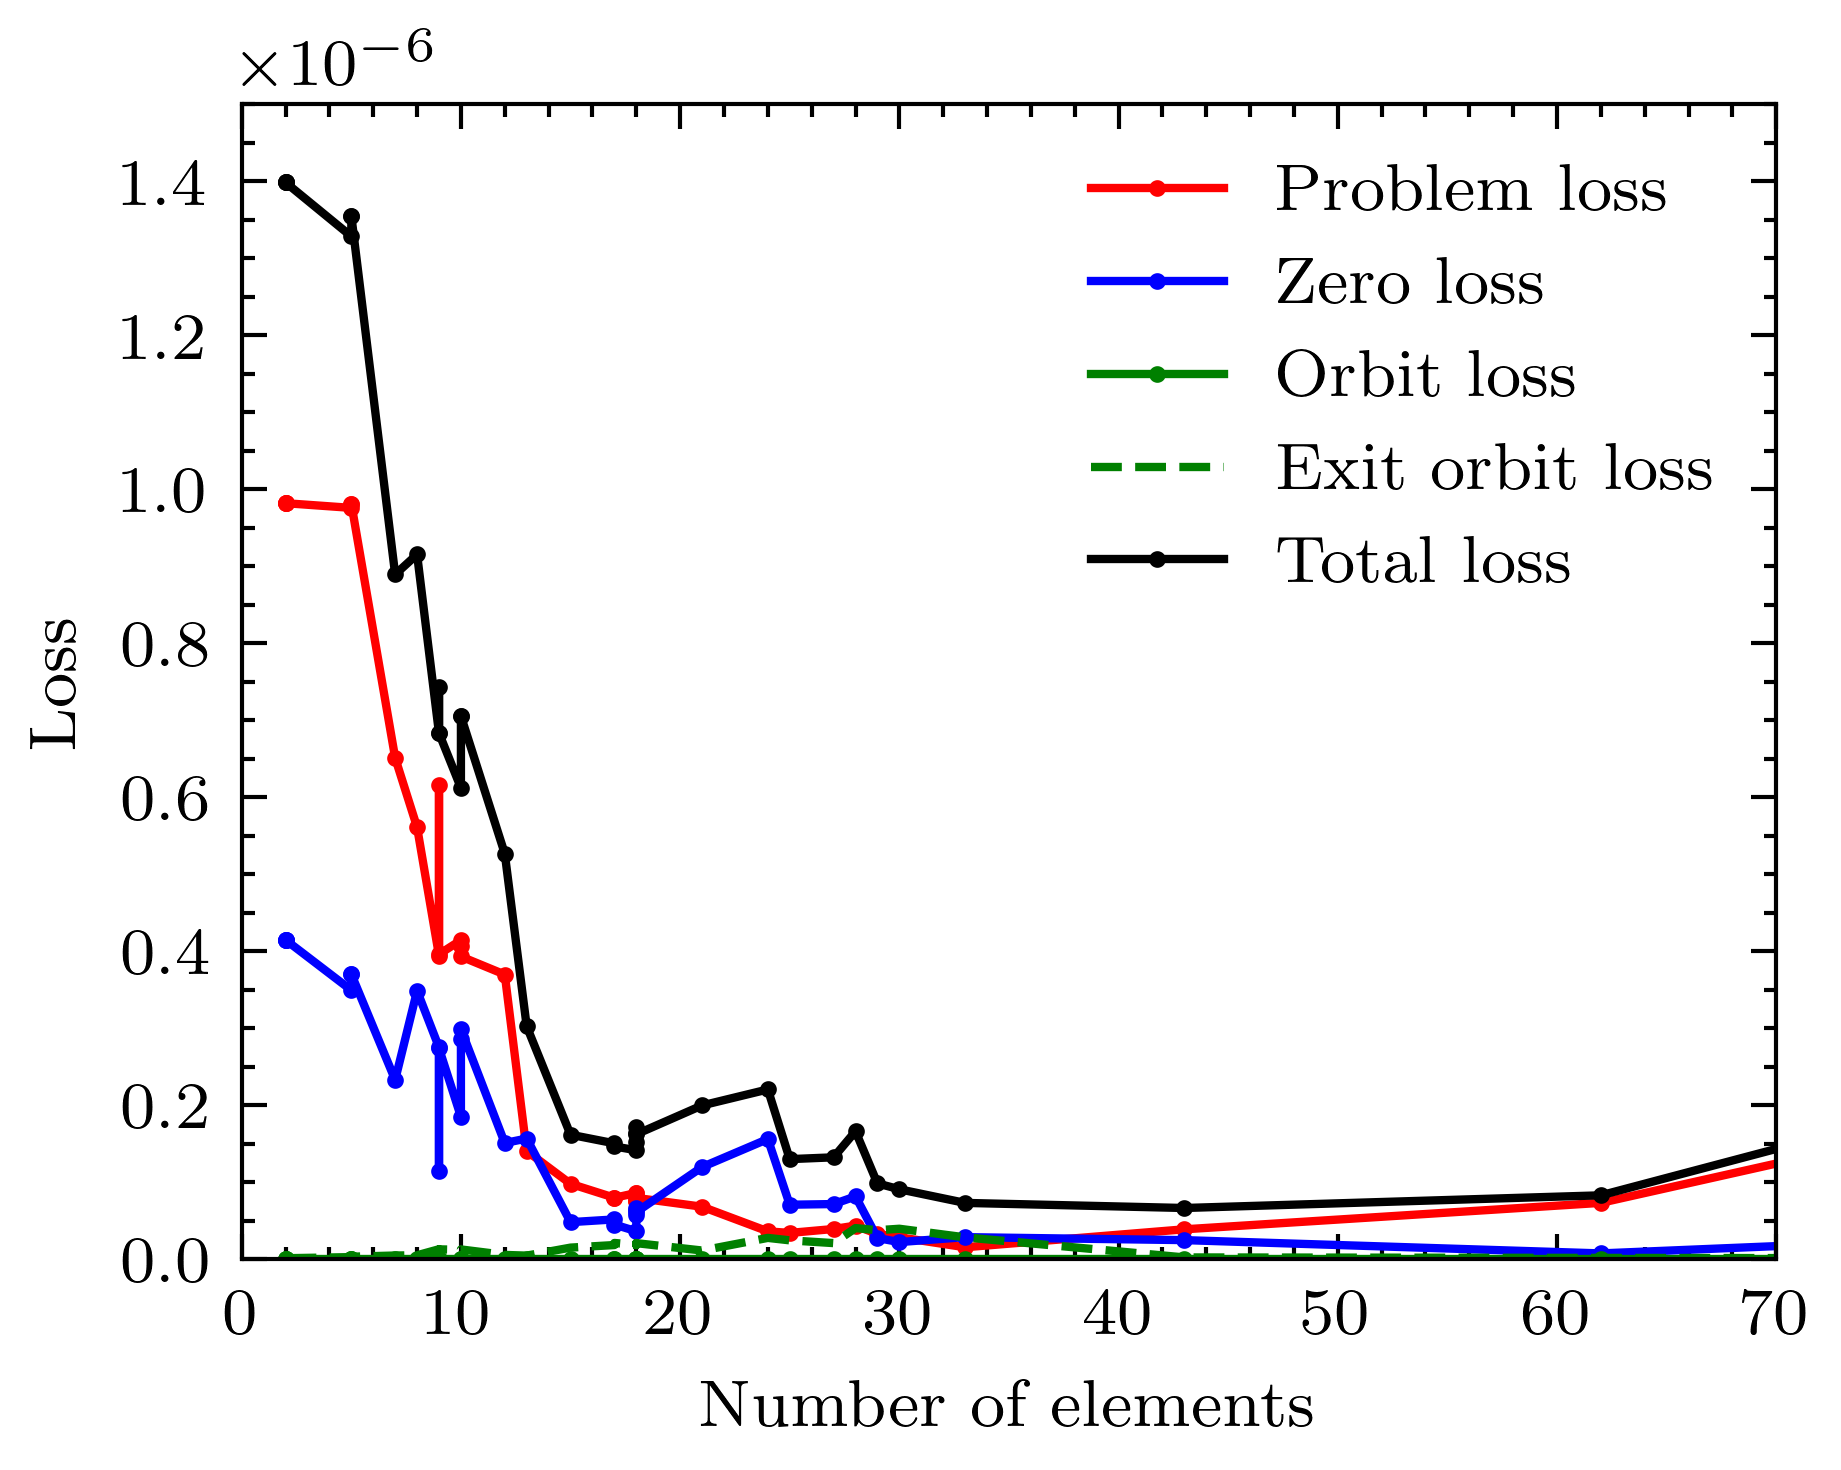

In [119]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Similarly to the OMP solutions lets test zero start in the case of LASSO. In the calculations here I used the weights from LASSO as initial predictions for the model training.

In [137]:
FOLDER = "data/learning_storage/forward_backward/Y1_lasso_zero"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
1   regularizer_mod_5_4  5.000000e-07           1   
38  regularizer_mod_5_4  5.000000e-07           1   
44  regularizer_mod_5_4  5.000000e-07           3   
12  regularizer_mod_5_4  5.000000e-07           3   
43  regularizer_mod_5_4  5.000000e-07           3   
3   regularizer_mod_5_4  5.000000e-07           4   
39  regularizer_mod_5_4  5.000000e-07           6   
27  regularizer_mod_5_4  5.000000e-07           6   
16  regularizer_mod_5_4  5.000000e-07           8   
24  regularizer_mod_5_4  5.000000e-07           9   
32  regularizer_mod_5_4  5.000000e-07          10   
20  regularizer_mod_5_4  5.000000e-07          10   
7   regularizer_mod_5_4  5.000000e-07          11   
9   regularizer_mod_5_4  5.000000e-07          11   
10  regularizer_mod_5_4  5.000000e-07          11   
8   regularizer_mod_5_4  5.000000e-07          12   
22  regularizer_mod_5_4  5.000000e-07          13   
33  regularizer_mod_5_4  5.000

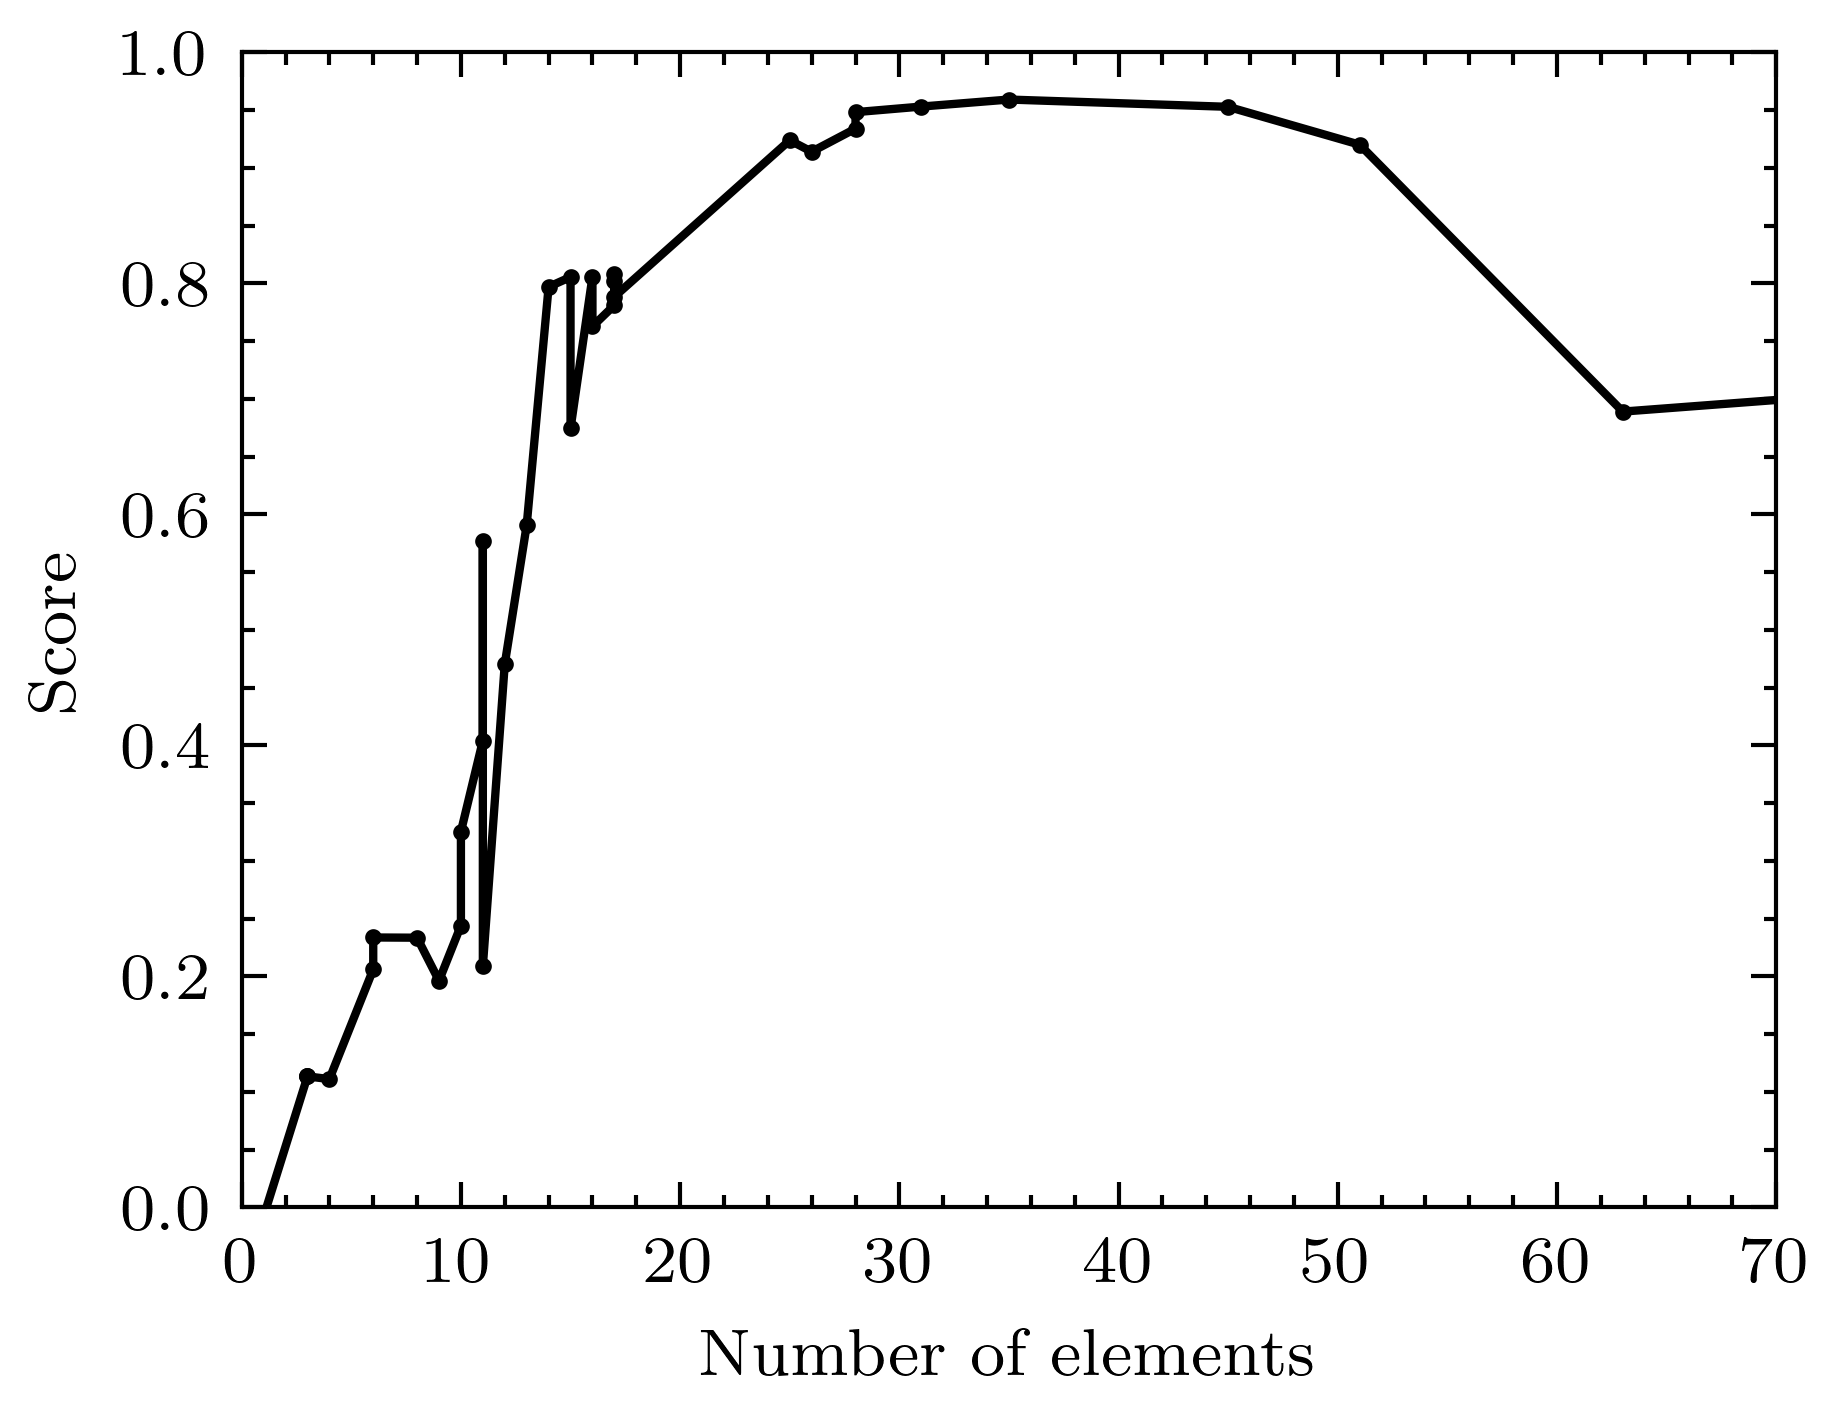

In [138]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

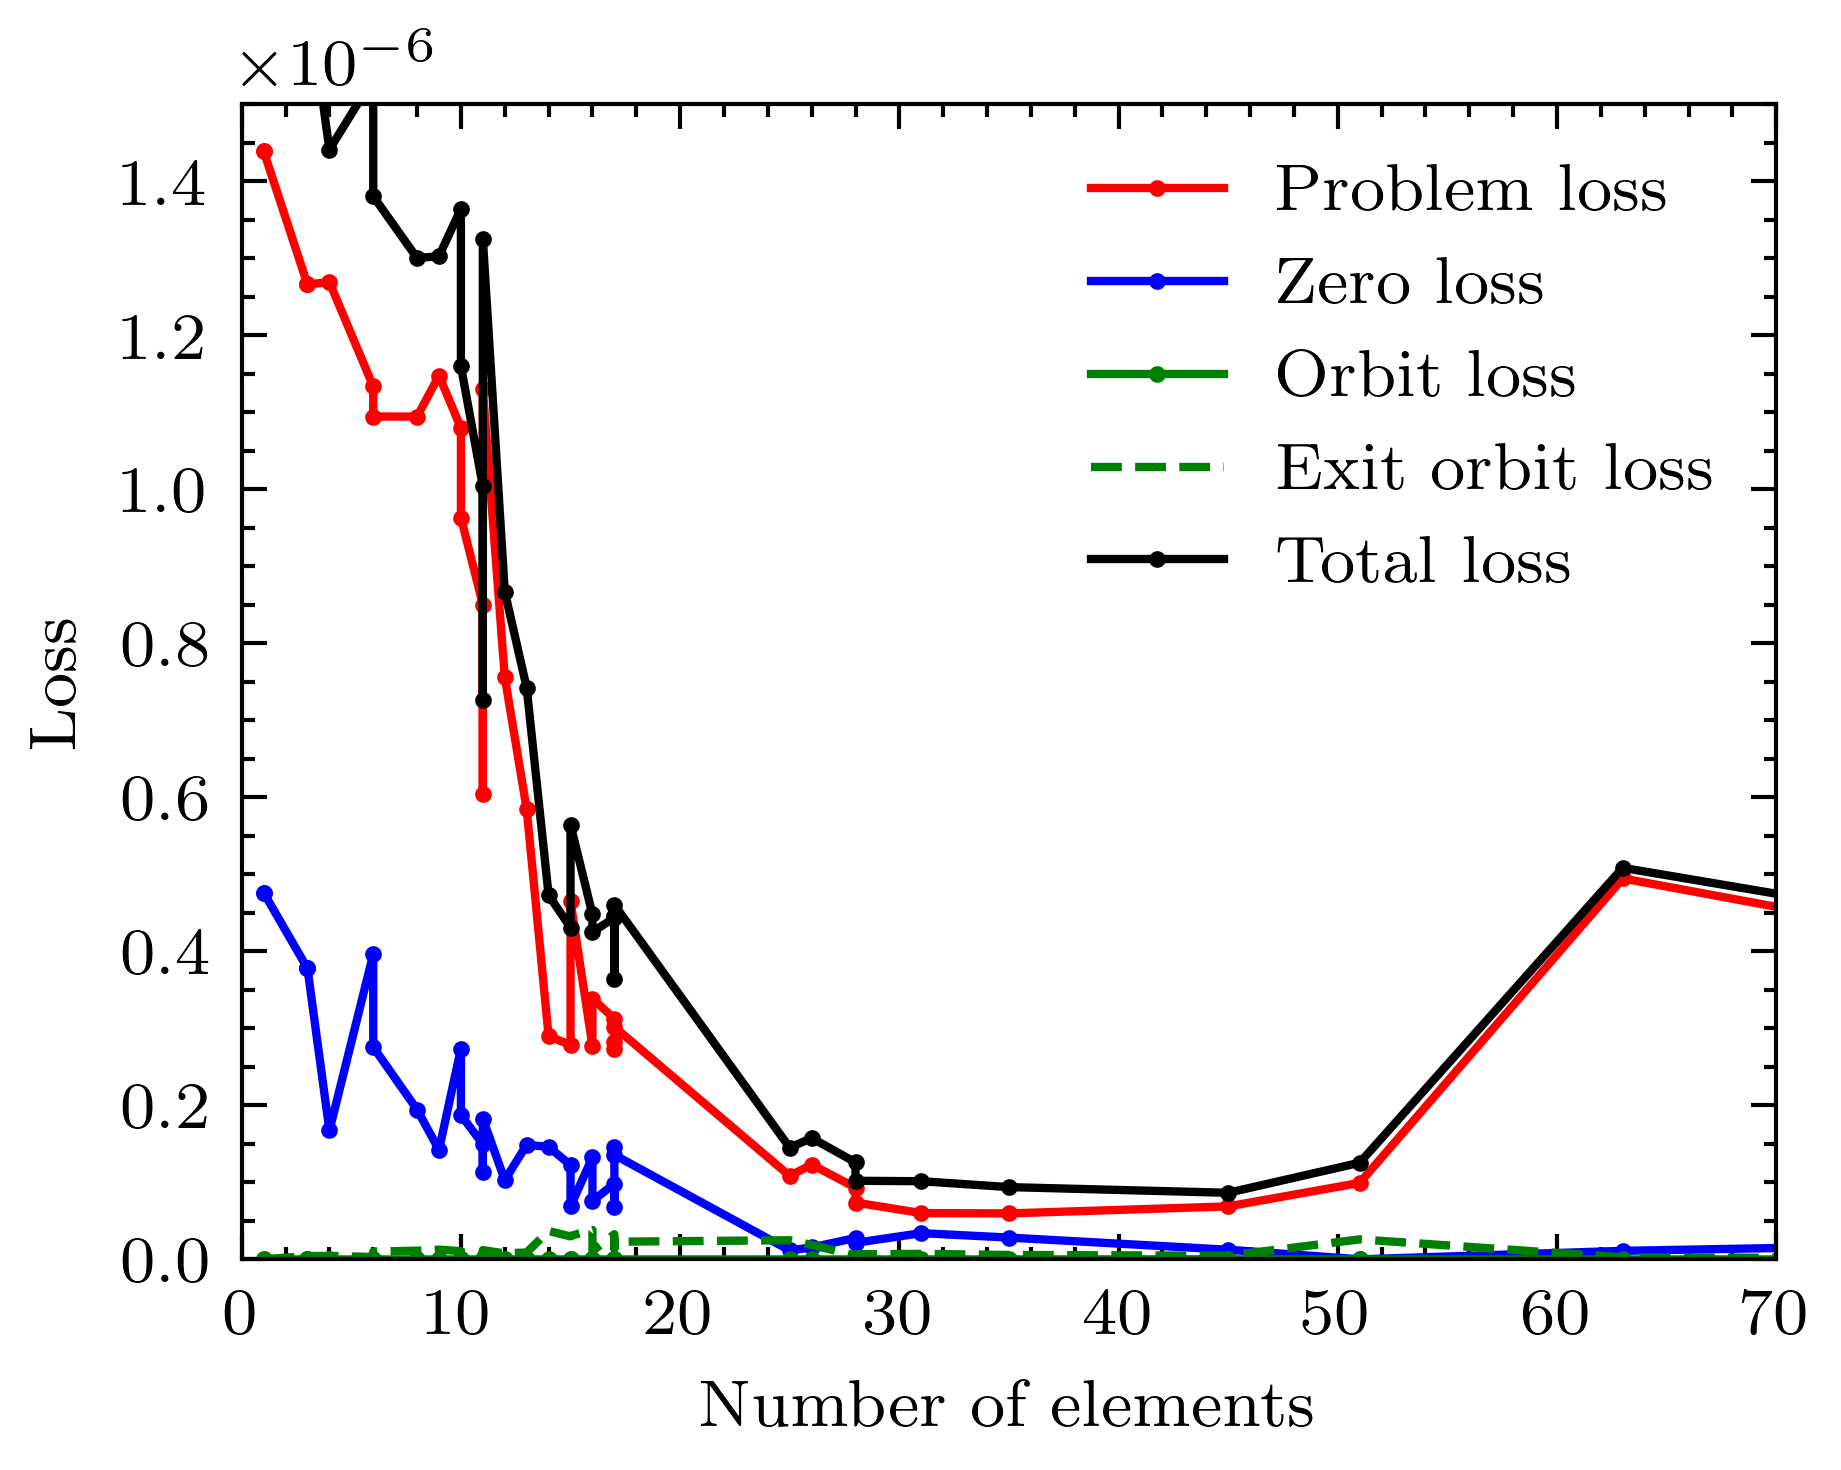

In [139]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

In [151]:
FOLDER = "data/learning_storage/forward_backward/Y2_lasso_zero"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
15  regularizer_mod_5_4  5.000000e-07           2   
38  regularizer_mod_5_4  5.000000e-07           3   
13  regularizer_mod_5_4  5.000000e-07           3   
11  regularizer_mod_5_4  5.000000e-07           3   
6   regularizer_mod_5_4  5.000000e-07           4   
44  regularizer_mod_5_4  5.000000e-07           4   
5   regularizer_mod_5_4  5.000000e-07           5   
20  regularizer_mod_5_4  5.000000e-07           6   
8   regularizer_mod_5_4  5.000000e-07           8   
43  regularizer_mod_5_4  5.000000e-07           9   
12  regularizer_mod_5_4  5.000000e-07           9   
41  regularizer_mod_5_4  5.000000e-07          10   
29  regularizer_mod_5_4  5.000000e-07          11   
10  regularizer_mod_5_4  5.000000e-07          11   
30  regularizer_mod_5_4  5.000000e-07          11   
31  regularizer_mod_5_4  5.000000e-07          11   
26  regularizer_mod_5_4  5.000000e-07          12   
19  regularizer_mod_5_4  5.000

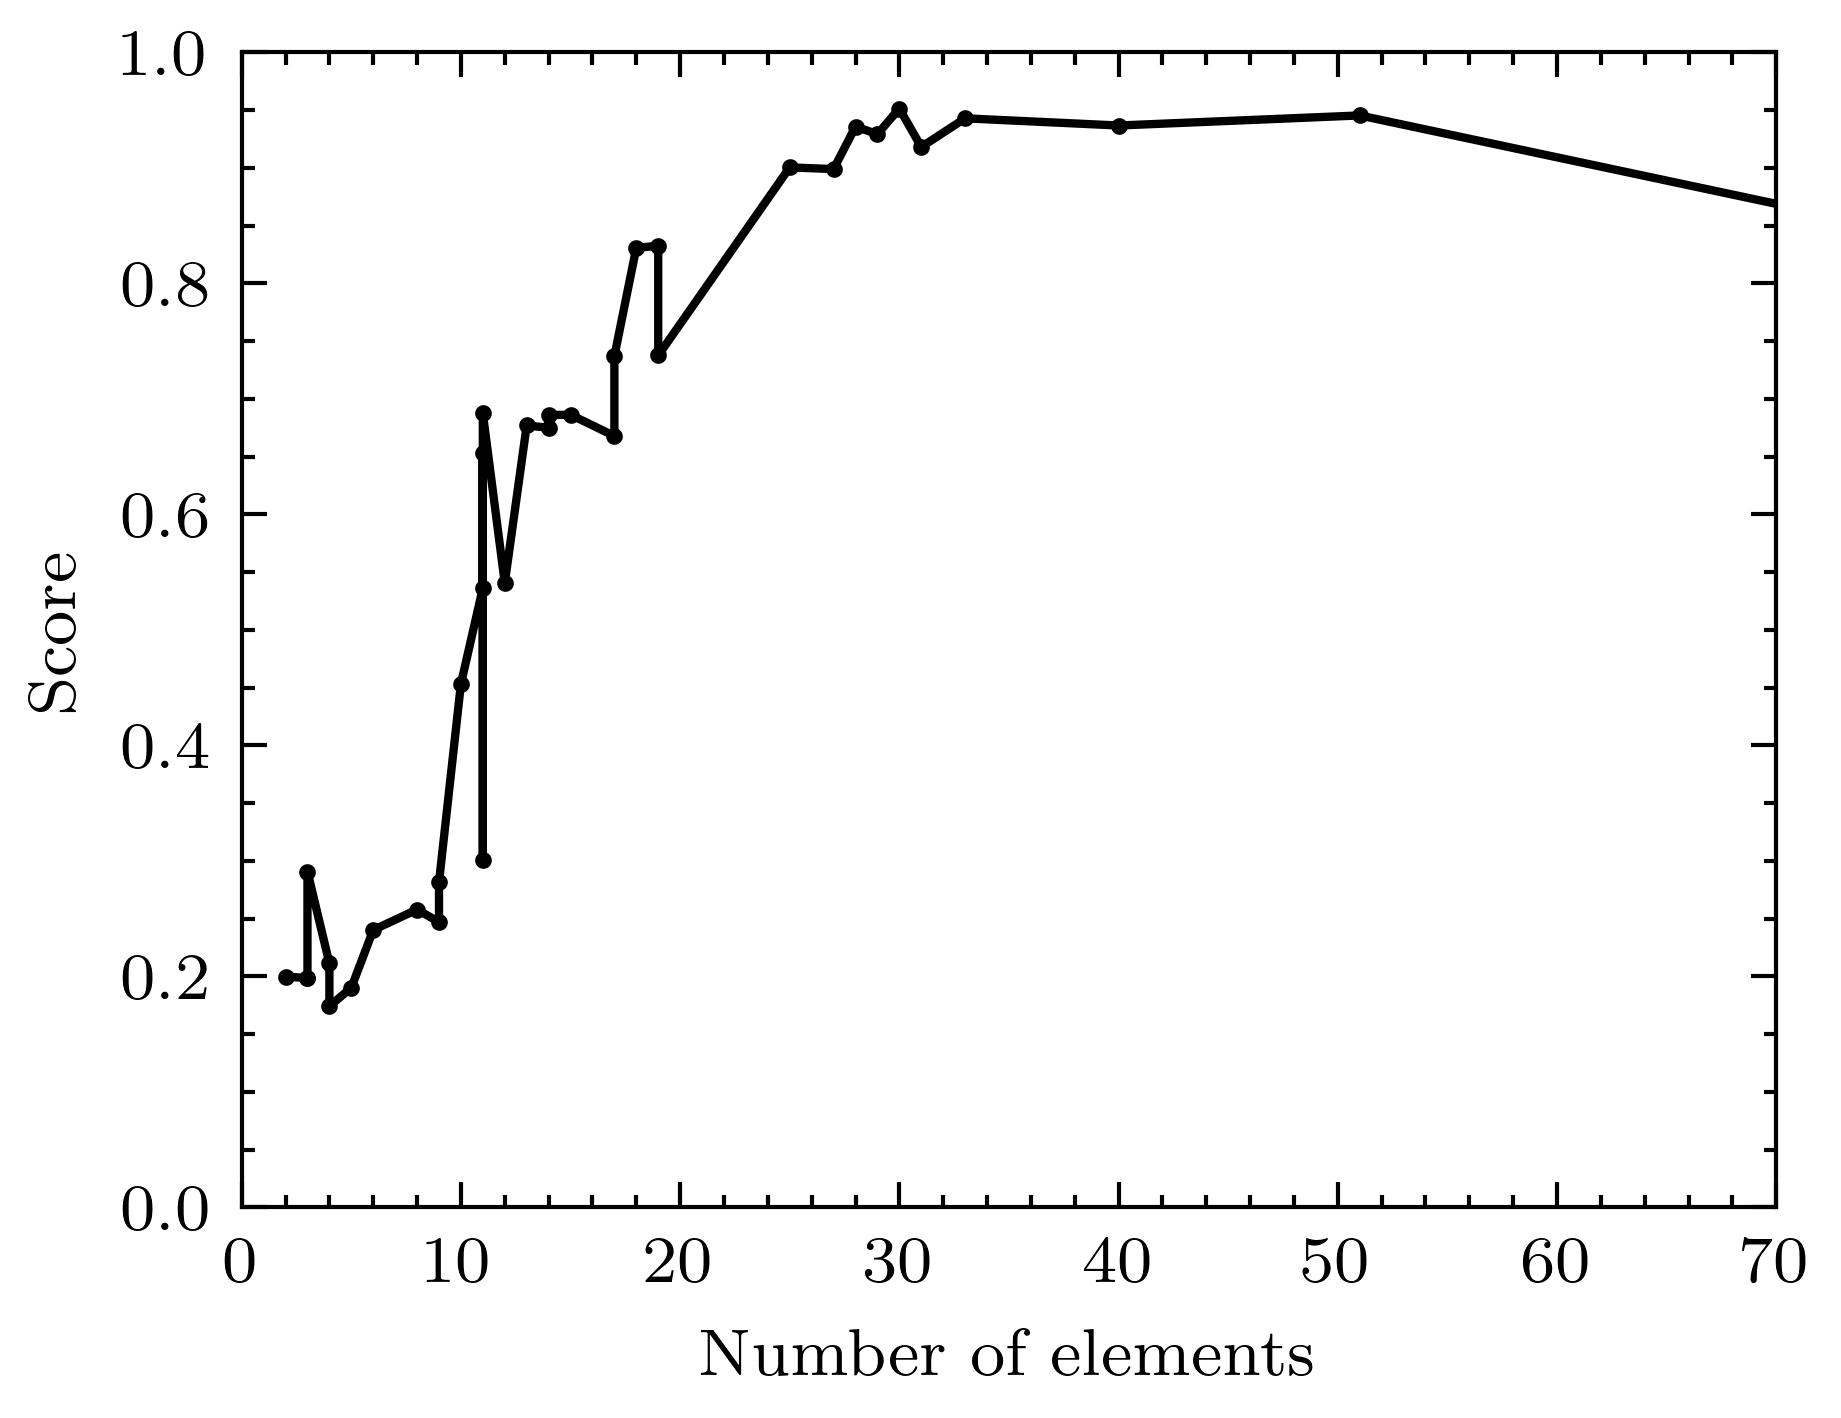

In [147]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

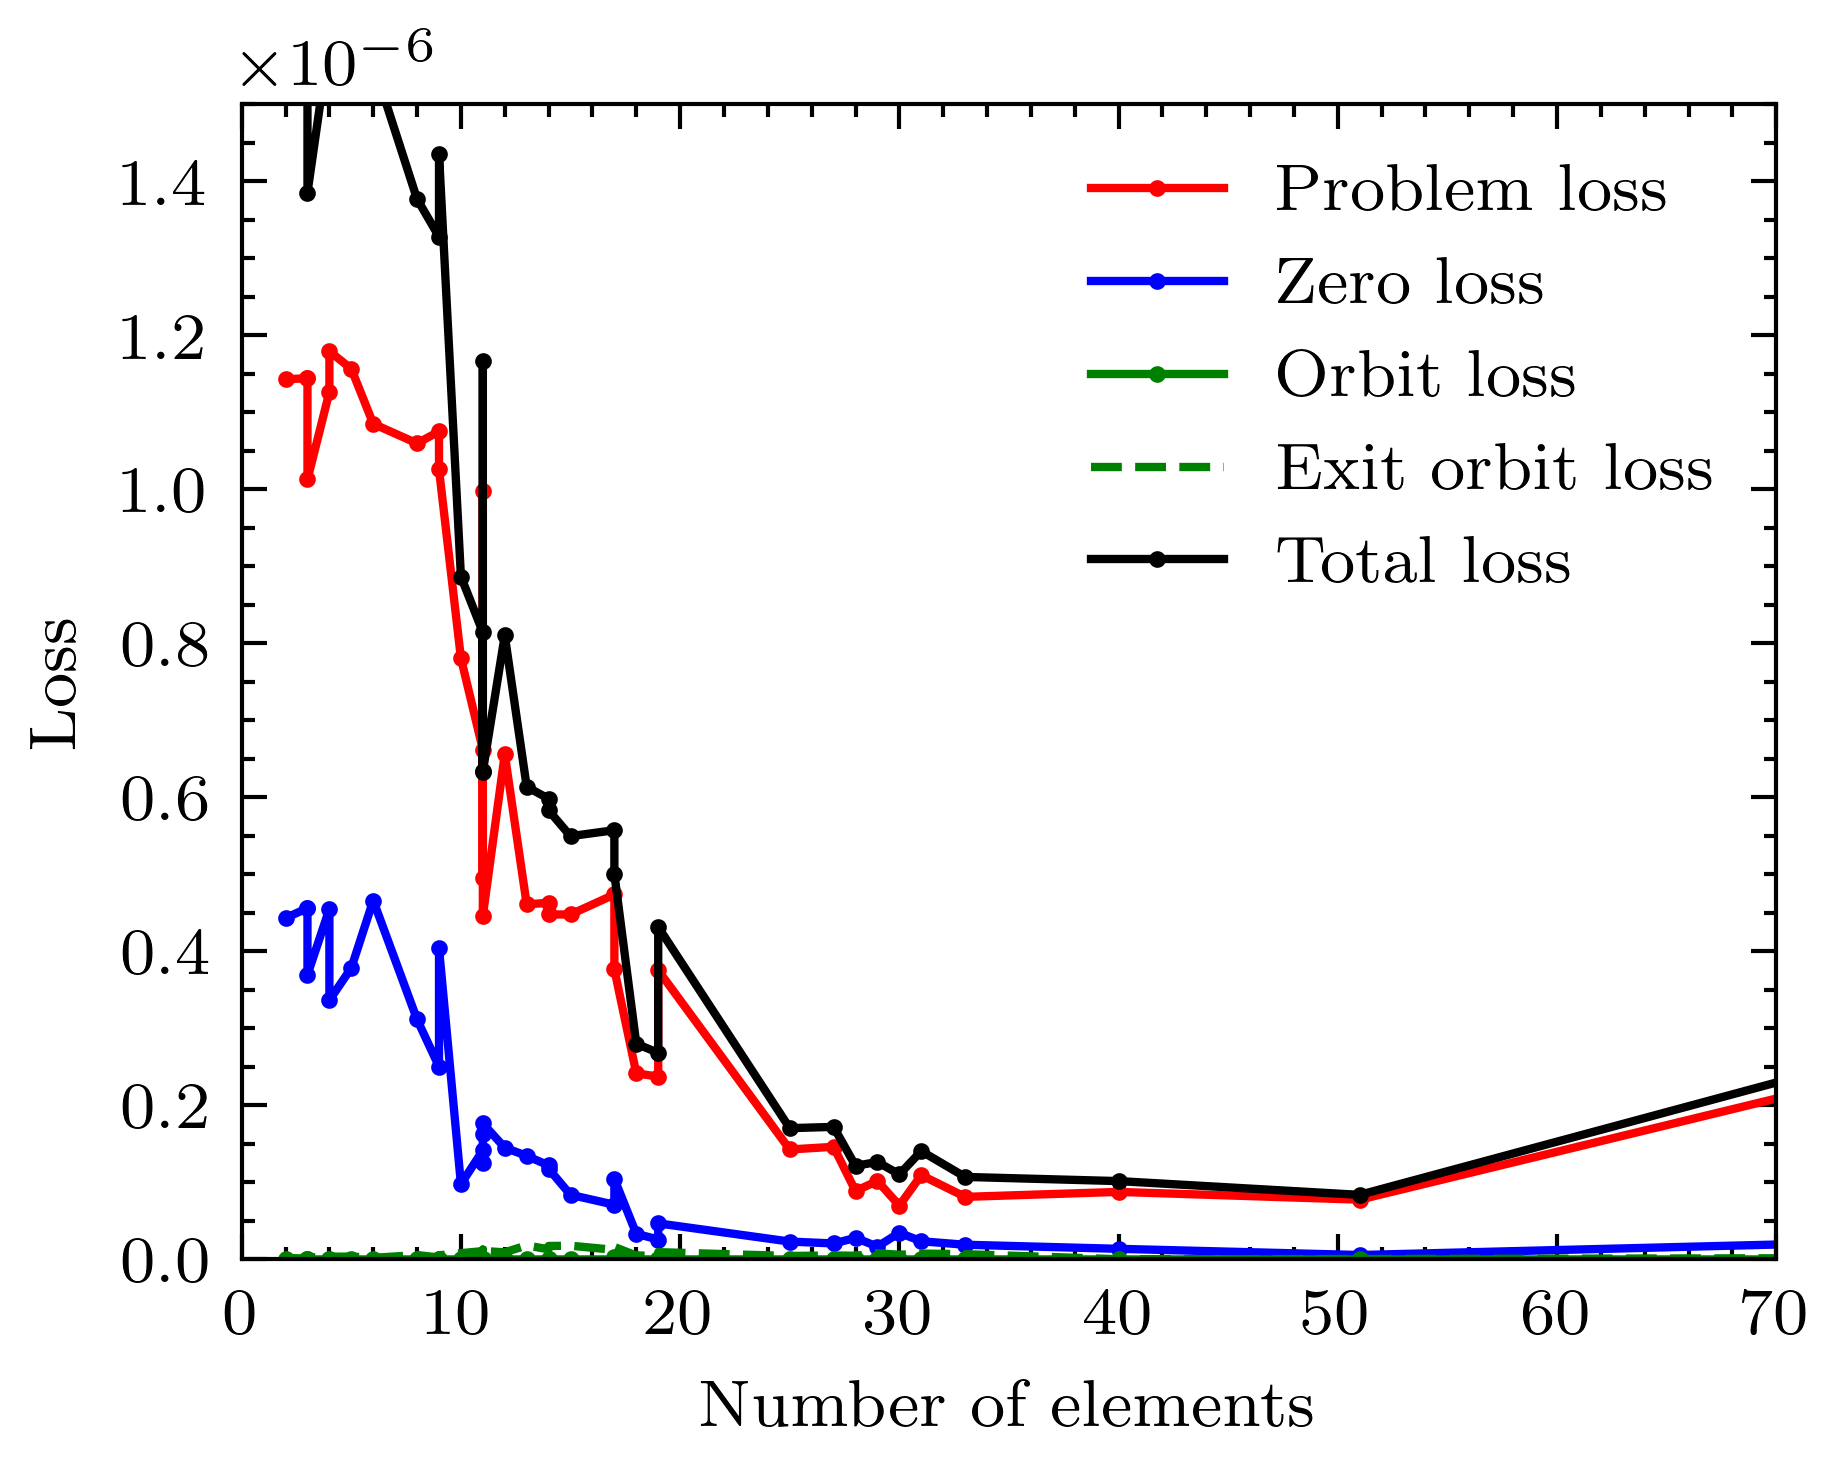

In [152]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

In [153]:
FOLDER = "data/learning_storage/forward_backward/Y3_lasso_zero"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)

Found 45 files.
         Regularization         alpha  n_features  \
39  regularizer_mod_5_4  5.000000e-07           2   
22  regularizer_mod_5_4  5.000000e-07           3   
36  regularizer_mod_5_4  5.000000e-07           3   
8   regularizer_mod_5_4  5.000000e-07           3   
5   regularizer_mod_5_4  5.000000e-07           3   
1   regularizer_mod_5_4  5.000000e-07           4   
3   regularizer_mod_5_4  5.000000e-07           4   
13  regularizer_mod_5_4  5.000000e-07           5   
43  regularizer_mod_5_4  5.000000e-07           6   
12  regularizer_mod_5_4  5.000000e-07           7   
14  regularizer_mod_5_4  5.000000e-07           7   
21  regularizer_mod_5_4  5.000000e-07           7   
10  regularizer_mod_5_4  5.000000e-07           8   
2   regularizer_mod_5_4  5.000000e-07           8   
37  regularizer_mod_5_4  5.000000e-07          10   
30  regularizer_mod_5_4  5.000000e-07          10   
17  regularizer_mod_5_4  5.000000e-07          12   
7   regularizer_mod_5_4  5.000

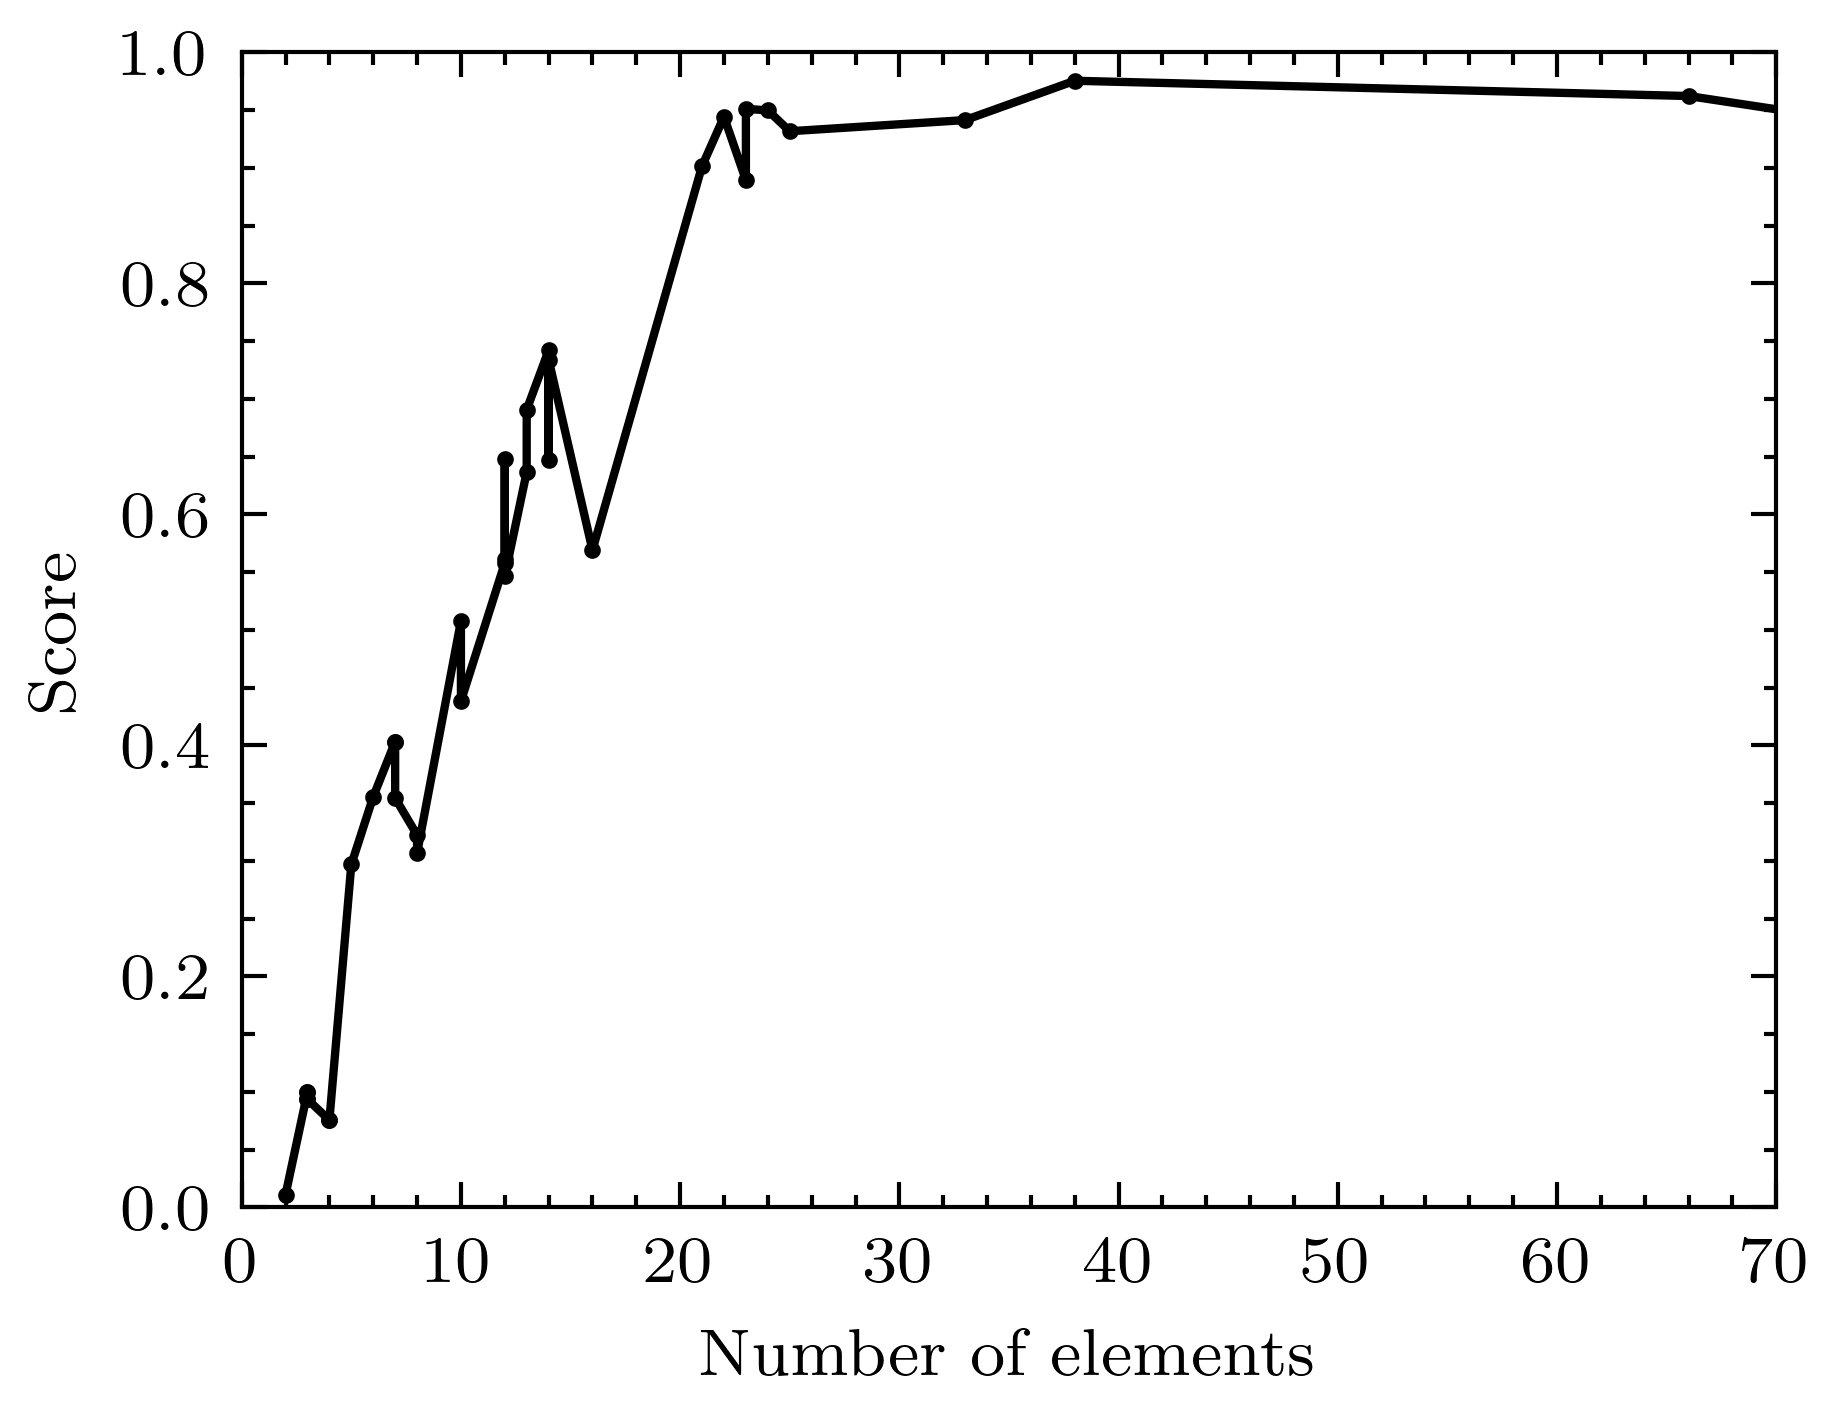

In [154]:
with plt.style.context(['science', 'ieee']):
    plt.plot(lasso_stats['n_features'], lasso_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 70)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

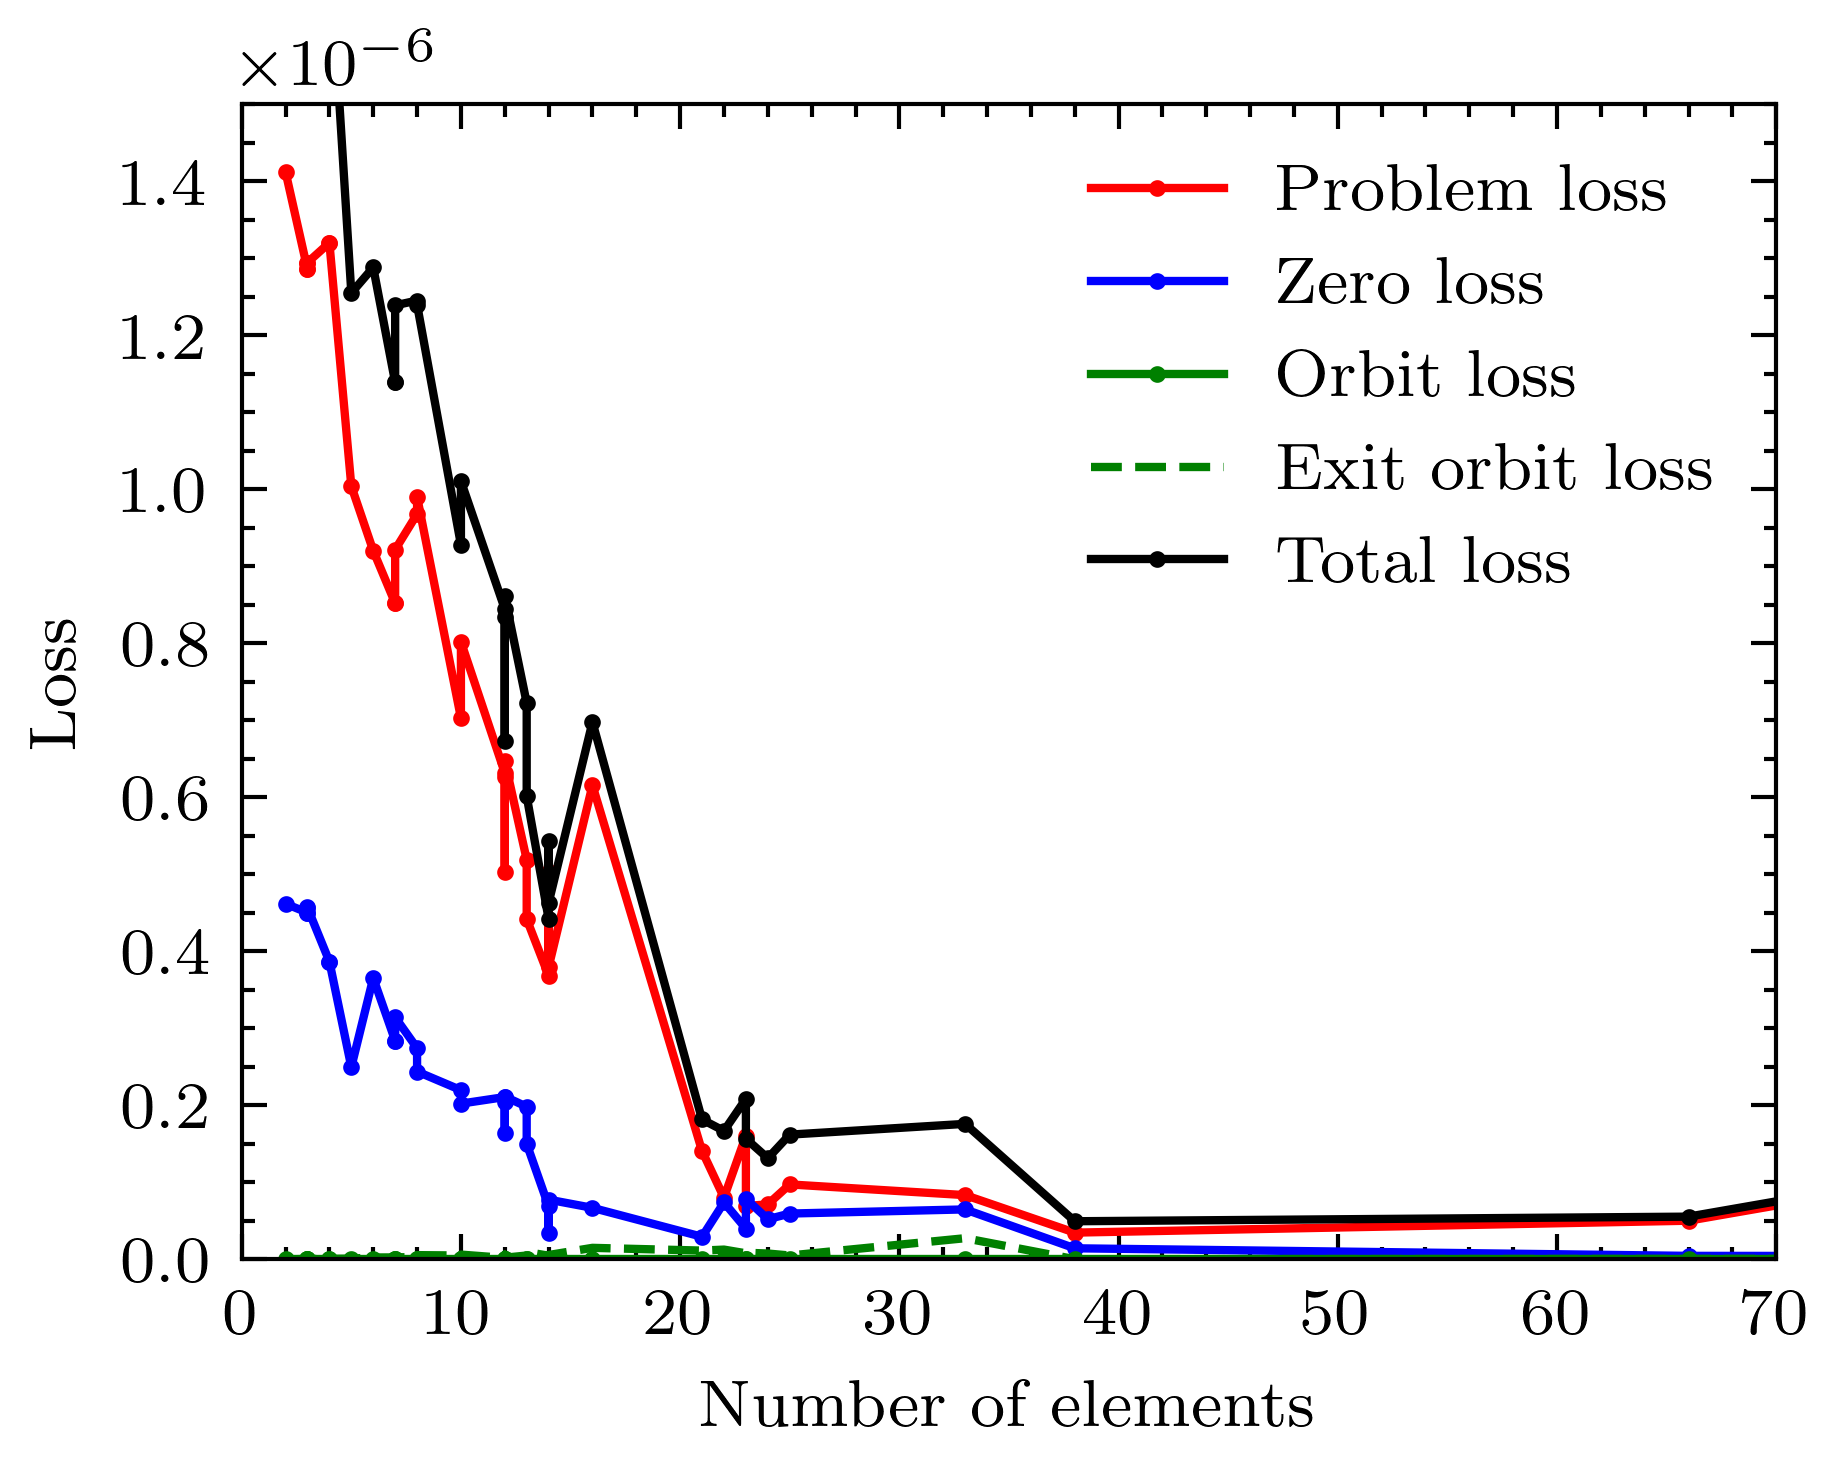

In [155]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(lasso_stats.n_features, lasso_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(lasso_stats.n_features, lasso_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(lasso_stats.n_features, lasso_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(lasso_stats.n_features, lasso_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(lasso_stats.n_features, lasso_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y4**

In [ ]:
FOLDER = "data/learning_storage/forward_backward/Y4_lasso_zero"

tmp = gather_data3(FOLDER)
lasso_stats = tmp.sort_values(by = ['n_features'])
lasso_stats['problem_loss'] = lasso_stats.total_loss - lasso_stats.orbit_loss - lasso_stats.zero_loss - lasso_stats.exit_orbit_loss

print(lasso_stats)